In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df= pd.read_excel('Company_Data2015-1.xlsx')

In [3]:
d_dict = pd.read_excel('Data_Dictionary.xlsx')

### Data Pre_Processing

In [4]:
d_dict

#                    Field Name  \
0    1                       Co_Code   
1    2                       Co_Name   
2    3            Networth Next Year   
3    4                Equity Paid Up   
4    5                      Networth   
..  ..                           ...   
62  64       Debtors Velocity (Days)   
63  65     Creditors Velocity (Days)   
64  66     Inventory Velocity (Days)   
65  67  Value of Output/Total Assets   
66  68   Value of Output/Gross Block   

                                          Description  \
0                                        Company Code   
1                                        Company Name   
2   Value of a company as on 2016 - Next Year(diff...   
3   Amount that has been received by the company t...   
4        Value of a company as on 2015 - Current Year   
..                                                ...   
62   Average days required for receiving the payments   
63  Average number of days company takes to pay su...   
64  Average number of days the company needs to tu...   
65  Ratio of Value of Output (market value) to Tot...   
66  Ratio of Value of Output (market value) to Gro...   

                     New Field Name  
0                           Co_Code  
1                           Co_Name  
2                Networth_Next_Year  
3                    Equity_Paid_Up  
4                          Networth  
..                              ...  
62                 Debtors_Vel_Days  
63               Creditors_Vel_Days  
64               Inventory_Vel_Days  
65  Value_of_Output_to_Total_Assets  
66   Value_of_Output_to_Gross_Block  

[67 rows x 4 columns]

In [5]:
df.head(10)

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   
5     2484       Usha Ispat            -2519.40          179.35  -2519.39   
6    23633      Hanung Toys            -2125.05           30.82  -1031.57   
7     3226         K S Oils            -2100.56           45.92  -1945.45   
8     1541   Quadrant Tele.            -1695.75           61.23  -1560.94   
9     2334              ITI            -1677.18          288.00  -1947.85   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   
5          -1824.75      694.64          0.02              -1843.74   
6           1536.08     2567.65        949.98                804.82   
7            979.13     2664.04        920.67                263.95   
8           -613.79      597.82       1700.27              -1121.96   
9             86.35     1220.83       1329.82               -390.53   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   
5             0.00  ...                0.00               0.00   
6           834.86  ...             -395.87            -987.73   
7           705.76  ...             -447.24            -596.97   
8           117.67  ...                1.90             -20.43   
9          2536.78  ...               19.23              18.18   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   
5               0.00             0.00               0.00   
6            -396.67          -672.36           -1264.22   
7            -456.40          -461.06            -610.80   
8              -3.58            -3.58             -25.91   
9               9.76             9.76               8.71   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   
5                        0                          0   
6                      456                         12   
7                      828                        622   
8                       34                        145   
9                     1112                        913   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                   

In [6]:
df.columns = df.columns.str.replace('(%)', 'perc').str.replace('(','').str.replace(')','').str.replace('[','').str.replace(']','').str.replace(' ','_').str.replace('/','_').str.replace('-','_').str.replace('Production','Prod').str.replace('Revenue','Rev').str.replace('earnings','earn')

In [7]:
df.rename(columns = {'Gross_Block_':'Gross_Block', 'Net_Working_Capital_':'Net_Working_Capital','Current_Assets_':'Current_Assets','Current_Liabilities_and_Provisions_':'Current_Liabilities_and_Provisions','Total_Assets_Liabilities_':'Total_Assets_Liabilities','Book_Value_Adj._Unit_Curr':'Book_Value_Adj_Unit_Curr'}, inplace = True)

In [8]:
pd.set_option("max_columns", None)
pd.set_option("max_rows",None)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_Liabilities      

In [10]:
df['Default']=np.where(df['Networth_Next_Year']>=0,0,1)

In [11]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT',
       'Adjusted_PAT', 'CP', 'Rev_earn_in_forex', 'Rev_expenses_in_forex',
       'Capital_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Prod_perc',
       'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc',
     

In [12]:
df[['Co_Name','Networth_Next_Year','Inventory_Velocity_Days','Default']]

Co_Name  Networth_Next_Year  Inventory_Velocity_Days  Default
0          Hind.Cables            -8021.60                     45.0        1
1      Tata Tele. Mah.            -3986.19                      2.0        1
2         ABG Shipyard            -3192.58                      0.0        1
3                  GTL            -3054.51                      2.0        1
4      Bharati Defence            -2967.36                      0.0        1
5           Usha Ispat            -2519.40                      0.0        1
6          Hanung Toys            -2125.05                    392.0        1
7             K S Oils            -2100.56                    799.0        1
8       Quadrant Tele.            -1695.75                      2.0        1
9                  ITI            -1677.18                     62.0        1
10     Parasram. Synth            -1403.70                      5.0        1
11     Electrotherm(I)            -1243.33                     66.0        1
12        ICSA (India)            -1138.48                    220.0        1
13            SpiceJet            -1038.86                      3.0        1
14    Hind.Organ.Chem.             -981.21                     81.0        1
15         Ricoh India             -949.14                     54.0        1
16       Zylog Systems             -854.42                      0.0        1
17    Jai Balaji Inds.             -838.28                    127.0        1
18    Mackinnon Macken             -834.09                      0.0        1
19     Everonn Educat.             -814.48                      0.0        1
20                 LML             -781.73                    193.0        1
21        Samtel Color             -687.37                    322.0        1
22     Parabolic Drugs             -681.26                    421.0        1
23     Pradip Overseas             -666.97                    539.0        1
24          Alps Inds.             -647.90                      NaN        1
25      Nicco Uco All.             -595.87                      0.0        1
26                 NRC             -577.39                      0.0        1
27    Royal Cush. Vin.             -479.59                    103.0        1
28           N K Inds.             -473.02                     19.0        1
29     Era Infra Engg.             -463.82                    350.0        1
30          Indus Fila             -457.25                     65.0        1
31    Healthfore Tech.             -453.08                      8.0        1
32      Abhishek Corp.             -402.46                    434.0        1
33      Jenson & Nich.             -399.37                    118.0        1
34      McNally Bharat             -398.08                     22.0        1
35            UB Engg.             -386.75                     80.0        1
36    Kalyanpur Cement             -383.86                     38.0        1
37        Empee Sugars             -377.37                    115.0        1
38     Aluminium Inds.             -375.73                     66.0        1
39         Shah Alloys             -371.13                    116.0        1
40    Agro Dutch Inds.             -371.05                    859.0        1
41       KSL and Indus             -369.55                     58.0        1
42     Paramount Comm.             -343.97                     90.0        1
43      Madhumilan Syn             -343.83                      0.0        1
44          Tayo Rolls             -339.73                    132.0        1
45     Eskay K`n'IT(I)             -337.44                     69.0        1
46              Nakoda             -337.35                     63.0        1
47        U B Holdings             -301.41                     41.0        1
48      Jaybharat Text             -276.27                     44.0        1
49        Dhar Textile             -275.73                     36.0        1
50                ISMT             -270.21                    116.0        1
51    Euro 

In [13]:
df=df.drop(['Co_Code', 'Co_Name','Networth_Next_Year'], axis=1)

### EDA

In [14]:
print ('Number of Rows and Columns',df.shape,'\n')

print ('Number of rows with Missing Values', sum(df.isnull().values.any(axis=1)),'\n')

print ('Number of missing values in the Column', df.isnull().sum(),'\n')

print ('Total count of missing Values', df.isnull().sum().sum())

print ( 'Proportion of Missing Values ',df.isnull().sum().sum()/ df.size )

Number of Rows and Columns (3586, 65) 

Number of rows with Missing Values 108 

Number of missing values in the Column Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block                              0
Net_Working_Capital                      0
Current_Assets                           0
Current_Liabilities_and_Provisions       0
Total_Assets_Liabilities                 0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Prod                             0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PAT        

In [15]:
missing_values= df.isnull().sum().to_frame()
for index, row in missing_values.iterrows():
    print(index,row[0])

Equity_Paid_Up 0
Networth 0
Capital_Employed 0
Total_Debt 0
Gross_Block 0
Net_Working_Capital 0
Current_Assets 0
Current_Liabilities_and_Provisions 0
Total_Assets_Liabilities 0
Gross_Sales 0
Net_Sales 0
Other_Income 0
Value_Of_Output 0
Cost_of_Prod 0
Selling_Cost 0
PBIDT 0
PBDT 0
PBIT 0
PBT 0
PAT 0
Adjusted_PAT 0
CP 0
Rev_earn_in_forex 0
Rev_expenses_in_forex 0
Capital_expenses_in_forex 0
Book_Value_Unit_Curr 0
Book_Value_Adj_Unit_Curr 4
Market_Capitalisation 0
CEPS_annualised_Unit_Curr 0
Cash_Flow_From_Operating_Activities 0
Cash_Flow_From_Investing_Activities 0
Cash_Flow_From_Financing_Activities 0
ROG_Net_Worth_perc 0
ROG_Capital_Employed_perc 0
ROG_Gross_Block_perc 0
ROG_Gross_Sales_perc 0
ROG_Net_Sales_perc 0
ROG_Cost_of_Prod_perc 0
ROG_Total_Assets_perc 0
ROG_PBIDT_perc 0
ROG_PBDT_perc 0
ROG_PBIT_perc 0
ROG_PBT_perc 0
ROG_PAT_perc 0
ROG_CP_perc 0
ROG_Rev_earn_in_forex_perc 0
ROG_Rev_expenses_in_forex_perc 0
ROG_Market_Capitalisation_perc 0
Current_RatioLatest 1
Fixed_Assets_Ratio

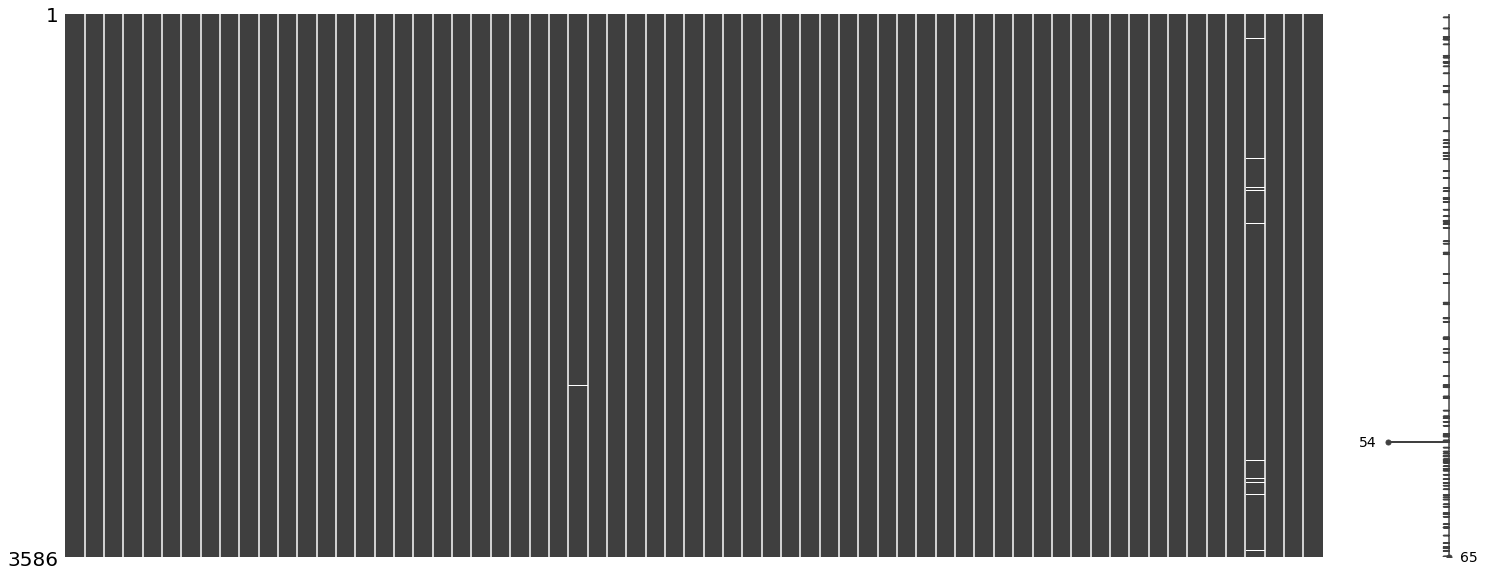

In [16]:
msno.matrix(df)

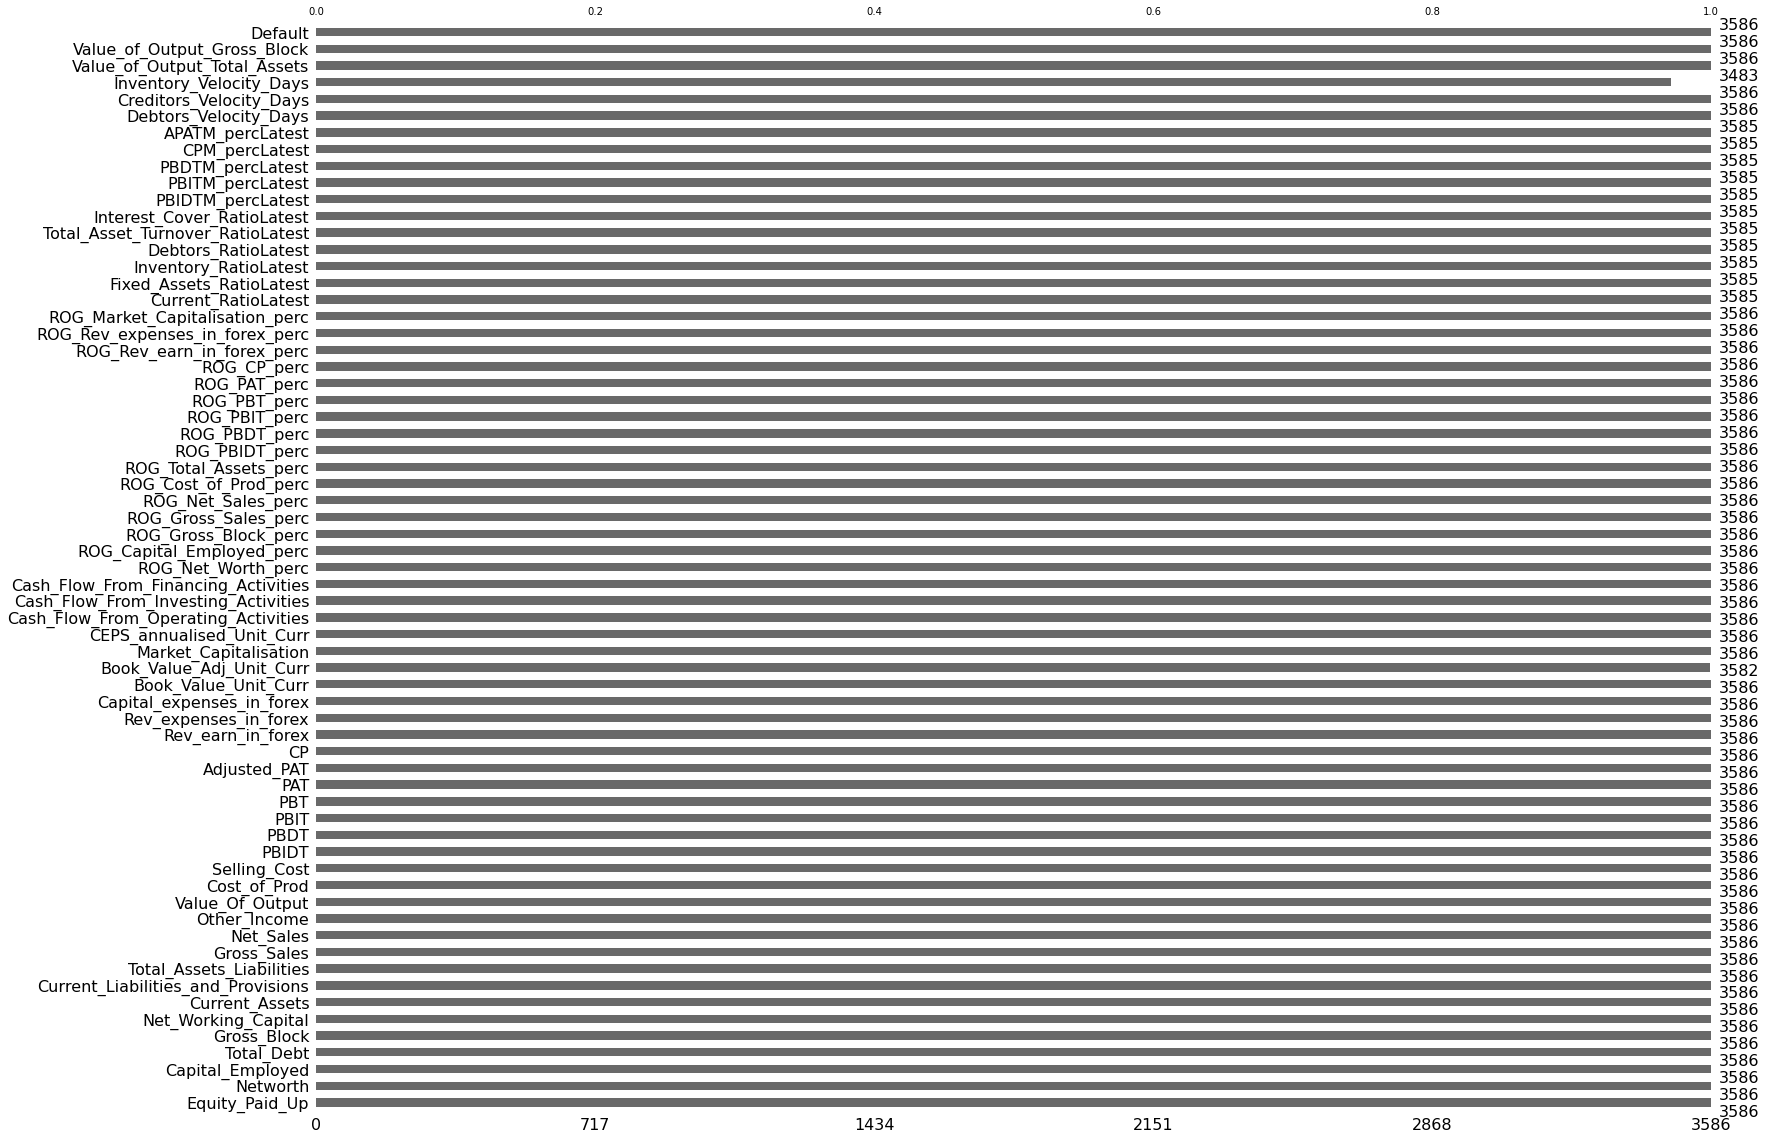

In [17]:
msno.bar(df)

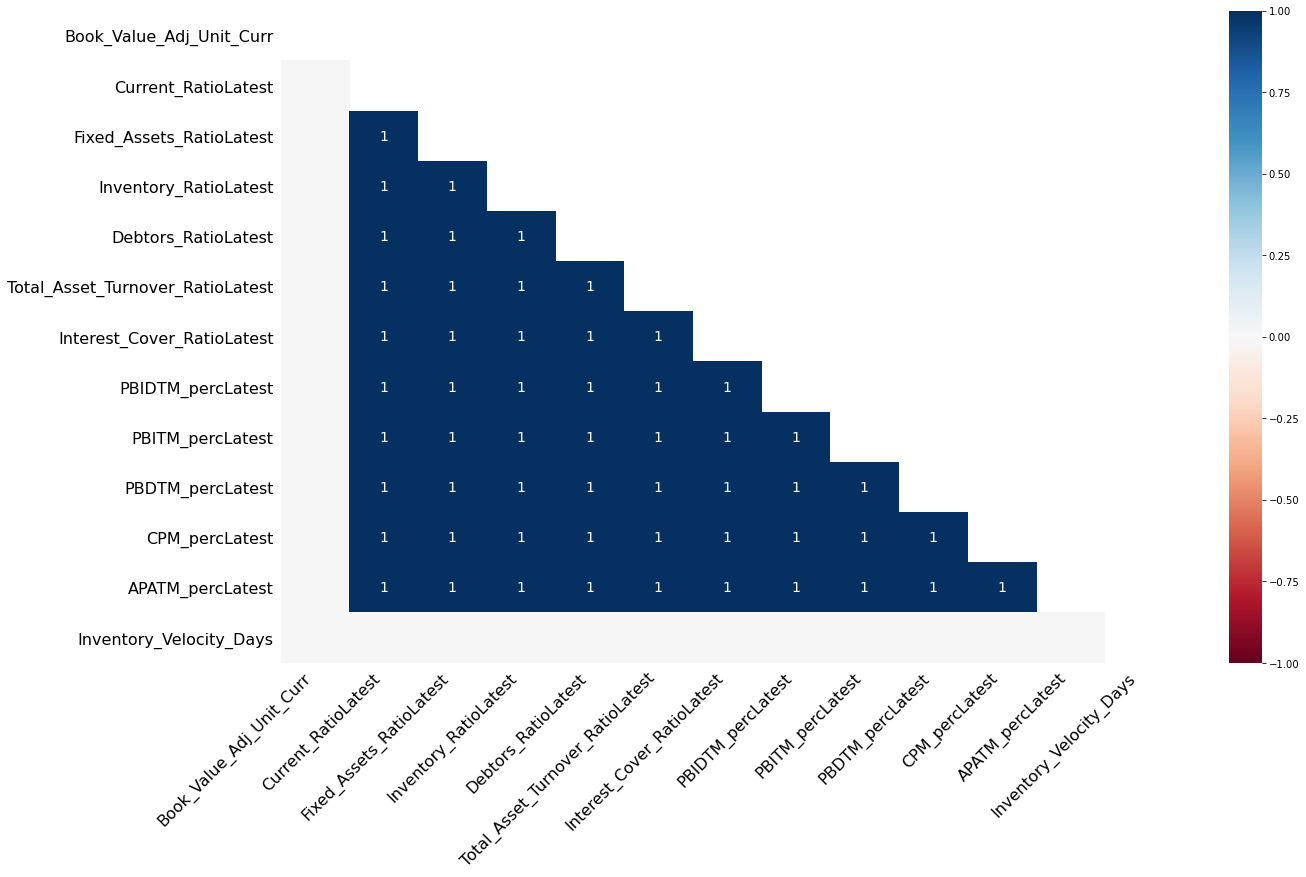

In [18]:
msno.heatmap(df)

In [19]:
df['Default'].value_counts()

0    3199
1     387
Name: Default, dtype: int64

In [20]:
3199/387

8.266149870801033

In [21]:
df.describe().T

count         mean            std  \
Equity_Paid_Up                       3586.0    62.966584     778.761744   
Networth                             3586.0   649.746299    4091.988792   
Capital_Employed                     3586.0  2799.611054   26975.135385   
Total_Debt                           3586.0  1994.823779   23652.842746   
Gross_Block                          3586.0   594.178829    4871.547802   
Net_Working_Capital                  3586.0   410.809665    6301.218546   
Current_Assets                       3586.0  1960.349172   22577.570829   
Current_Liabilities_and_Provisions   3586.0   391.992078    2675.001631   
Total_Assets_Liabilities             3586.0  1778.453751   11437.574690   
Gross_Sales                          3586.0  1123.738985   10603.703837   
Net_Sales                            3586.0  1079.702579    9996.574173   
Other_Income                         3586.0    48.729824     426.040665   
Value_Of_Output                      3586.0  1077.187292    9843.880293   
Cost_of_Prod                         3586.0   798.544621    9076.702982   
Selling_Cost                         3586.0    25.554997     194.244466   
PBIDT                                3586.0   248.175282    1949.593350   
PBDT                                 3586.0   116.268795     956.199566   
PBIT                                 3586.0   217.659395    1850.972782   
PBT                                  3586.0    85.752909     799.925768   
PAT                                  3586.0    61.218313     620.298432   
Adjusted_PAT                         3586.0    60.058963     580.432912   
CP                                   3586.0    91.734200     780.790561   
Rev_earn_in_forex                    3586.0   131.165270    1150.730209   
Rev_expenses_in_forex                3586.0   256.327002    4132.339619   
Capital_expenses_in_forex            3586.0     7.655689     111.432070   
Book_Value_Unit_Curr                 3586.0   157.237836    1622.664105   
Book_Value_Adj_Unit_Curr             3582.0  2243.152917  128283.728186   
Market_Capitalisation                3586.0  1664.092387   12805.173084   
CEPS_annualised_Unit_Curr            3586.0    36.018709     828.420796   
Cash_Flow_From_Operating_Activities  3586.0    65.770750    1455.048376   
Cash_Flow_From_Investing_Activities  3586.0   -60.870365     701.974713   
Cash_Flow_From_Financing_Activities  3586.0    11.436453    1272.257361   
ROG_Net_Worth_perc                   3586.0  1237.624576   41041.930017   
ROG_Capital_Employed_perc            3586.0  2988.884612  126472.870285   
ROG_Gross_Block_perc                 3586.0    37.554306     893.619402   
ROG_Gross_Sales_perc                 3586.0   242.672962    6103.527897   
ROG_Net_Sales_perc                   3586.0   242.588530    6103.487655   
ROG_Cost_of_Prod_perc                3586.0   310.488405    5573.215095   
ROG_Total_Assets_perc                3586.0  2793.282621  125941.653747   
ROG_PBIDT_perc                       3586.0   375.852181   23278.396117   
ROG_PBDT_perc                        3586.0   336.379947   20353.396660   
ROG_PBIT_perc                        3586.0   374.699958   22462.789381   
ROG_PBT_perc                         3586.0   224.070248   19659.232661   
ROG_PAT_perc                         3586.0   112.231654   13480.515287   
ROG_CP_perc                          3586.0   221.091523   13980.202791   
ROG_Rev_earn_in_forex_perc           3586.0    37.227844     658.666041   
ROG_Rev_expenses_in_forex_perc       3586.0   364.863221   15233.643027   
ROG_Market_Capitalisation_perc       3586.0    63.682220    1047.928144   
Current_RatioLatest                  3585.0    12.056603     108.410131   
Fixed_Assets_RatioLatest             3585.0    51.538840     681.150910   
Inventory_RatioLatest                3585.0    37.798946     458.189394   
Debtors_RatioLatest                  3585.0    33.026996     489.563498   
Total_Asset_Turnover_RatioLatest     3585.0     1.237236       

In [22]:
df_x =df.drop('Default', axis =1)
df_y = df['Default']

In [23]:
Q1 = df_x.quantile(0.25)
Q3 = df_x.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [24]:
((df_x > UL) | (df_x < LL)).sum()

Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block                             540
Net_Working_Capital                     625
Current_Assets                          577
Current_Liabilities_and_Provisions      581
Total_Assets_Liabilities                574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Prod                            560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                                      816
Rev_earn_in_forex               

In [25]:
df_x[((df_x > UL) | (df_x < LL))]=np.nan

In [26]:
df_x.isnull().sum()

Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block                             540
Net_Working_Capital                     625
Current_Assets                          577
Current_Liabilities_and_Provisions      581
Total_Assets_Liabilities                574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Prod                            560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                                      816
Rev_earn_in_forex               

In [27]:
((df_x > UL) | (df_x < LL)).sum()

Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Current_Assets                         0
Current_Liabilities_and_Provisions     0
Total_Assets_Liabilities               0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Prod                           0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Rev_earn_in_forex                      0
Rev_expenses_in_forex                  0
Capital_expenses

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
df_x.isnull().sum().sum()

41473

In [30]:
df_x.size

229504

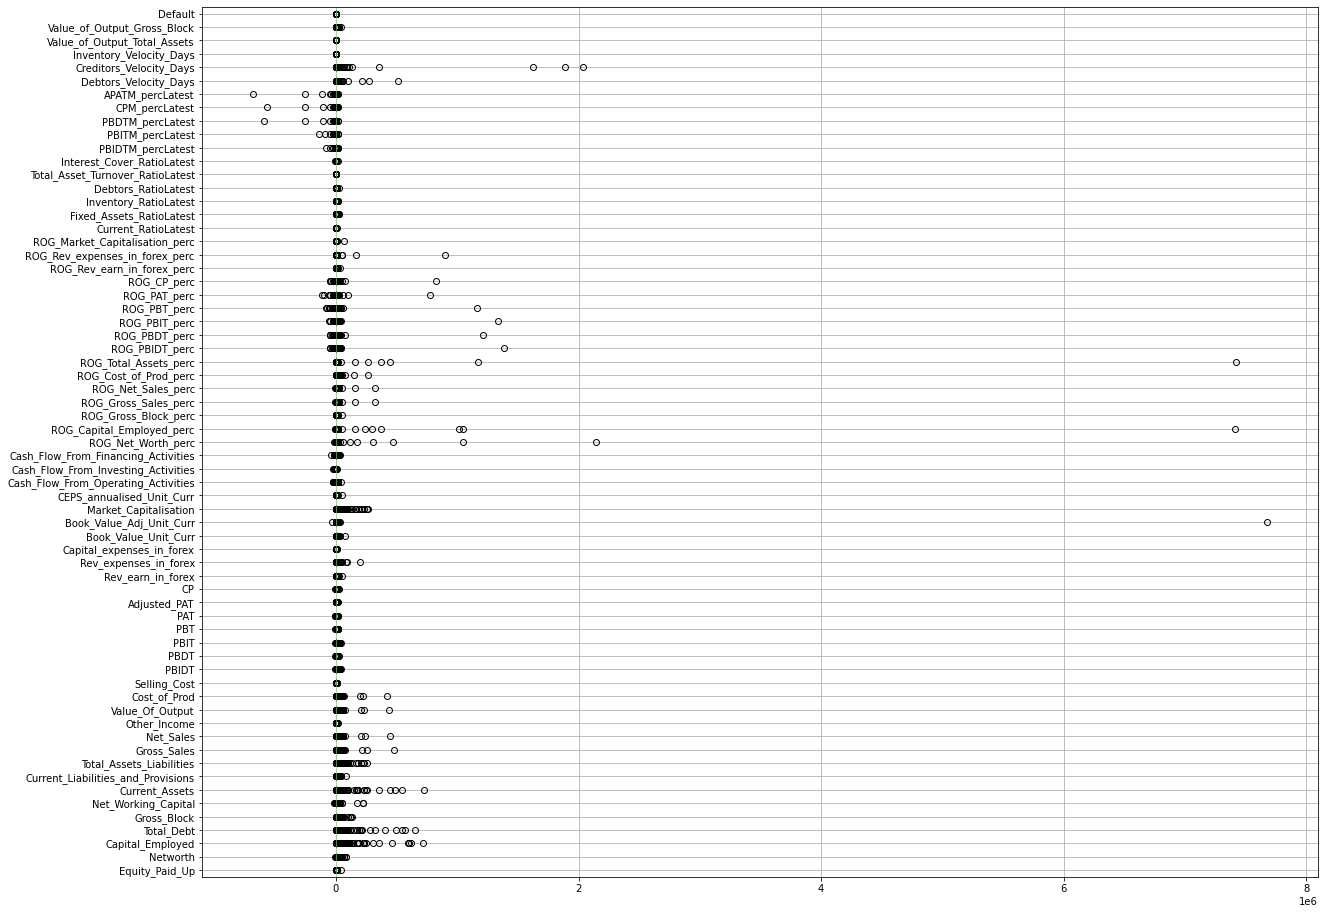

In [31]:
plt.figure(figsize=(20,16))
df.boxplot(vert=0)

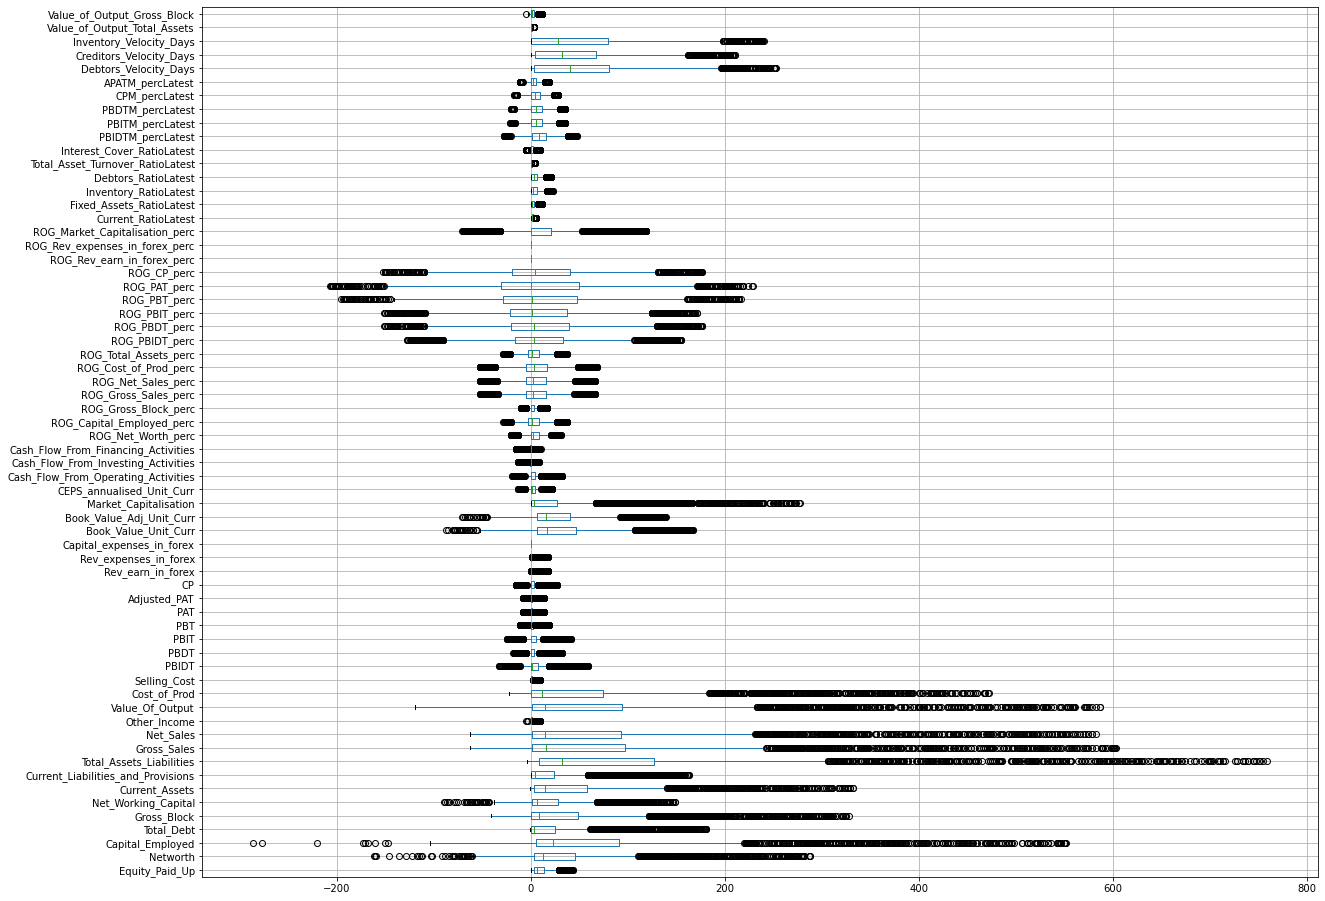

In [32]:
plt.figure(figsize=(20,16))
df_x.boxplot(vert=0)

In [33]:
df_x.isnull().sum().sort_values(ascending = False)/df_x.index.size *100

ROG_Rev_expenses_in_forex_perc         45.036252
ROG_Rev_earn_in_forex_perc             36.726157
Cash_Flow_From_Financing_Activities    28.025655
PAT                                    26.742889
Adjusted_PAT                           26.603458
PBT                                    26.240937
APATM_percLatest                       26.045733
Cash_Flow_From_Investing_Activities    24.428332
ROG_Gross_Block_perc                   23.145566
CP                                     22.755159
PBDT                                   22.727273
Cash_Flow_From_Operating_Activities    22.336866
ROG_Net_Worth_perc                     20.831009
Rev_earn_in_forex                      20.580033
Interest_Cover_RatioLatest             20.245399
CPM_percLatest                         20.105968
PBIT                                   20.078081
PBITM_percLatest                       20.022309
PBDTM_percLatest                       19.408812
Capital_expenses_in_forex              19.353040
Rev_expenses_in_fore

### Dropping the Columns with nan values since values were all outliers.
     

In [34]:
df_x = df_x.drop(['ROG_Rev_expenses_in_forex_perc','ROG_Rev_earn_in_forex_perc','Capital_expenses_in_forex'], axis=1)

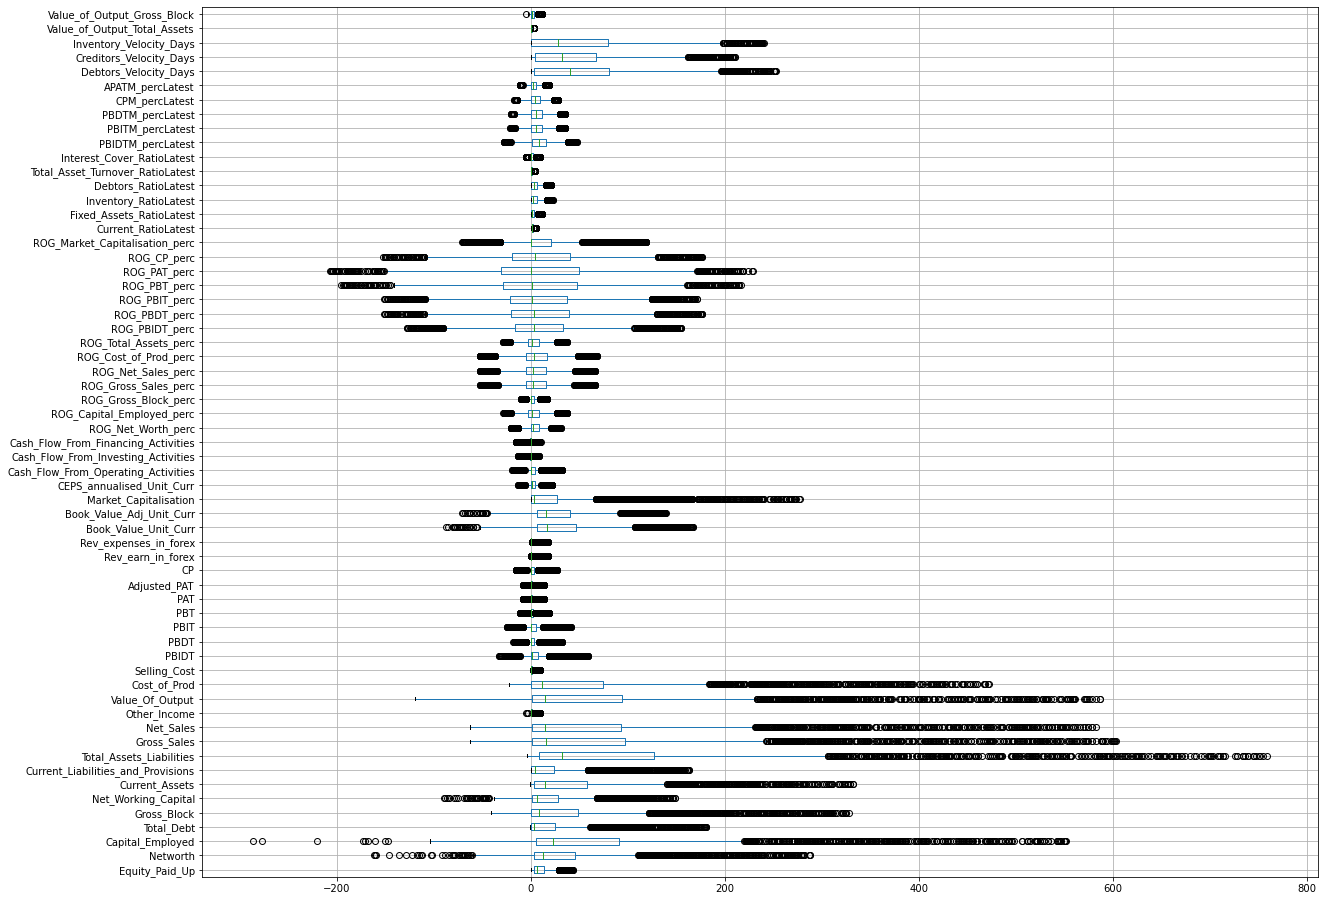

In [35]:
plt.figure(figsize=(20,16))
df_x.boxplot(vert=0)

In [36]:
temp= pd.concat([df_x,df_y], axis=1)

In [37]:
print ('Number of Rows and Columns',temp.shape,'\n')

print ('Number of rows with Missing Values', sum(temp.isnull().values.any(axis=1)),'\n')

print ('Number of missing values in the Column', temp.isnull().sum(),'\n')

print ('Total count of missing Values', temp.isnull().sum().sum())

print ( 'Proportion of Missing Values ',temp.isnull().sum().sum()/ temp.size )

Number of Rows and Columns (3586, 62) 

Number of rows with Missing Values 3403 

Number of missing values in the Column Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block                             540
Net_Working_Capital                     625
Current_Assets                          577
Current_Liabilities_and_Provisions      581
Total_Assets_Liabilities                574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Prod                            560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959

In [38]:
temp1=temp[temp.isnull().sum(axis=1) <1]

In [39]:
temp1.shape

(183, 62)

In [40]:
temp1['Default'].value_counts()

0    163
1     20
Name: Default, dtype: int64

In [41]:
94/17

5.529411764705882

1. not a very drastic change when we try to remove the out liers and the missing values in the proportion of the defaults to the total data.

2. Hence no point in considering to remove the outliers/ only work with the clean data provided data, we would rather have to most judiciously impute the missing values as well as treat the outliers.

In [42]:
def univariateanalysis (column,bins):
    print ('No of Missing Values in the column', df_x[column].isnull().sum())    
    print ('Description of '+ column)
    print ('--------------------------------------------------------------------------------------')
    print (df_x[column].describe(), end='')
       
    plt.figure()
    print ('Description of '+ column)
    print ('--------------------------------------------------------------------------------------')
    sns.distplot(df_x[column],kde= True, color = 'r');
    plt.show()
    
    plt.figure()
    print ('Boxplot of '+ column)
    print ('--------------------------------------------------------------------------------------')
    ax= sns.boxplot(x= df_x[column])
    plt.show()

No of Missing Values in the column 448
Description of Equity_Paid_Up
--------------------------------------------------------------------------------------
count    3138.000000
mean        9.829579
std         9.226749
min         0.000000
25%         3.282500
50%         6.600000
75%        13.395000
max        43.110000
Name: Equity_Paid_Up, dtype: float64Description of Equity_Paid_Up
--------------------------------------------------------------------------------------


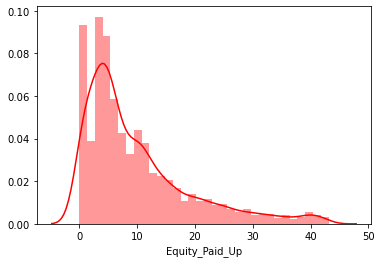

Boxplot of Equity_Paid_Up
--------------------------------------------------------------------------------------


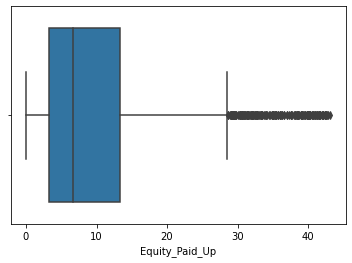

No of Missing Values in the column 650
Description of Networth
--------------------------------------------------------------------------------------
count    2936.000000
mean       36.574261
std        61.799587
min      -162.010000
25%         3.190000
50%        12.315000
75%        45.722500
max       287.160000
Name: Networth, dtype: float64Description of Networth
--------------------------------------------------------------------------------------


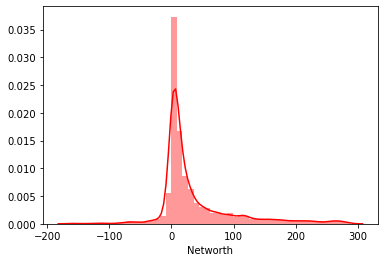

Boxplot of Networth
--------------------------------------------------------------------------------------


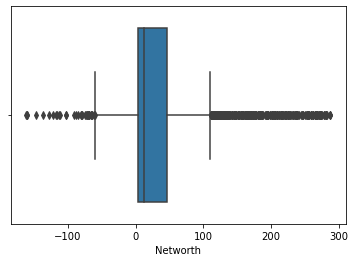

No of Missing Values in the column 596
Description of Capital_Employed
--------------------------------------------------------------------------------------
count    2990.000000
mean       73.699936
std       114.841448
min      -286.870000
25%         5.640000
50%        23.175000
75%        91.127500
max       551.450000
Name: Capital_Employed, dtype: float64Description of Capital_Employed
--------------------------------------------------------------------------------------


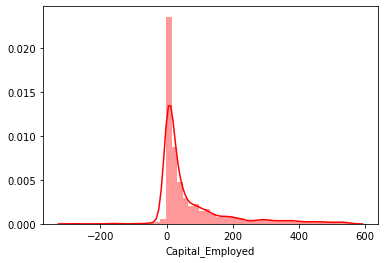

Boxplot of Capital_Employed
--------------------------------------------------------------------------------------


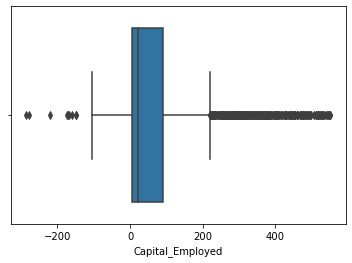

No of Missing Values in the column 583
Description of Total_Debt
--------------------------------------------------------------------------------------
count    3003.000000
mean       21.542761
std        37.828753
min        -0.720000
25%         0.000000
50%         2.970000
75%        24.480000
max       180.570000
Name: Total_Debt, dtype: float64Description of Total_Debt
--------------------------------------------------------------------------------------


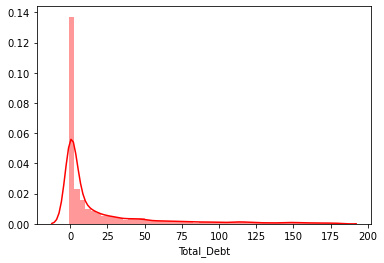

Boxplot of Total_Debt
--------------------------------------------------------------------------------------


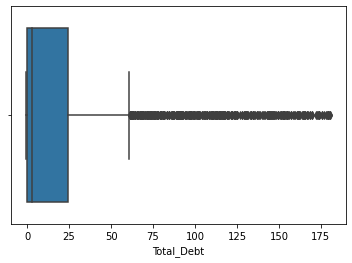

No of Missing Values in the column 540
Description of Gross_Block
--------------------------------------------------------------------------------------
count    3046.000000
mean       41.881668
std        69.966608
min       -41.190000
25%         0.250000
50%         7.905000
75%        48.692500
max       328.090000
Name: Gross_Block, dtype: float64Description of Gross_Block
--------------------------------------------------------------------------------------


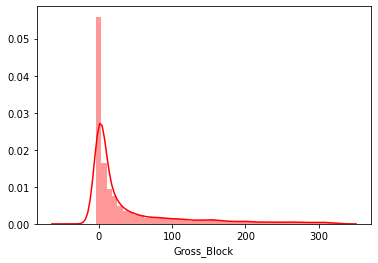

Boxplot of Gross_Block
--------------------------------------------------------------------------------------


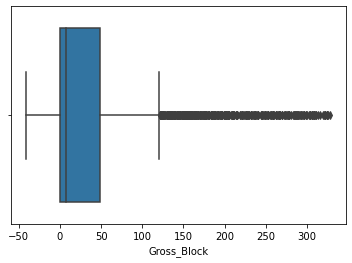

No of Missing Values in the column 625
Description of Net_Working_Capital
--------------------------------------------------------------------------------------
count    2961.000000
mean       19.907791
std        33.424293
min       -89.250000
25%         0.570000
50%         6.470000
75%        27.420000
max       148.750000
Name: Net_Working_Capital, dtype: float64Description of Net_Working_Capital
--------------------------------------------------------------------------------------


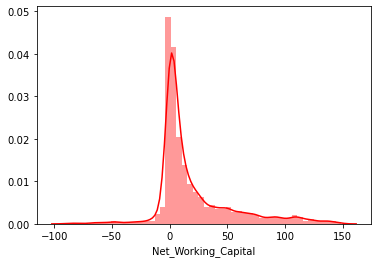

Boxplot of Net_Working_Capital
--------------------------------------------------------------------------------------


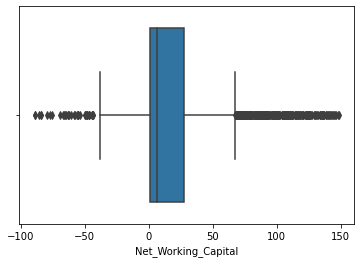

No of Missing Values in the column 577
Description of Current_Assets
--------------------------------------------------------------------------------------
count    3009.000000
mean       45.185364
std        67.122258
min        -0.910000
25%         2.760000
50%        14.710000
75%        57.670000
max       332.190000
Name: Current_Assets, dtype: float64Description of Current_Assets
--------------------------------------------------------------------------------------


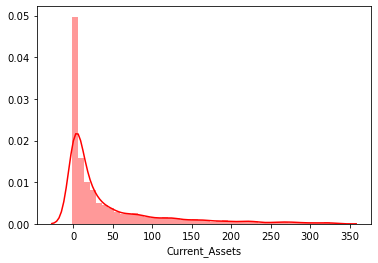

Boxplot of Current_Assets
--------------------------------------------------------------------------------------


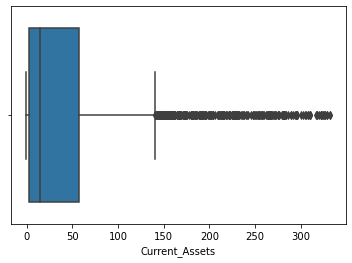

No of Missing Values in the column 581
Description of Current_Liabilities_and_Provisions
--------------------------------------------------------------------------------------
count    3005.000000
mean       20.412323
std        33.566136
min        -0.230000
25%         0.360000
50%         4.670000
75%        23.500000
max       162.470000
Name: Current_Liabilities_and_Provisions, dtype: float64Description of Current_Liabilities_and_Provisions
--------------------------------------------------------------------------------------


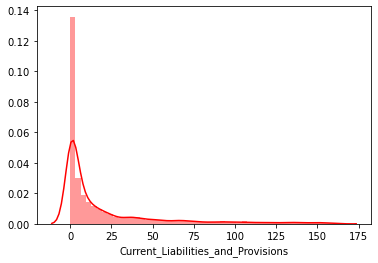

Boxplot of Current_Liabilities_and_Provisions
--------------------------------------------------------------------------------------


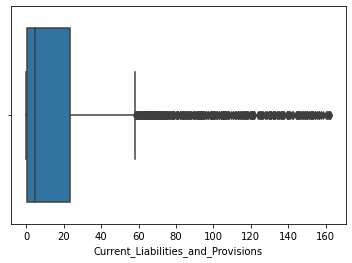

No of Missing Values in the column 574
Description of Total_Assets_Liabilities
--------------------------------------------------------------------------------------
count    3012.000000
mean      103.351959
std       156.445012
min        -4.510000
25%         7.920000
50%        31.540000
75%       126.977500
max       758.510000
Name: Total_Assets_Liabilities, dtype: float64Description of Total_Assets_Liabilities
--------------------------------------------------------------------------------------


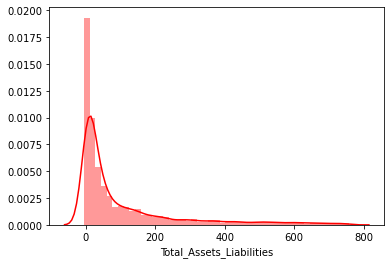

Boxplot of Total_Assets_Liabilities
--------------------------------------------------------------------------------------


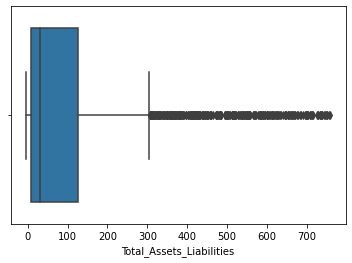

No of Missing Values in the column 554
Description of Gross_Sales
--------------------------------------------------------------------------------------
count    3032.000000
mean       78.393654
std       129.887081
min       -62.590000
25%         0.740000
50%        15.070000
75%        97.277500
max       602.560000
Name: Gross_Sales, dtype: float64Description of Gross_Sales
--------------------------------------------------------------------------------------


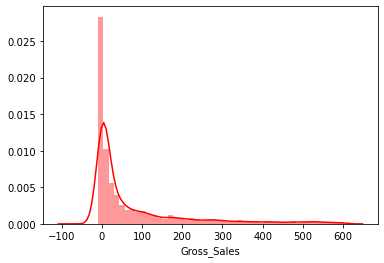

Boxplot of Gross_Sales
--------------------------------------------------------------------------------------


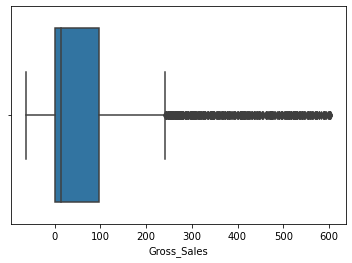

No of Missing Values in the column 556
Description of Net_Sales
--------------------------------------------------------------------------------------
count    3030.000000
mean       75.250442
std       124.277811
min       -62.590000
25%         0.732500
50%        14.785000
75%        92.572500
max       581.830000
Name: Net_Sales, dtype: float64Description of Net_Sales
--------------------------------------------------------------------------------------


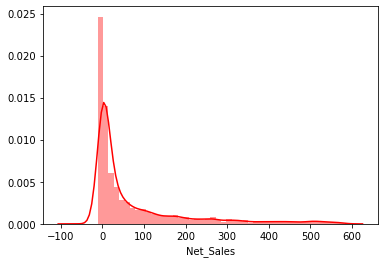

Boxplot of Net_Sales
--------------------------------------------------------------------------------------


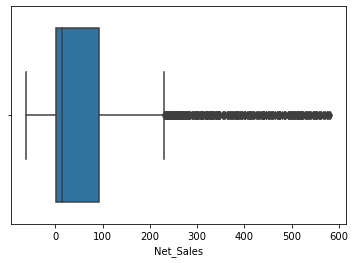

No of Missing Values in the column 603
Description of Other_Income
--------------------------------------------------------------------------------------
count    2983.000000
mean        1.100872
std         1.892025
min        -5.220000
25%         0.010000
50%         0.210000
75%         1.290000
max         9.050000
Name: Other_Income, dtype: float64Description of Other_Income
--------------------------------------------------------------------------------------


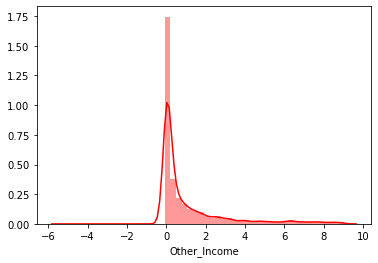

Boxplot of Other_Income
--------------------------------------------------------------------------------------


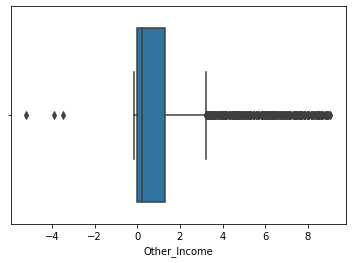

No of Missing Values in the column 559
Description of Value_Of_Output
--------------------------------------------------------------------------------------
count    3027.000000
mean       75.003314
std       123.579308
min      -119.100000
25%         0.760000
50%        14.640000
75%        93.295000
max       586.250000
Name: Value_Of_Output, dtype: float64Description of Value_Of_Output
--------------------------------------------------------------------------------------


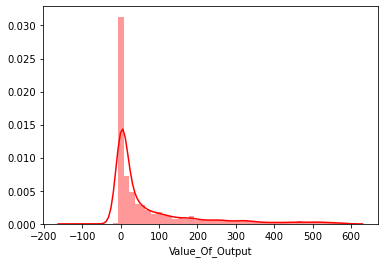

Boxplot of Value_Of_Output
--------------------------------------------------------------------------------------


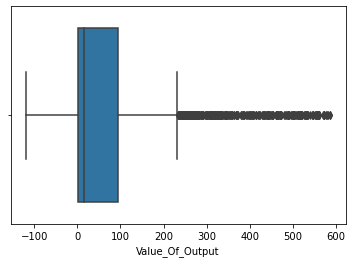

No of Missing Values in the column 560
Description of Cost_of_Prod
--------------------------------------------------------------------------------------
count    3026.000000
mean       60.218146
std        98.581559
min       -22.650000
25%         0.500000
50%        11.310000
75%        73.807500
max       471.550000
Name: Cost_of_Prod, dtype: float64Description of Cost_of_Prod
--------------------------------------------------------------------------------------


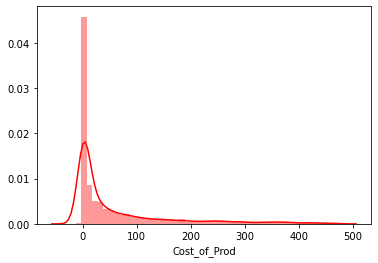

Boxplot of Cost_of_Prod
--------------------------------------------------------------------------------------


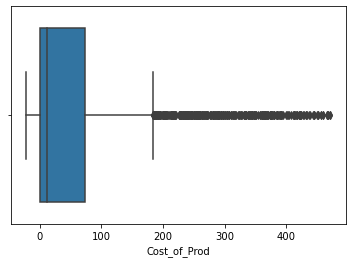

No of Missing Values in the column 605
Description of Selling_Cost
--------------------------------------------------------------------------------------
count    2981.000000
mean        1.011198
std         1.973407
min         0.000000
25%         0.000000
50%         0.050000
75%         0.920000
max         9.700000
Name: Selling_Cost, dtype: float64Description of Selling_Cost
--------------------------------------------------------------------------------------


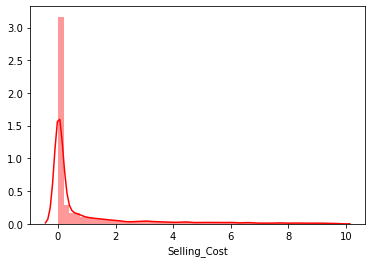

Boxplot of Selling_Cost
--------------------------------------------------------------------------------------


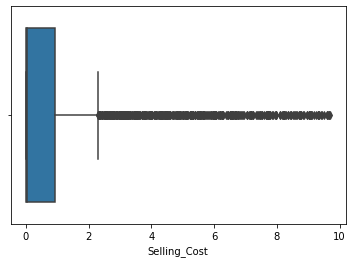

No of Missing Values in the column 671
Description of PBIDT
--------------------------------------------------------------------------------------
count    2915.000000
mean        6.056412
std        12.657863
min       -33.410000
25%         0.010000
50%         0.840000
75%         7.365000
max        58.590000
Name: PBIDT, dtype: float64Description of PBIDT
--------------------------------------------------------------------------------------


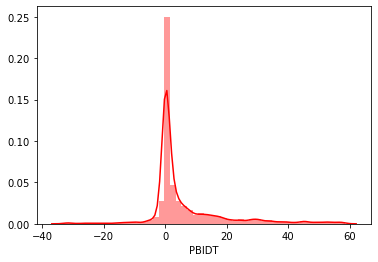

Boxplot of PBIDT
--------------------------------------------------------------------------------------


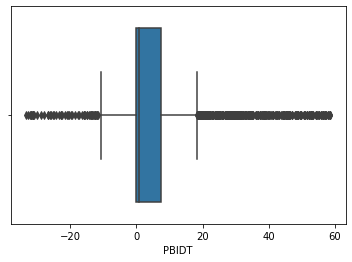

No of Missing Values in the column 815
Description of PBDT
--------------------------------------------------------------------------------------
count    2771.000000
mean        2.883930
std         7.204333
min       -18.800000
25%         0.000000
50%         0.380000
75%         3.365000
max        32.170000
Name: PBDT, dtype: float64Description of PBDT
--------------------------------------------------------------------------------------


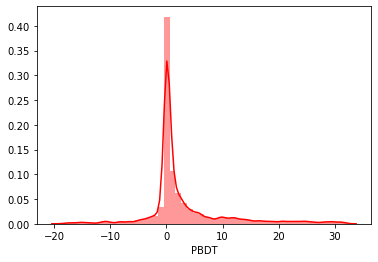

Boxplot of PBDT
--------------------------------------------------------------------------------------


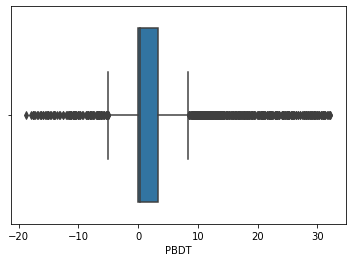

No of Missing Values in the column 720
Description of PBIT
--------------------------------------------------------------------------------------
count    2866.000000
mean        4.006410
std         9.203616
min       -24.840000
25%         0.000000
50%         0.490000
75%         5.042500
max        41.500000
Name: PBIT, dtype: float64Description of PBIT
--------------------------------------------------------------------------------------


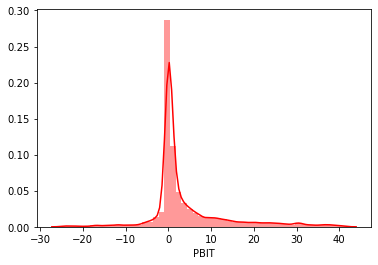

Boxplot of PBIT
--------------------------------------------------------------------------------------


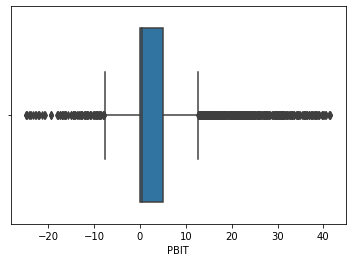

No of Missing Values in the column 941
Description of PBT
--------------------------------------------------------------------------------------
count    2645.000000
mean        1.419992
std         4.265092
min       -11.240000
25%        -0.030000
50%         0.150000
75%         1.650000
max        18.580000
Name: PBT, dtype: float64Description of PBT
--------------------------------------------------------------------------------------


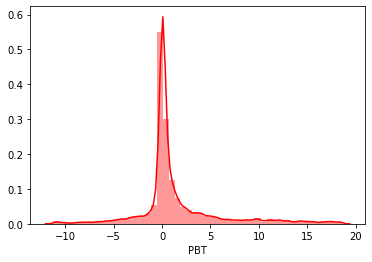

Boxplot of PBT
--------------------------------------------------------------------------------------


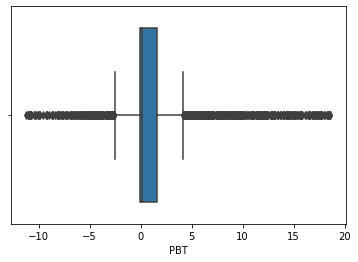

No of Missing Values in the column 959
Description of PAT
--------------------------------------------------------------------------------------
count    2627.000000
mean        1.054819
std         3.191573
min        -8.380000
25%        -0.030000
50%         0.120000
75%         1.300000
max        13.930000
Name: PAT, dtype: float64Description of PAT
--------------------------------------------------------------------------------------


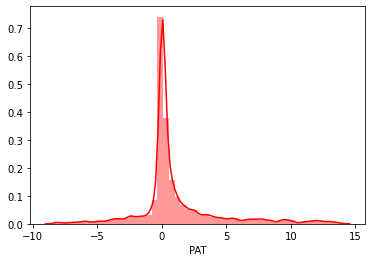

Boxplot of PAT
--------------------------------------------------------------------------------------


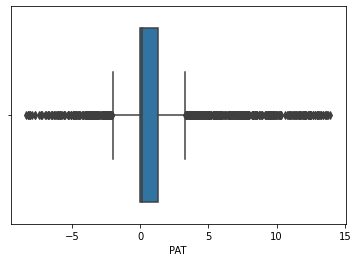

No of Missing Values in the column 954
Description of Adjusted_PAT
--------------------------------------------------------------------------------------
count    2632.000000
mean        0.999616
std         3.123099
min        -8.080000
25%        -0.040000
50%         0.100000
75%         1.200000
max        13.470000
Name: Adjusted_PAT, dtype: float64Description of Adjusted_PAT
--------------------------------------------------------------------------------------


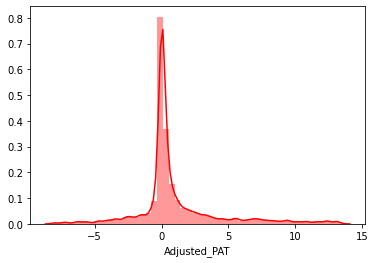

Boxplot of Adjusted_PAT
--------------------------------------------------------------------------------------


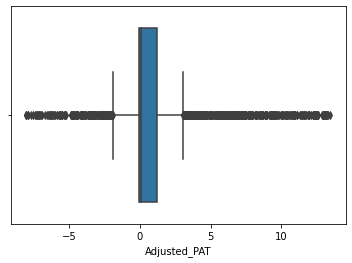

No of Missing Values in the column 816
Description of CP
--------------------------------------------------------------------------------------
count    2770.000000
mean        2.422285
std         6.008720
min       -15.930000
25%         0.000000
50%         0.355000
75%         2.927500
max        27.250000
Name: CP, dtype: float64Description of CP
--------------------------------------------------------------------------------------


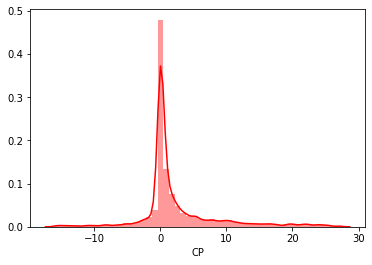

Boxplot of CP
--------------------------------------------------------------------------------------


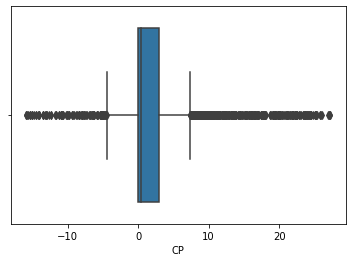

No of Missing Values in the column 738
Description of Rev_earn_in_forex
--------------------------------------------------------------------------------------
count    2848.000000
mean        0.992683
std         3.007959
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        17.880000
Name: Rev_earn_in_forex, dtype: float64Description of Rev_earn_in_forex
--------------------------------------------------------------------------------------


C:\Users\sanjay singh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


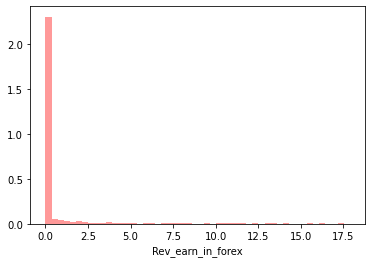

Boxplot of Rev_earn_in_forex
--------------------------------------------------------------------------------------


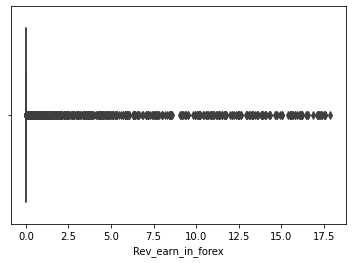

No of Missing Values in the column 693
Description of Rev_expenses_in_forex
--------------------------------------------------------------------------------------
count    2893.000000
mean        1.232389
std         3.194438
min         0.000000
25%         0.000000
50%         0.000000
75%         0.220000
max        17.420000
Name: Rev_expenses_in_forex, dtype: float64Description of Rev_expenses_in_forex
--------------------------------------------------------------------------------------


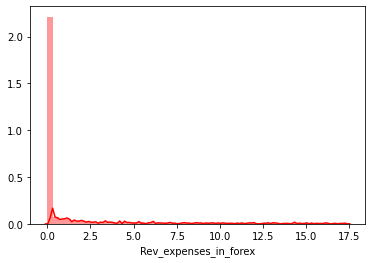

Boxplot of Rev_expenses_in_forex
--------------------------------------------------------------------------------------


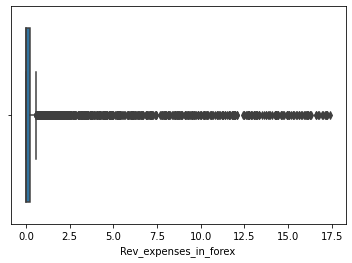

No of Missing Values in the column 485
Description of Book_Value_Unit_Curr
--------------------------------------------------------------------------------------
count    3101.000000
mean       30.853796
std        39.900465
min       -87.250000
25%         6.620000
50%        17.030000
75%        46.650000
max       167.060000
Name: Book_Value_Unit_Curr, dtype: float64Description of Book_Value_Unit_Curr
--------------------------------------------------------------------------------------


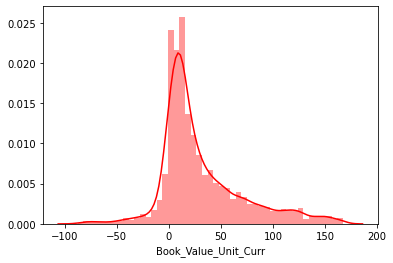

Boxplot of Book_Value_Unit_Curr
--------------------------------------------------------------------------------------


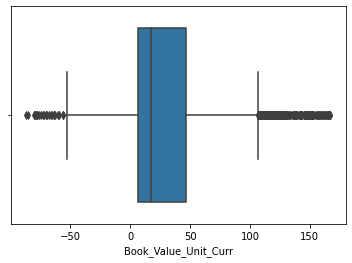

No of Missing Values in the column 490
Description of Book_Value_Adj_Unit_Curr
--------------------------------------------------------------------------------------
count    3096.000000
mean       26.777487
std        33.591131
min       -70.640000
25%         6.200000
50%        15.220000
75%        40.485000
max       138.790000
Name: Book_Value_Adj_Unit_Curr, dtype: float64Description of Book_Value_Adj_Unit_Curr
--------------------------------------------------------------------------------------


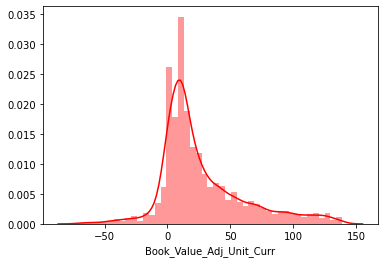

Boxplot of Book_Value_Adj_Unit_Curr
--------------------------------------------------------------------------------------


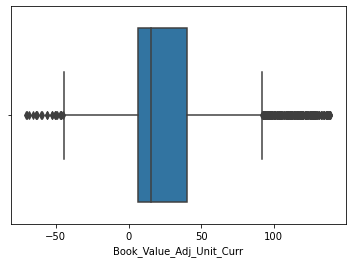

No of Missing Values in the column 639
Description of Market_Capitalisation
--------------------------------------------------------------------------------------
count    2947.000000
mean       27.643984
std        52.876803
min         0.000000
25%         0.000000
50%         3.020000
75%        26.625000
max       277.030000
Name: Market_Capitalisation, dtype: float64Description of Market_Capitalisation
--------------------------------------------------------------------------------------


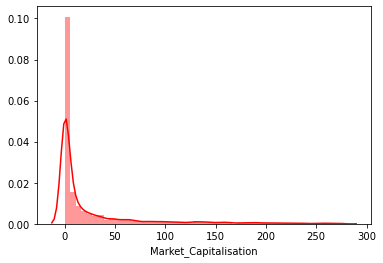

Boxplot of Market_Capitalisation
--------------------------------------------------------------------------------------


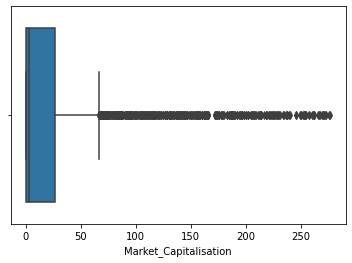

No of Missing Values in the column 602
Description of CEPS_annualised_Unit_Curr
--------------------------------------------------------------------------------------
count    2984.000000
mean        2.715647
std         5.697754
min       -13.130000
25%         0.000000
50%         0.640000
75%         4.320000
max        21.920000
Name: CEPS_annualised_Unit_Curr, dtype: float64Description of CEPS_annualised_Unit_Curr
--------------------------------------------------------------------------------------


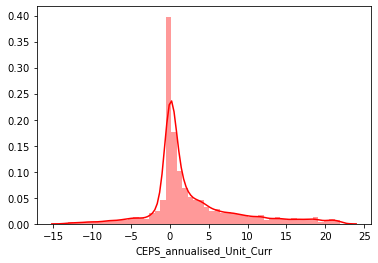

Boxplot of CEPS_annualised_Unit_Curr
--------------------------------------------------------------------------------------


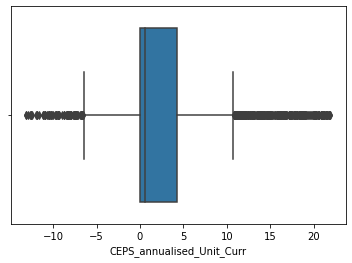

No of Missing Values in the column 801
Description of Cash_Flow_From_Operating_Activities
--------------------------------------------------------------------------------------
count    2785.000000
mean        2.527077
std         7.723537
min       -19.690000
25%        -0.330000
50%         0.120000
75%         3.820000
max        32.070000
Name: Cash_Flow_From_Operating_Activities, dtype: float64Description of Cash_Flow_From_Operating_Activities
--------------------------------------------------------------------------------------


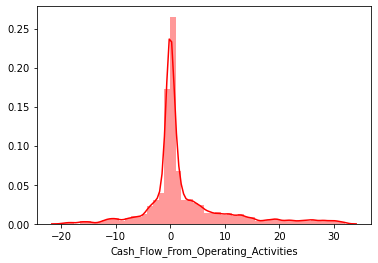

Boxplot of Cash_Flow_From_Operating_Activities
--------------------------------------------------------------------------------------


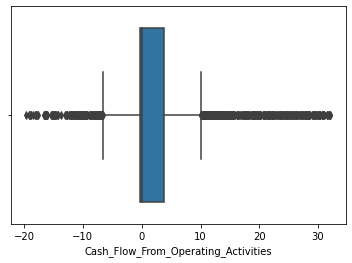

No of Missing Values in the column 876
Description of Cash_Flow_From_Investing_Activities
--------------------------------------------------------------------------------------
count    2710.000000
mean       -0.892218
std         3.091784
min       -12.960000
25%        -1.257500
50%         0.000000
75%         0.100000
max         7.960000
Name: Cash_Flow_From_Investing_Activities, dtype: float64Description of Cash_Flow_From_Investing_Activities
--------------------------------------------------------------------------------------


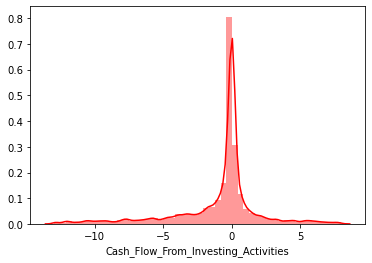

Boxplot of Cash_Flow_From_Investing_Activities
--------------------------------------------------------------------------------------


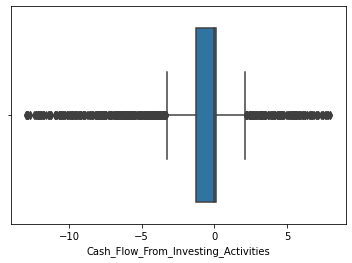

No of Missing Values in the column 1005
Description of Cash_Flow_From_Financing_Activities
--------------------------------------------------------------------------------------
count    2581.000000
mean       -0.911271
std         3.888463
min       -15.290000
25%        -1.220000
50%         0.000000
75%         0.110000
max         9.830000
Name: Cash_Flow_From_Financing_Activities, dtype: float64Description of Cash_Flow_From_Financing_Activities
--------------------------------------------------------------------------------------


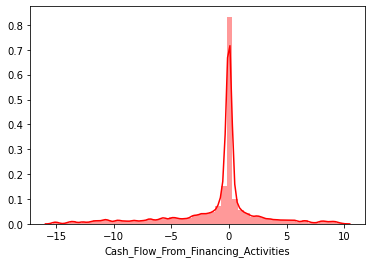

Boxplot of Cash_Flow_From_Financing_Activities
--------------------------------------------------------------------------------------


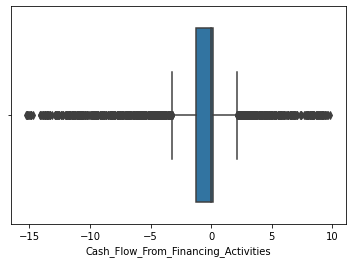

No of Missing Values in the column 747
Description of ROG_Net_Worth_perc
--------------------------------------------------------------------------------------
count    2839.000000
mean        3.701243
std         9.152914
min       -20.630000
25%        -0.205000
50%         1.760000
75%         8.240000
max        30.590000
Name: ROG_Net_Worth_perc, dtype: float64Description of ROG_Net_Worth_perc
--------------------------------------------------------------------------------------


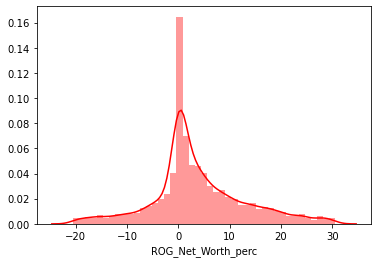

Boxplot of ROG_Net_Worth_perc
--------------------------------------------------------------------------------------


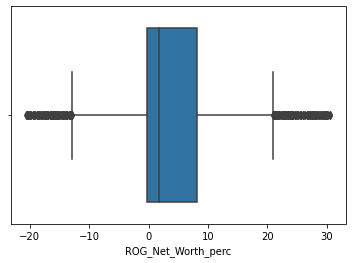

No of Missing Values in the column 572
Description of ROG_Capital_Employed_perc
--------------------------------------------------------------------------------------
count    3014.000000
mean        2.843457
std        11.548244
min       -28.440000
25%        -3.037500
50%         0.925000
75%         8.787500
max        37.140000
Name: ROG_Capital_Employed_perc, dtype: float64Description of ROG_Capital_Employed_perc
--------------------------------------------------------------------------------------


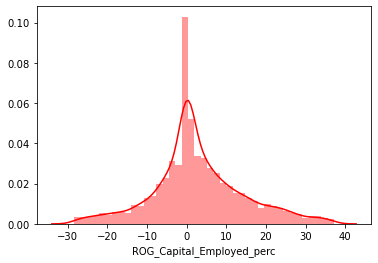

Boxplot of ROG_Capital_Employed_perc
--------------------------------------------------------------------------------------


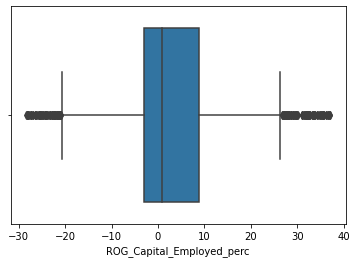

No of Missing Values in the column 830
Description of ROG_Gross_Block_perc
--------------------------------------------------------------------------------------
count    2756.000000
mean        2.080134
std         4.513705
min       -10.000000
25%         0.000000
50%         0.065000
75%         3.502500
max        16.750000
Name: ROG_Gross_Block_perc, dtype: float64Description of ROG_Gross_Block_perc
--------------------------------------------------------------------------------------


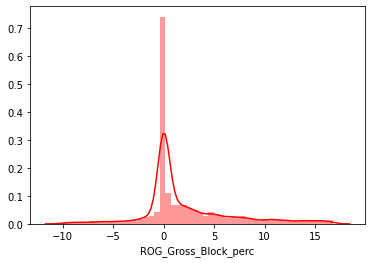

Boxplot of ROG_Gross_Block_perc
--------------------------------------------------------------------------------------


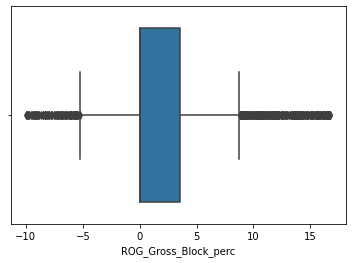

No of Missing Values in the column 671
Description of ROG_Gross_Sales_perc
--------------------------------------------------------------------------------------
count    2915.000000
mean        4.279245
std        21.148595
min       -52.210000
25%        -4.680000
50%         2.020000
75%        15.010000
max        65.920000
Name: ROG_Gross_Sales_perc, dtype: float64Description of ROG_Gross_Sales_perc
--------------------------------------------------------------------------------------


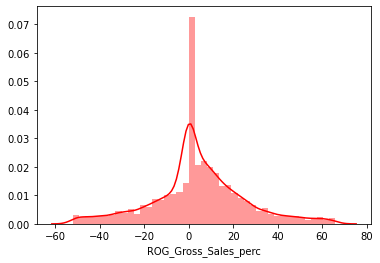

Boxplot of ROG_Gross_Sales_perc
--------------------------------------------------------------------------------------


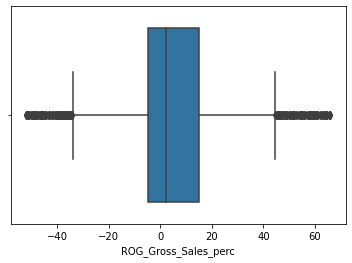

No of Missing Values in the column 667
Description of ROG_Net_Sales_perc
--------------------------------------------------------------------------------------
count    2919.000000
mean        4.274488
std        21.232257
min       -52.560000
25%        -4.815000
50%         2.020000
75%        15.230000
max        66.070000
Name: ROG_Net_Sales_perc, dtype: float64Description of ROG_Net_Sales_perc
--------------------------------------------------------------------------------------


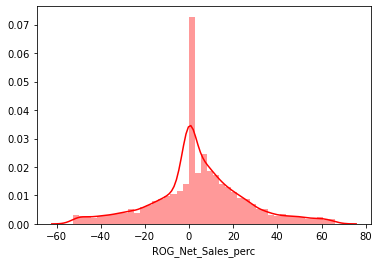

Boxplot of ROG_Net_Sales_perc
--------------------------------------------------------------------------------------


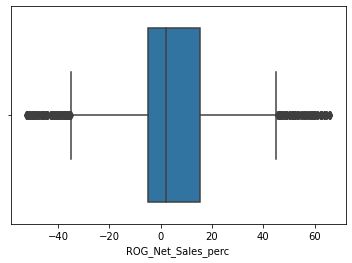

No of Missing Values in the column 675
Description of ROG_Cost_of_Prod_perc
--------------------------------------------------------------------------------------
count    2911.000000
mean        4.352061
std        21.935646
min       -52.600000
25%        -4.925000
50%         2.860000
75%        16.325000
max        68.400000
Name: ROG_Cost_of_Prod_perc, dtype: float64Description of ROG_Cost_of_Prod_perc
--------------------------------------------------------------------------------------


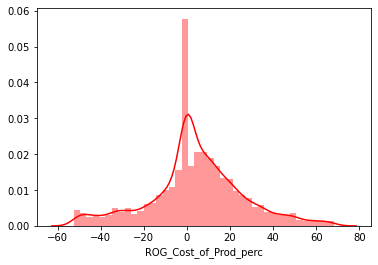

Boxplot of ROG_Cost_of_Prod_perc
--------------------------------------------------------------------------------------


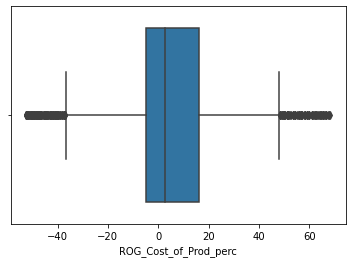

No of Missing Values in the column 483
Description of ROG_Total_Assets_perc
--------------------------------------------------------------------------------------
count    3103.000000
mean        2.587838
std        11.748880
min       -28.610000
25%        -3.535000
50%         0.820000
75%         8.510000
max        36.880000
Name: ROG_Total_Assets_perc, dtype: float64Description of ROG_Total_Assets_perc
--------------------------------------------------------------------------------------


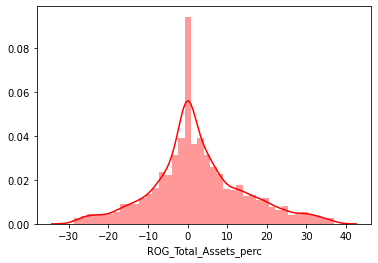

Boxplot of ROG_Total_Assets_perc
--------------------------------------------------------------------------------------


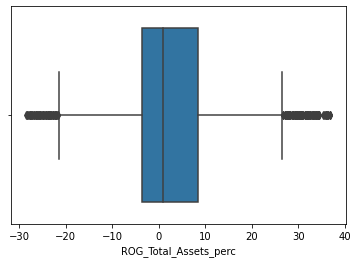

No of Missing Values in the column 611
Description of ROG_PBIDT_perc
--------------------------------------------------------------------------------------
count    2975.000000
mean        9.181318
std        51.055322
min      -127.770000
25%       -16.585000
50%         3.430000
75%        32.545000
max       154.580000
Name: ROG_PBIDT_perc, dtype: float64Description of ROG_PBIDT_perc
--------------------------------------------------------------------------------------


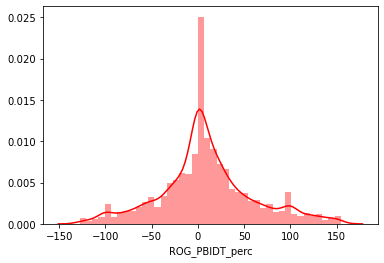

Boxplot of ROG_PBIDT_perc
--------------------------------------------------------------------------------------


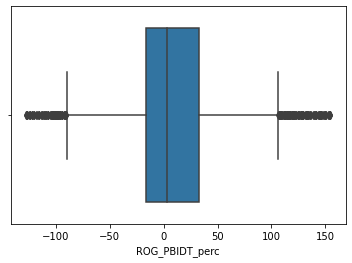

No of Missing Values in the column 628
Description of ROG_PBDT_perc
--------------------------------------------------------------------------------------
count    2958.000000
mean        9.955943
std        57.572085
min      -151.520000
25%       -20.112500
50%         2.930000
75%        39.705000
max       176.520000
Name: ROG_PBDT_perc, dtype: float64Description of ROG_PBDT_perc
--------------------------------------------------------------------------------------


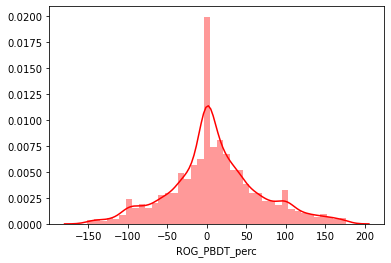

Boxplot of ROG_PBDT_perc
--------------------------------------------------------------------------------------


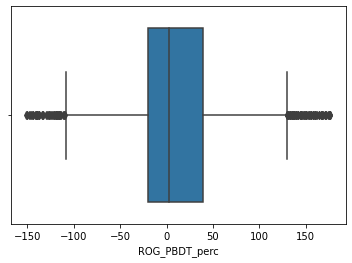

No of Missing Values in the column 616
Description of ROG_PBIT_perc
--------------------------------------------------------------------------------------
count    2970.000000
mean        7.876195
std        57.411470
min      -151.480000
25%       -21.205000
50%         1.060000
75%        37.210000
max       171.430000
Name: ROG_PBIT_perc, dtype: float64Description of ROG_PBIT_perc
--------------------------------------------------------------------------------------


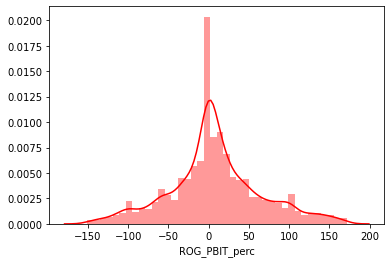

Boxplot of ROG_PBIT_perc
--------------------------------------------------------------------------------------


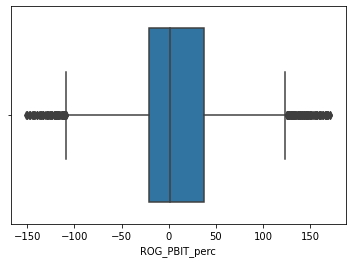

No of Missing Values in the column 611
Description of ROG_PBT_perc
--------------------------------------------------------------------------------------
count    2975.000000
mean       10.565550
std        70.498226
min      -195.830000
25%       -28.320000
50%         1.230000
75%        47.220000
max       216.380000
Name: ROG_PBT_perc, dtype: float64Description of ROG_PBT_perc
--------------------------------------------------------------------------------------


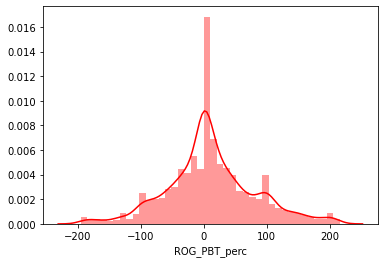

Boxplot of ROG_PBT_perc
--------------------------------------------------------------------------------------


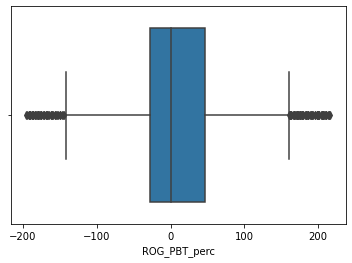

No of Missing Values in the column 598
Description of ROG_PAT_perc
--------------------------------------------------------------------------------------
count    2988.000000
mean        9.792855
std        74.152986
min      -207.190000
25%       -30.590000
50%         0.375000
75%        49.887500
max       228.570000
Name: ROG_PAT_perc, dtype: float64Description of ROG_PAT_perc
--------------------------------------------------------------------------------------


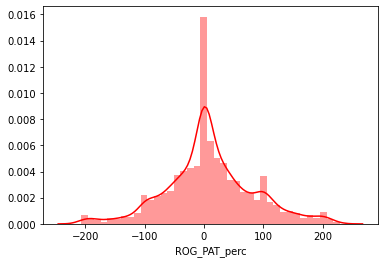

Boxplot of ROG_PAT_perc
--------------------------------------------------------------------------------------


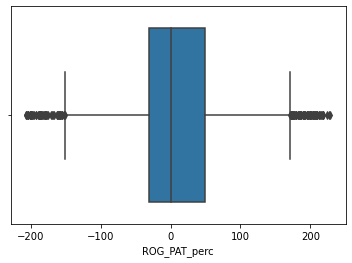

No of Missing Values in the column 637
Description of ROG_CP_perc
--------------------------------------------------------------------------------------
count    2949.000000
mean       10.404303
std        57.906595
min      -152.050000
25%       -19.670000
50%         4.060000
75%        40.370000
max       176.440000
Name: ROG_CP_perc, dtype: float64Description of ROG_CP_perc
--------------------------------------------------------------------------------------


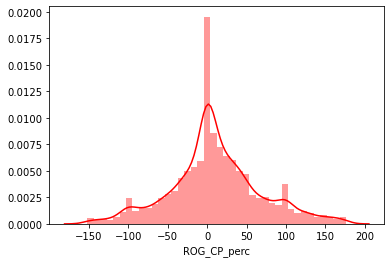

Boxplot of ROG_CP_perc
--------------------------------------------------------------------------------------


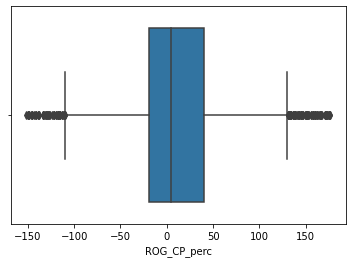

No of Missing Values in the column 497
Description of ROG_Market_Capitalisation_perc
--------------------------------------------------------------------------------------
count    3089.000000
mean       10.896611
std        34.120469
min       -70.850000
25%         0.000000
50%         0.000000
75%        21.150000
max       118.760000
Name: ROG_Market_Capitalisation_perc, dtype: float64Description of ROG_Market_Capitalisation_perc
--------------------------------------------------------------------------------------


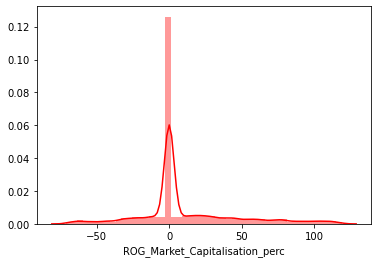

Boxplot of ROG_Market_Capitalisation_perc
--------------------------------------------------------------------------------------


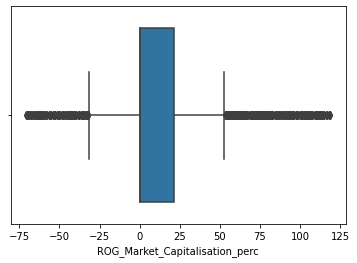

No of Missing Values in the column 566
Description of Current_RatioLatest
--------------------------------------------------------------------------------------
count    3020.000000
mean        1.425609
std         1.058620
min         0.000000
25%         0.790000
50%         1.200000
75%         1.780000
max         5.570000
Name: Current_RatioLatest, dtype: float64Description of Current_RatioLatest
--------------------------------------------------------------------------------------


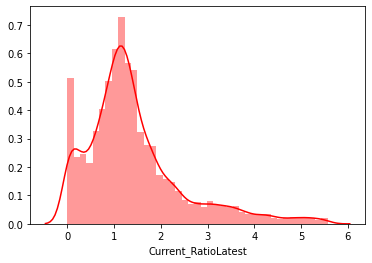

Boxplot of Current_RatioLatest
--------------------------------------------------------------------------------------


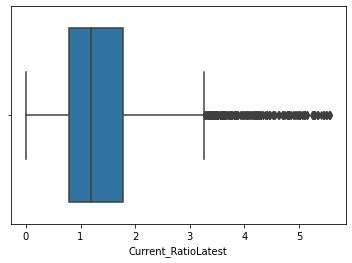

No of Missing Values in the column 496
Description of Fixed_Assets_RatioLatest
--------------------------------------------------------------------------------------
count    3090.000000
mean        2.007528
std         2.447800
min         0.000000
25%         0.140000
50%         1.150000
75%         2.817500
max        11.430000
Name: Fixed_Assets_RatioLatest, dtype: float64Description of Fixed_Assets_RatioLatest
--------------------------------------------------------------------------------------


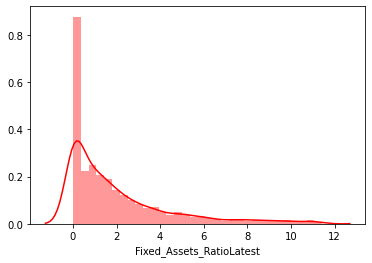

Boxplot of Fixed_Assets_RatioLatest
--------------------------------------------------------------------------------------


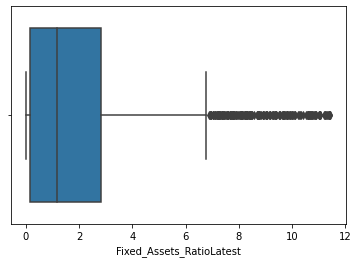

No of Missing Values in the column 376
Description of Inventory_RatioLatest
--------------------------------------------------------------------------------------
count    3210.000000
mean        4.170280
std         5.013648
min         0.000000
25%         0.000000
50%         2.540000
75%         6.587500
max        22.310000
Name: Inventory_RatioLatest, dtype: float64Description of Inventory_RatioLatest
--------------------------------------------------------------------------------------


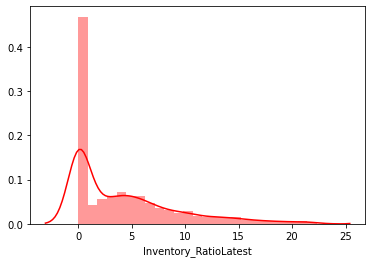

Boxplot of Inventory_RatioLatest
--------------------------------------------------------------------------------------


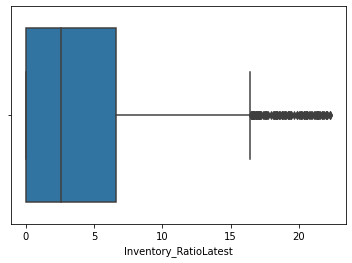

No of Missing Values in the column 372
Description of Debtors_RatioLatest
--------------------------------------------------------------------------------------
count    3214.000000
mean        4.296456
std         4.607972
min         0.000000
25%         0.100000
50%         3.195000
75%         6.337500
max        20.650000
Name: Debtors_RatioLatest, dtype: float64Description of Debtors_RatioLatest
--------------------------------------------------------------------------------------


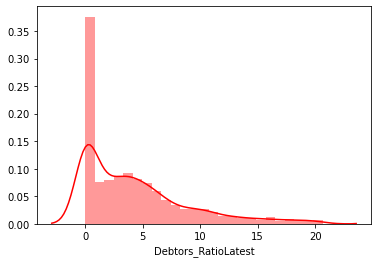

Boxplot of Debtors_RatioLatest
--------------------------------------------------------------------------------------


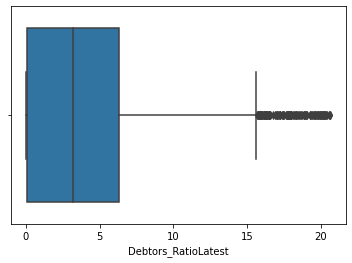

No of Missing Values in the column 202
Description of Total_Asset_Turnover_RatioLatest
--------------------------------------------------------------------------------------
count    3384.000000
mean        0.825349
std         0.905669
min         0.000000
25%         0.060000
50%         0.480000
75%         1.370000
max         3.760000
Name: Total_Asset_Turnover_RatioLatest, dtype: float64Description of Total_Asset_Turnover_RatioLatest
--------------------------------------------------------------------------------------


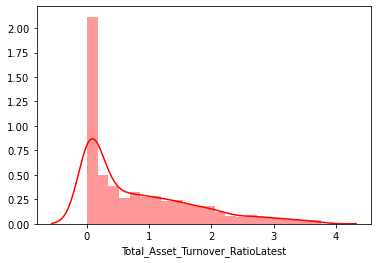

Boxplot of Total_Asset_Turnover_RatioLatest
--------------------------------------------------------------------------------------


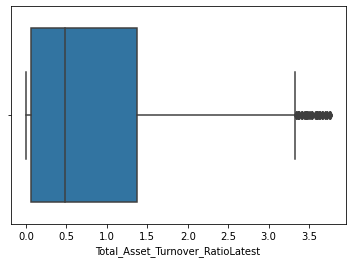

No of Missing Values in the column 726
Description of Interest_Cover_RatioLatest
--------------------------------------------------------------------------------------
count    2860.000000
mean        1.245580
std         2.218447
min        -5.500000
25%         0.000000
50%         0.535000
75%         2.100000
max         9.250000
Name: Interest_Cover_RatioLatest, dtype: float64Description of Interest_Cover_RatioLatest
--------------------------------------------------------------------------------------


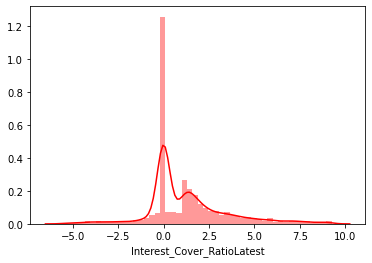

Boxplot of Interest_Cover_RatioLatest
--------------------------------------------------------------------------------------


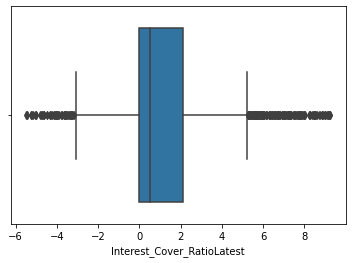

No of Missing Values in the column 596
Description of PBIDTM_percLatest
--------------------------------------------------------------------------------------
count    2990.000000
mean        9.679080
std        12.008003
min       -28.260000
25%         1.140000
50%         7.815000
75%        15.785000
max        46.980000
Name: PBIDTM_percLatest, dtype: float64Description of PBIDTM_percLatest
--------------------------------------------------------------------------------------


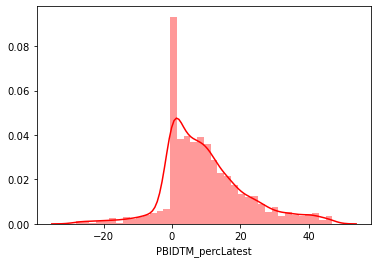

Boxplot of PBIDTM_percLatest
--------------------------------------------------------------------------------------


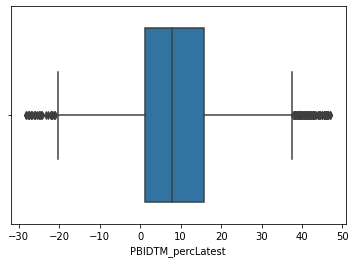

No of Missing Values in the column 718
Description of PBITM_percLatest
--------------------------------------------------------------------------------------
count    2868.000000
mean        6.743640
std         9.359168
min       -21.430000
25%         0.197500
50%         5.005000
75%        11.432500
max        35.560000
Name: PBITM_percLatest, dtype: float64Description of PBITM_percLatest
--------------------------------------------------------------------------------------


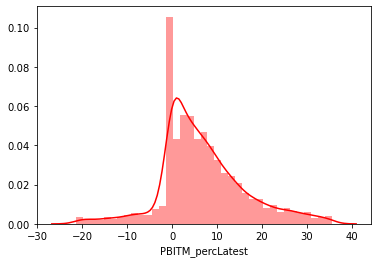

Boxplot of PBITM_percLatest
--------------------------------------------------------------------------------------


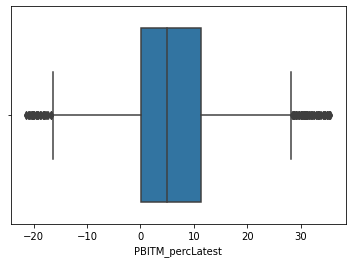

No of Missing Values in the column 696
Description of PBDTM_percLatest
--------------------------------------------------------------------------------------
count    2890.000000
mean        6.760945
std         9.586718
min       -21.010000
25%         0.040000
50%         4.765000
75%        11.827500
max        35.260000
Name: PBDTM_percLatest, dtype: float64Description of PBDTM_percLatest
--------------------------------------------------------------------------------------


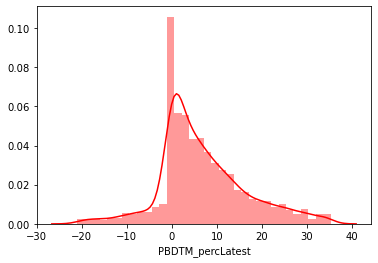

Boxplot of PBDTM_percLatest
--------------------------------------------------------------------------------------


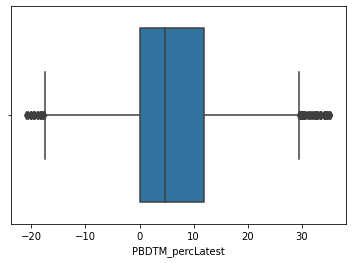

No of Missing Values in the column 721
Description of CPM_percLatest
--------------------------------------------------------------------------------------
count    2865.000000
mean        5.513714
std         7.667066
min       -17.070000
25%         0.070000
50%         4.010000
75%         9.550000
max        28.010000
Name: CPM_percLatest, dtype: float64Description of CPM_percLatest
--------------------------------------------------------------------------------------


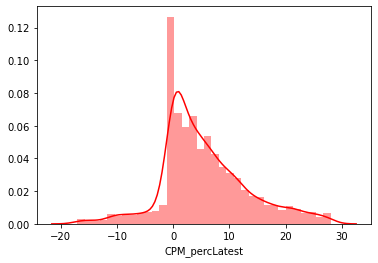

Boxplot of CPM_percLatest
--------------------------------------------------------------------------------------


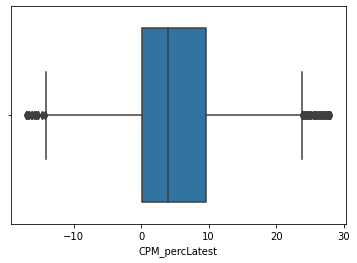

No of Missing Values in the column 934
Description of APATM_percLatest
--------------------------------------------------------------------------------------
count    2652.000000
mean        3.119811
std         5.143355
min       -11.110000
25%         0.000000
50%         1.815000
75%         5.682500
max        18.520000
Name: APATM_percLatest, dtype: float64Description of APATM_percLatest
--------------------------------------------------------------------------------------


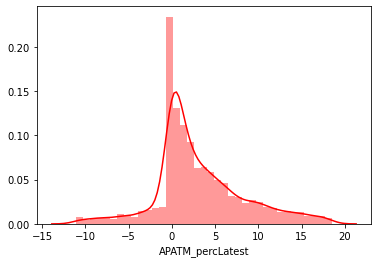

Boxplot of APATM_percLatest
--------------------------------------------------------------------------------------


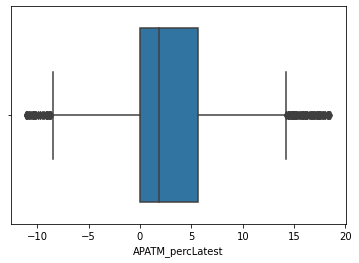

No of Missing Values in the column 398
Description of Debtors_Velocity_Days
--------------------------------------------------------------------------------------
count    3188.000000
mean       53.100376
std        55.694164
min         0.000000
25%         3.000000
50%        40.000000
75%        80.000000
max       253.000000
Name: Debtors_Velocity_Days, dtype: float64Description of Debtors_Velocity_Days
--------------------------------------------------------------------------------------


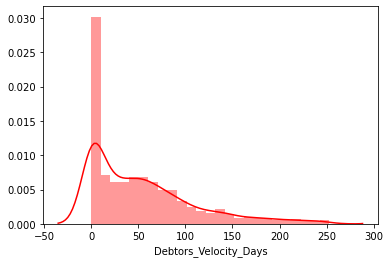

Boxplot of Debtors_Velocity_Days
--------------------------------------------------------------------------------------


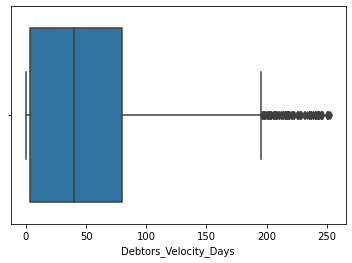

No of Missing Values in the column 391
Description of Creditors_Velocity_Days
--------------------------------------------------------------------------------------
count    3195.000000
mean       44.321440
std        46.905883
min         0.000000
25%         4.000000
50%        32.000000
75%        67.000000
max       210.000000
Name: Creditors_Velocity_Days, dtype: float64Description of Creditors_Velocity_Days
--------------------------------------------------------------------------------------


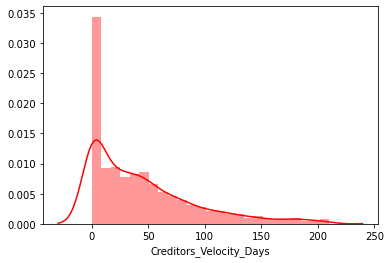

Boxplot of Creditors_Velocity_Days
--------------------------------------------------------------------------------------


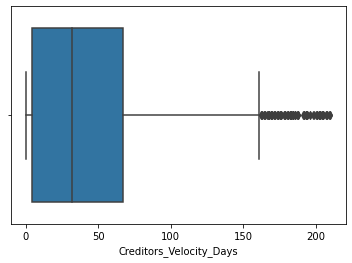

No of Missing Values in the column 365
Description of Inventory_Velocity_Days
--------------------------------------------------------------------------------------
count    3221.000000
mean       47.639863
std        56.177310
min         0.000000
25%         0.000000
50%        28.000000
75%        79.000000
max       240.000000
Name: Inventory_Velocity_Days, dtype: float64Description of Inventory_Velocity_Days
--------------------------------------------------------------------------------------


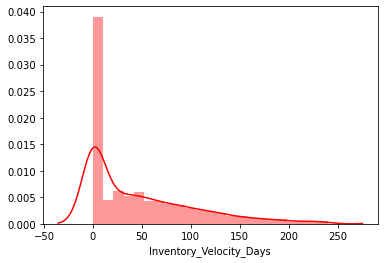

Boxplot of Inventory_Velocity_Days
--------------------------------------------------------------------------------------


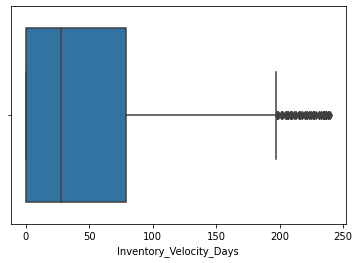

No of Missing Values in the column 150
Description of Value_of_Output_Total_Assets
--------------------------------------------------------------------------------------
count    3436.000000
mean        0.640774
std         0.657779
min        -0.330000
25%         0.060000
50%         0.420000
75%         1.080000
max         2.790000
Name: Value_of_Output_Total_Assets, dtype: float64Description of Value_of_Output_Total_Assets
--------------------------------------------------------------------------------------


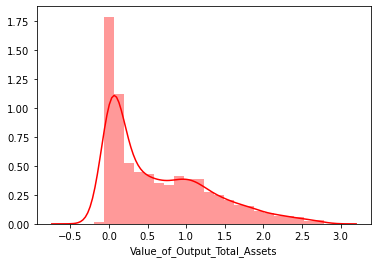

Boxplot of Value_of_Output_Total_Assets
--------------------------------------------------------------------------------------


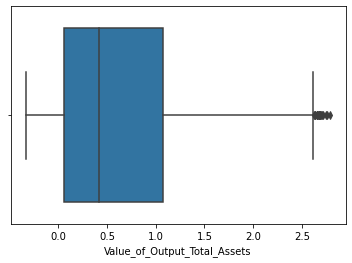

No of Missing Values in the column 481
Description of Value_of_Output_Gross_Block
--------------------------------------------------------------------------------------
count    3105.000000
mean        2.055662
std         2.545028
min        -5.500000
25%         0.130000
50%         1.150000
75%         2.900000
max        11.850000
Name: Value_of_Output_Gross_Block, dtype: float64Description of Value_of_Output_Gross_Block
--------------------------------------------------------------------------------------


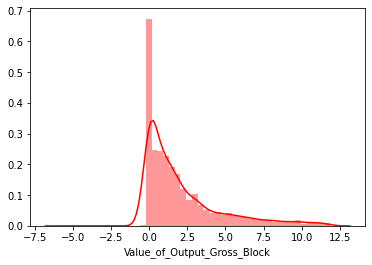

Boxplot of Value_of_Output_Gross_Block
--------------------------------------------------------------------------------------


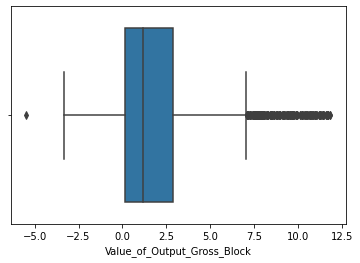

In [43]:
for x in df_x.columns:
    univariateanalysis(x,20)

In [44]:
df_x_analysis = df_x[['Networth', 'Capital_Employed','Total_Debt','Gross_Block','Total_Assets_Liabilities','Other_Income','Value_Of_Output','Cost_of_Prod','PBIDT',
 'PBIT','Book_Value_Unit_Curr','Book_Value_Adj_Unit_Curr','ROG_Net_Worth_perc','ROG_Capital_Employed_perc','Current_RatioLatest', 'Interest_Cover_RatioLatest',
'ROG_Cost_of_Prod_perc','Current_RatioLatest','PBIDTM_percLatest','APATM_percLatest','Value_of_Output_Total_Assets']]


    

No of Missing Values in the column 650
Description of Networth
--------------------------------------------------------------------------------------
count    2936.000000
mean       36.574261
std        61.799587
min      -162.010000
25%         3.190000
50%        12.315000
75%        45.722500
max       287.160000
Name: Networth, dtype: float64Description of Networth
--------------------------------------------------------------------------------------


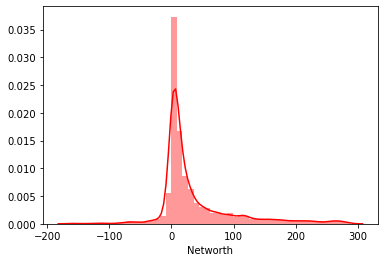

Boxplot of Networth
--------------------------------------------------------------------------------------


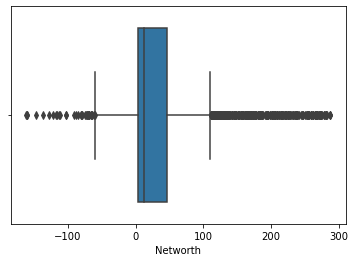

No of Missing Values in the column 596
Description of Capital_Employed
--------------------------------------------------------------------------------------
count    2990.000000
mean       73.699936
std       114.841448
min      -286.870000
25%         5.640000
50%        23.175000
75%        91.127500
max       551.450000
Name: Capital_Employed, dtype: float64Description of Capital_Employed
--------------------------------------------------------------------------------------


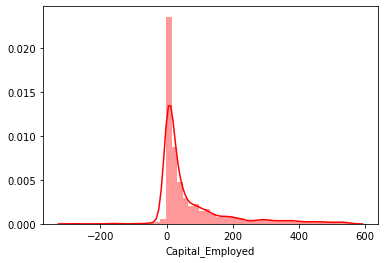

Boxplot of Capital_Employed
--------------------------------------------------------------------------------------


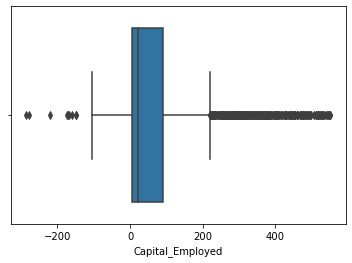

No of Missing Values in the column 583
Description of Total_Debt
--------------------------------------------------------------------------------------
count    3003.000000
mean       21.542761
std        37.828753
min        -0.720000
25%         0.000000
50%         2.970000
75%        24.480000
max       180.570000
Name: Total_Debt, dtype: float64Description of Total_Debt
--------------------------------------------------------------------------------------


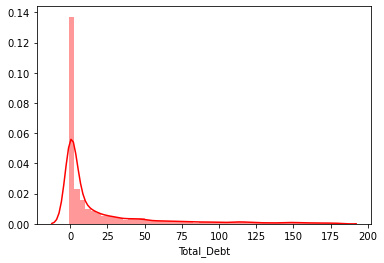

Boxplot of Total_Debt
--------------------------------------------------------------------------------------


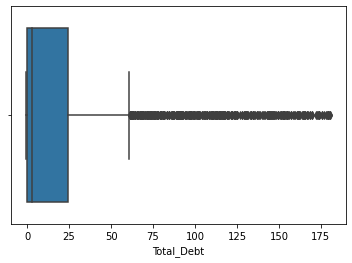

No of Missing Values in the column 540
Description of Gross_Block
--------------------------------------------------------------------------------------
count    3046.000000
mean       41.881668
std        69.966608
min       -41.190000
25%         0.250000
50%         7.905000
75%        48.692500
max       328.090000
Name: Gross_Block, dtype: float64Description of Gross_Block
--------------------------------------------------------------------------------------


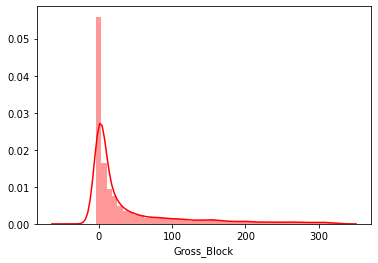

Boxplot of Gross_Block
--------------------------------------------------------------------------------------


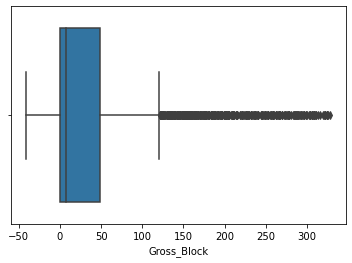

No of Missing Values in the column 574
Description of Total_Assets_Liabilities
--------------------------------------------------------------------------------------
count    3012.000000
mean      103.351959
std       156.445012
min        -4.510000
25%         7.920000
50%        31.540000
75%       126.977500
max       758.510000
Name: Total_Assets_Liabilities, dtype: float64Description of Total_Assets_Liabilities
--------------------------------------------------------------------------------------


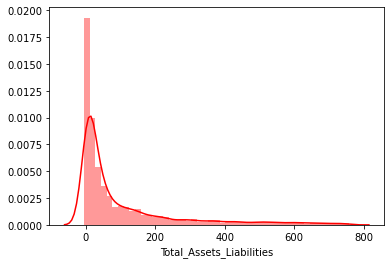

Boxplot of Total_Assets_Liabilities
--------------------------------------------------------------------------------------


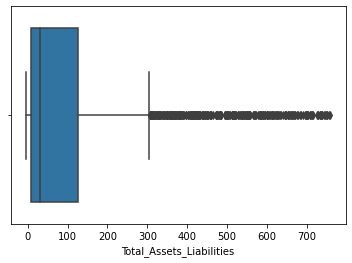

No of Missing Values in the column 603
Description of Other_Income
--------------------------------------------------------------------------------------
count    2983.000000
mean        1.100872
std         1.892025
min        -5.220000
25%         0.010000
50%         0.210000
75%         1.290000
max         9.050000
Name: Other_Income, dtype: float64Description of Other_Income
--------------------------------------------------------------------------------------


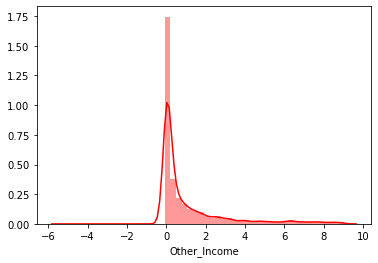

Boxplot of Other_Income
--------------------------------------------------------------------------------------


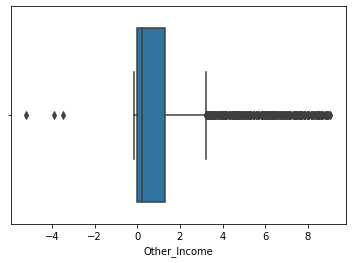

No of Missing Values in the column 559
Description of Value_Of_Output
--------------------------------------------------------------------------------------
count    3027.000000
mean       75.003314
std       123.579308
min      -119.100000
25%         0.760000
50%        14.640000
75%        93.295000
max       586.250000
Name: Value_Of_Output, dtype: float64Description of Value_Of_Output
--------------------------------------------------------------------------------------


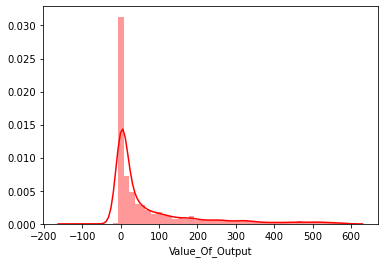

Boxplot of Value_Of_Output
--------------------------------------------------------------------------------------


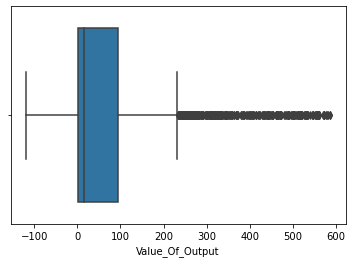

No of Missing Values in the column 560
Description of Cost_of_Prod
--------------------------------------------------------------------------------------
count    3026.000000
mean       60.218146
std        98.581559
min       -22.650000
25%         0.500000
50%        11.310000
75%        73.807500
max       471.550000
Name: Cost_of_Prod, dtype: float64Description of Cost_of_Prod
--------------------------------------------------------------------------------------


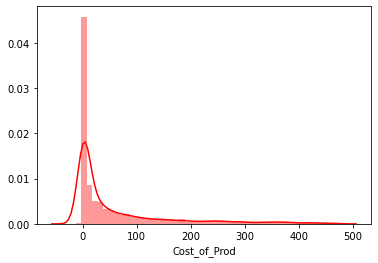

Boxplot of Cost_of_Prod
--------------------------------------------------------------------------------------


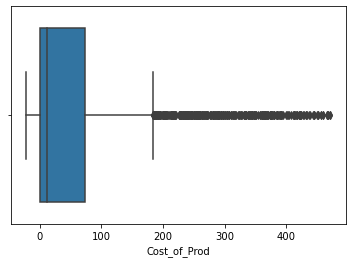

No of Missing Values in the column 671
Description of PBIDT
--------------------------------------------------------------------------------------
count    2915.000000
mean        6.056412
std        12.657863
min       -33.410000
25%         0.010000
50%         0.840000
75%         7.365000
max        58.590000
Name: PBIDT, dtype: float64Description of PBIDT
--------------------------------------------------------------------------------------


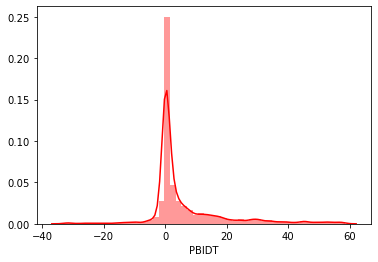

Boxplot of PBIDT
--------------------------------------------------------------------------------------


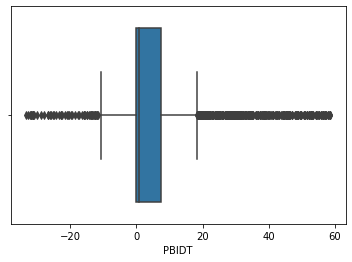

No of Missing Values in the column 720
Description of PBIT
--------------------------------------------------------------------------------------
count    2866.000000
mean        4.006410
std         9.203616
min       -24.840000
25%         0.000000
50%         0.490000
75%         5.042500
max        41.500000
Name: PBIT, dtype: float64Description of PBIT
--------------------------------------------------------------------------------------


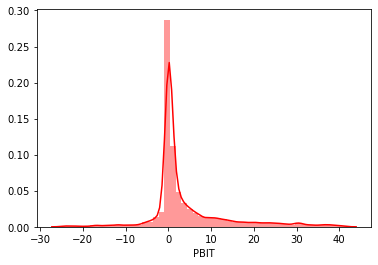

Boxplot of PBIT
--------------------------------------------------------------------------------------


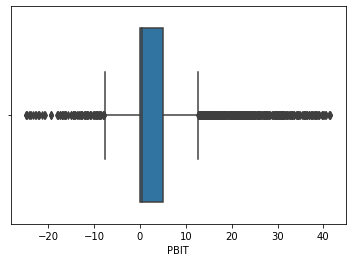

No of Missing Values in the column 485
Description of Book_Value_Unit_Curr
--------------------------------------------------------------------------------------
count    3101.000000
mean       30.853796
std        39.900465
min       -87.250000
25%         6.620000
50%        17.030000
75%        46.650000
max       167.060000
Name: Book_Value_Unit_Curr, dtype: float64Description of Book_Value_Unit_Curr
--------------------------------------------------------------------------------------


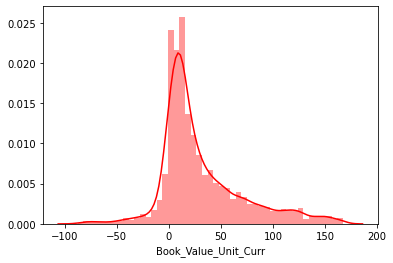

Boxplot of Book_Value_Unit_Curr
--------------------------------------------------------------------------------------


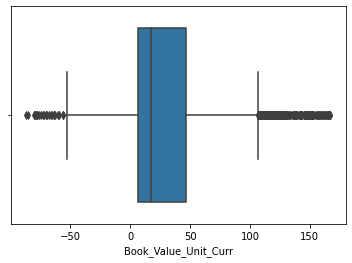

No of Missing Values in the column 490
Description of Book_Value_Adj_Unit_Curr
--------------------------------------------------------------------------------------
count    3096.000000
mean       26.777487
std        33.591131
min       -70.640000
25%         6.200000
50%        15.220000
75%        40.485000
max       138.790000
Name: Book_Value_Adj_Unit_Curr, dtype: float64Description of Book_Value_Adj_Unit_Curr
--------------------------------------------------------------------------------------


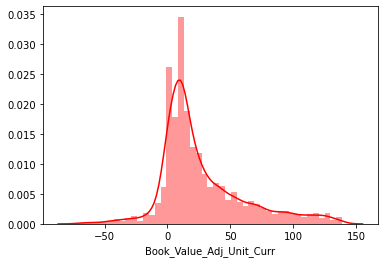

Boxplot of Book_Value_Adj_Unit_Curr
--------------------------------------------------------------------------------------


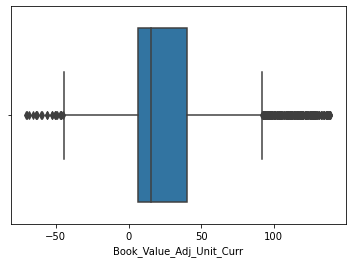

No of Missing Values in the column 747
Description of ROG_Net_Worth_perc
--------------------------------------------------------------------------------------
count    2839.000000
mean        3.701243
std         9.152914
min       -20.630000
25%        -0.205000
50%         1.760000
75%         8.240000
max        30.590000
Name: ROG_Net_Worth_perc, dtype: float64Description of ROG_Net_Worth_perc
--------------------------------------------------------------------------------------


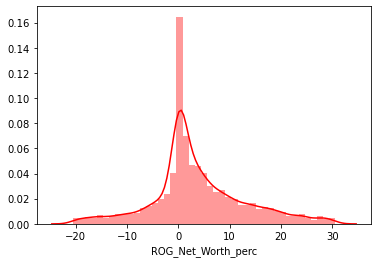

Boxplot of ROG_Net_Worth_perc
--------------------------------------------------------------------------------------


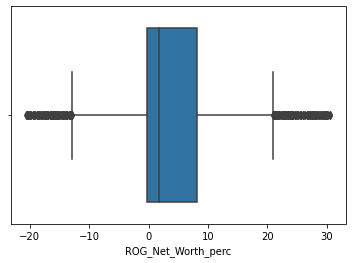

No of Missing Values in the column 572
Description of ROG_Capital_Employed_perc
--------------------------------------------------------------------------------------
count    3014.000000
mean        2.843457
std        11.548244
min       -28.440000
25%        -3.037500
50%         0.925000
75%         8.787500
max        37.140000
Name: ROG_Capital_Employed_perc, dtype: float64Description of ROG_Capital_Employed_perc
--------------------------------------------------------------------------------------


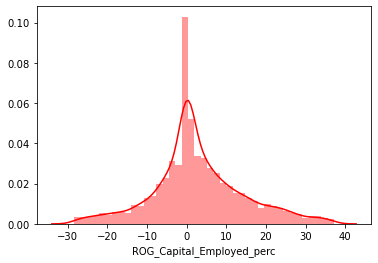

Boxplot of ROG_Capital_Employed_perc
--------------------------------------------------------------------------------------


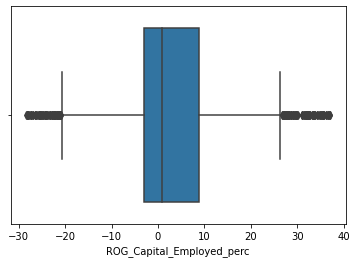

No of Missing Values in the column 566
Description of Current_RatioLatest
--------------------------------------------------------------------------------------
count    3020.000000
mean        1.425609
std         1.058620
min         0.000000
25%         0.790000
50%         1.200000
75%         1.780000
max         5.570000
Name: Current_RatioLatest, dtype: float64Description of Current_RatioLatest
--------------------------------------------------------------------------------------


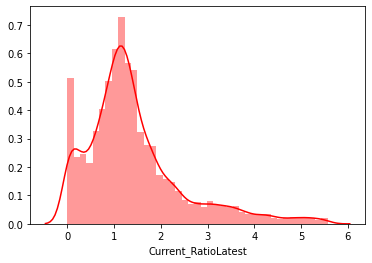

Boxplot of Current_RatioLatest
--------------------------------------------------------------------------------------


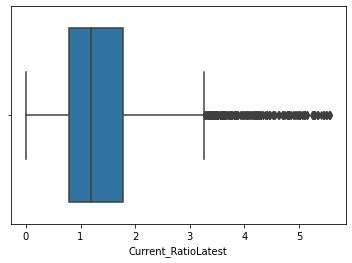

No of Missing Values in the column 726
Description of Interest_Cover_RatioLatest
--------------------------------------------------------------------------------------
count    2860.000000
mean        1.245580
std         2.218447
min        -5.500000
25%         0.000000
50%         0.535000
75%         2.100000
max         9.250000
Name: Interest_Cover_RatioLatest, dtype: float64Description of Interest_Cover_RatioLatest
--------------------------------------------------------------------------------------


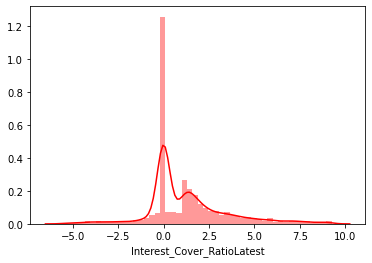

Boxplot of Interest_Cover_RatioLatest
--------------------------------------------------------------------------------------


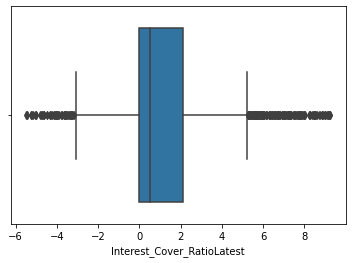

No of Missing Values in the column 675
Description of ROG_Cost_of_Prod_perc
--------------------------------------------------------------------------------------
count    2911.000000
mean        4.352061
std        21.935646
min       -52.600000
25%        -4.925000
50%         2.860000
75%        16.325000
max        68.400000
Name: ROG_Cost_of_Prod_perc, dtype: float64Description of ROG_Cost_of_Prod_perc
--------------------------------------------------------------------------------------


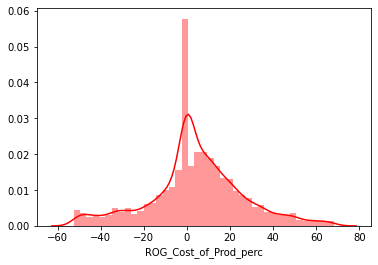

Boxplot of ROG_Cost_of_Prod_perc
--------------------------------------------------------------------------------------


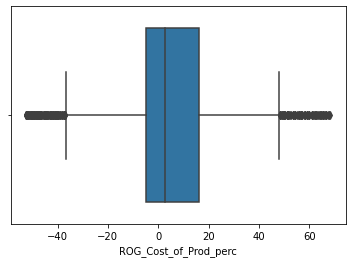

No of Missing Values in the column 566
Description of Current_RatioLatest
--------------------------------------------------------------------------------------
count    3020.000000
mean        1.425609
std         1.058620
min         0.000000
25%         0.790000
50%         1.200000
75%         1.780000
max         5.570000
Name: Current_RatioLatest, dtype: float64Description of Current_RatioLatest
--------------------------------------------------------------------------------------


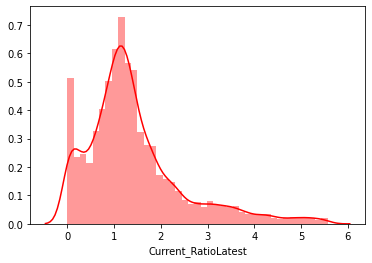

Boxplot of Current_RatioLatest
--------------------------------------------------------------------------------------


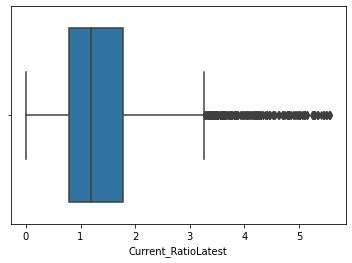

No of Missing Values in the column 596
Description of PBIDTM_percLatest
--------------------------------------------------------------------------------------
count    2990.000000
mean        9.679080
std        12.008003
min       -28.260000
25%         1.140000
50%         7.815000
75%        15.785000
max        46.980000
Name: PBIDTM_percLatest, dtype: float64Description of PBIDTM_percLatest
--------------------------------------------------------------------------------------


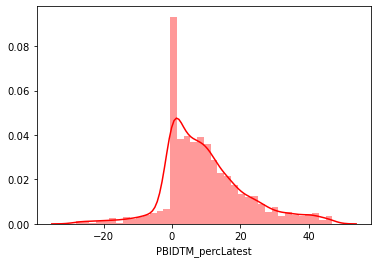

Boxplot of PBIDTM_percLatest
--------------------------------------------------------------------------------------


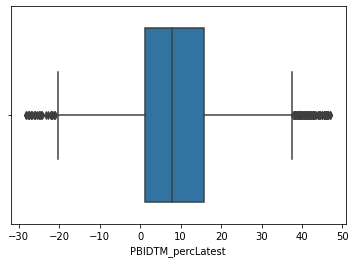

No of Missing Values in the column 934
Description of APATM_percLatest
--------------------------------------------------------------------------------------
count    2652.000000
mean        3.119811
std         5.143355
min       -11.110000
25%         0.000000
50%         1.815000
75%         5.682500
max        18.520000
Name: APATM_percLatest, dtype: float64Description of APATM_percLatest
--------------------------------------------------------------------------------------


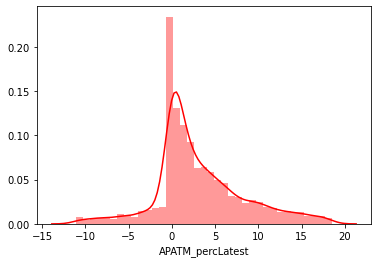

Boxplot of APATM_percLatest
--------------------------------------------------------------------------------------


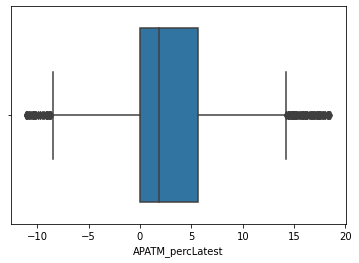

No of Missing Values in the column 150
Description of Value_of_Output_Total_Assets
--------------------------------------------------------------------------------------
count    3436.000000
mean        0.640774
std         0.657779
min        -0.330000
25%         0.060000
50%         0.420000
75%         1.080000
max         2.790000
Name: Value_of_Output_Total_Assets, dtype: float64Description of Value_of_Output_Total_Assets
--------------------------------------------------------------------------------------


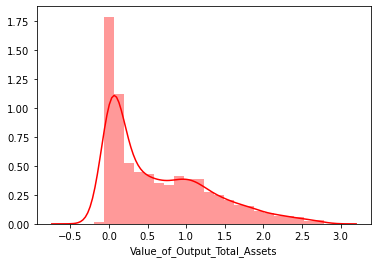

Boxplot of Value_of_Output_Total_Assets
--------------------------------------------------------------------------------------


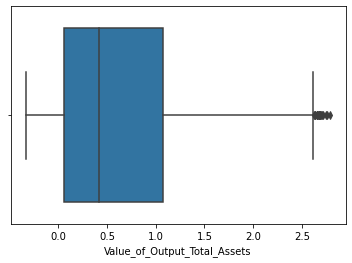

In [45]:
for x in df_x_analysis.columns:
    univariateanalysis(x,20)

In [46]:
def bivaranlysis (column,bins):

    plt.figure()
    print ('Boxplot of '+ column)
    print ('--------------------------------------------------------------------------------------')
    plt.subplot(1,2,1)
    sns.boxplot(df_x[column])
    plt.subplot(1,2,2)
    sns.boxplot(df_y)
    plt.show()
    


In [47]:
df_x_analysis.shape

(3586, 21)

In [48]:
df_y.shape

(3586,)

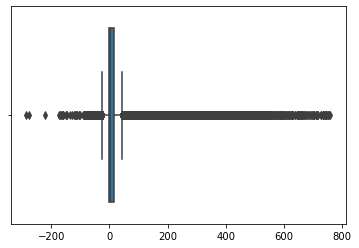

In [49]:
sns.boxplot(df_x_analysis)

Boxplot of Networth
--------------------------------------------------------------------------------------


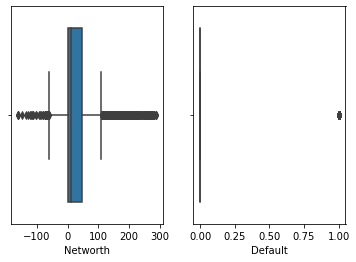

Boxplot of Capital_Employed
--------------------------------------------------------------------------------------


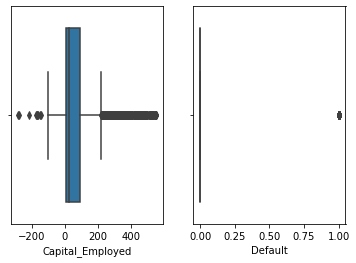

Boxplot of Total_Debt
--------------------------------------------------------------------------------------


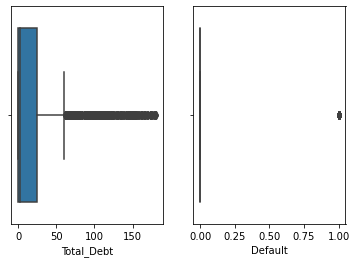

Boxplot of Gross_Block
--------------------------------------------------------------------------------------


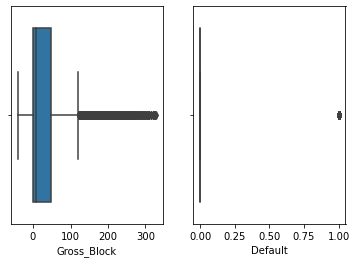

Boxplot of Total_Assets_Liabilities
--------------------------------------------------------------------------------------


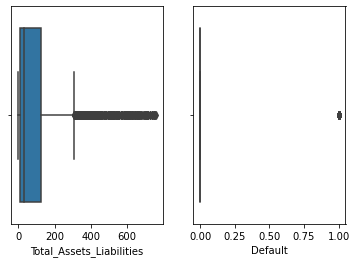

Boxplot of Other_Income
--------------------------------------------------------------------------------------


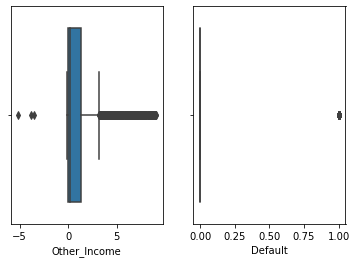

Boxplot of Value_Of_Output
--------------------------------------------------------------------------------------


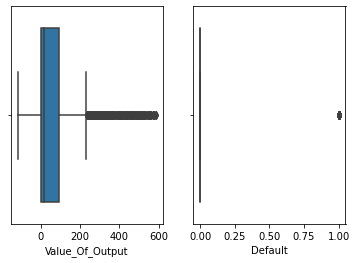

Boxplot of Cost_of_Prod
--------------------------------------------------------------------------------------


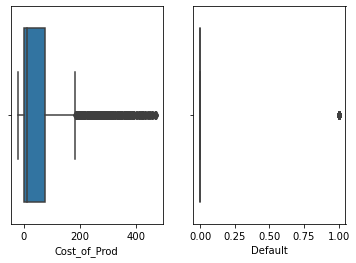

Boxplot of PBIDT
--------------------------------------------------------------------------------------


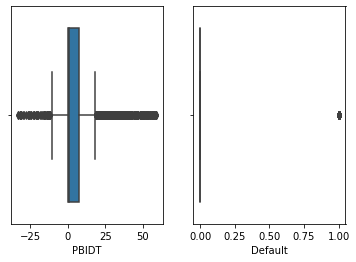

Boxplot of PBIT
--------------------------------------------------------------------------------------


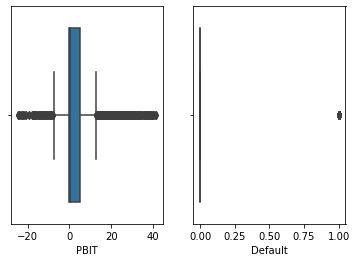

Boxplot of Book_Value_Unit_Curr
--------------------------------------------------------------------------------------


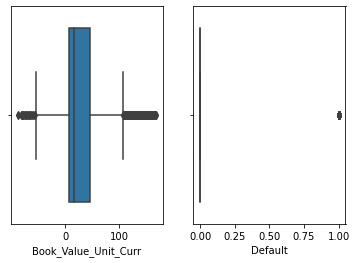

Boxplot of Book_Value_Adj_Unit_Curr
--------------------------------------------------------------------------------------


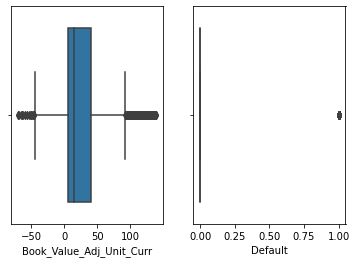

Boxplot of ROG_Net_Worth_perc
--------------------------------------------------------------------------------------


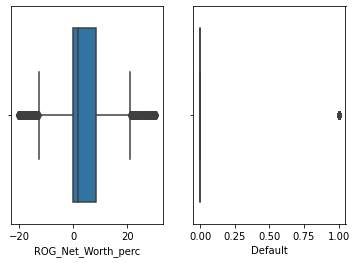

Boxplot of ROG_Capital_Employed_perc
--------------------------------------------------------------------------------------


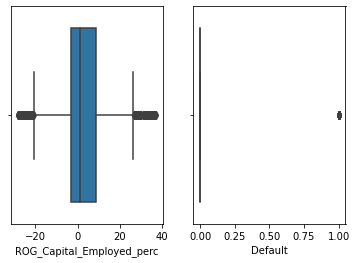

Boxplot of Current_RatioLatest
--------------------------------------------------------------------------------------


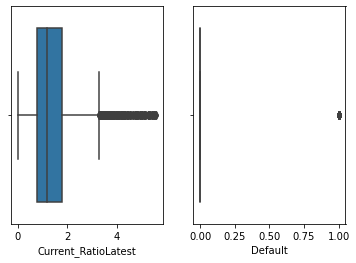

Boxplot of Interest_Cover_RatioLatest
--------------------------------------------------------------------------------------


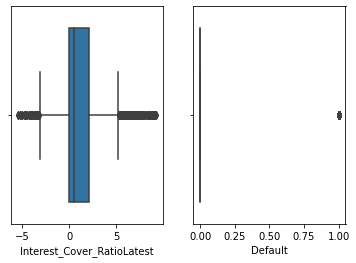

Boxplot of ROG_Cost_of_Prod_perc
--------------------------------------------------------------------------------------


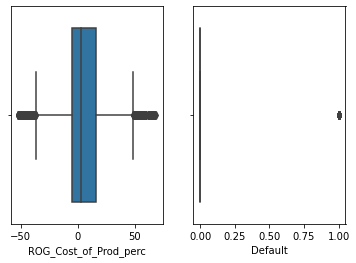

Boxplot of Current_RatioLatest
--------------------------------------------------------------------------------------


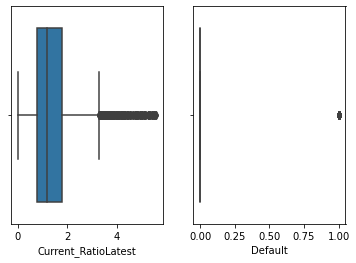

Boxplot of PBIDTM_percLatest
--------------------------------------------------------------------------------------


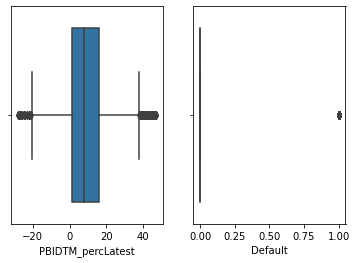

Boxplot of APATM_percLatest
--------------------------------------------------------------------------------------


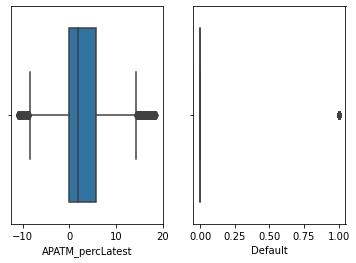

Boxplot of Value_of_Output_Total_Assets
--------------------------------------------------------------------------------------


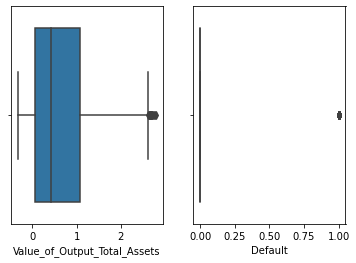

In [50]:
for x in df_x_analysis.columns:
    bivaranlysis(x,20)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
predictor = pd.DataFrame(scaler.fit_transform(df_x), columns= df_x.columns)

In [52]:
response=df_y.copy()

In [53]:
df_new = pd.concat([predictor,response], axis=1)

In [54]:
from sklearn.impute import KNNImputer

In [55]:
imputer = KNNImputer(n_neighbors=10)

In [56]:
df_imputed= pd.DataFrame(imputer.fit_transform(df_new), columns= df_new.columns)

In [57]:
df_imputed.isnull().sum()

Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Current_Assets                         0
Current_Liabilities_and_Provisions     0
Total_Assets_Liabilities               0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Prod                           0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Rev_earn_in_forex                      0
Rev_expenses_in_forex                  0
Book_Value_Unit_

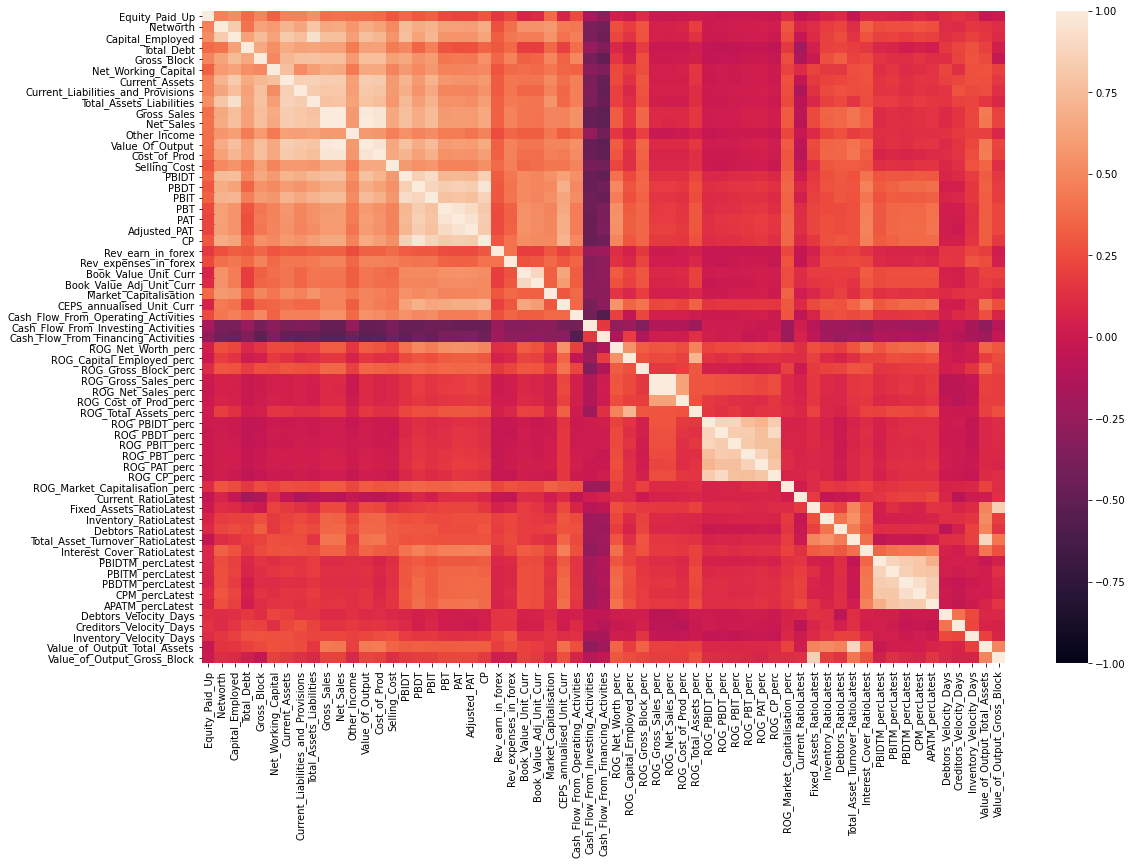

In [58]:
plt.figure(figsize= (18,12))
cor_mat= df_imputed.drop('Default', axis=1).corr()
sns.heatmap(cor_mat, vmin=-1,vmax=1, )

In [59]:
df_imputed.shape

(3586, 62)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [61]:
x = df_imputed.drop('Default', axis=1)
y= df_imputed['Default']

In [62]:
correlation = x.corr()

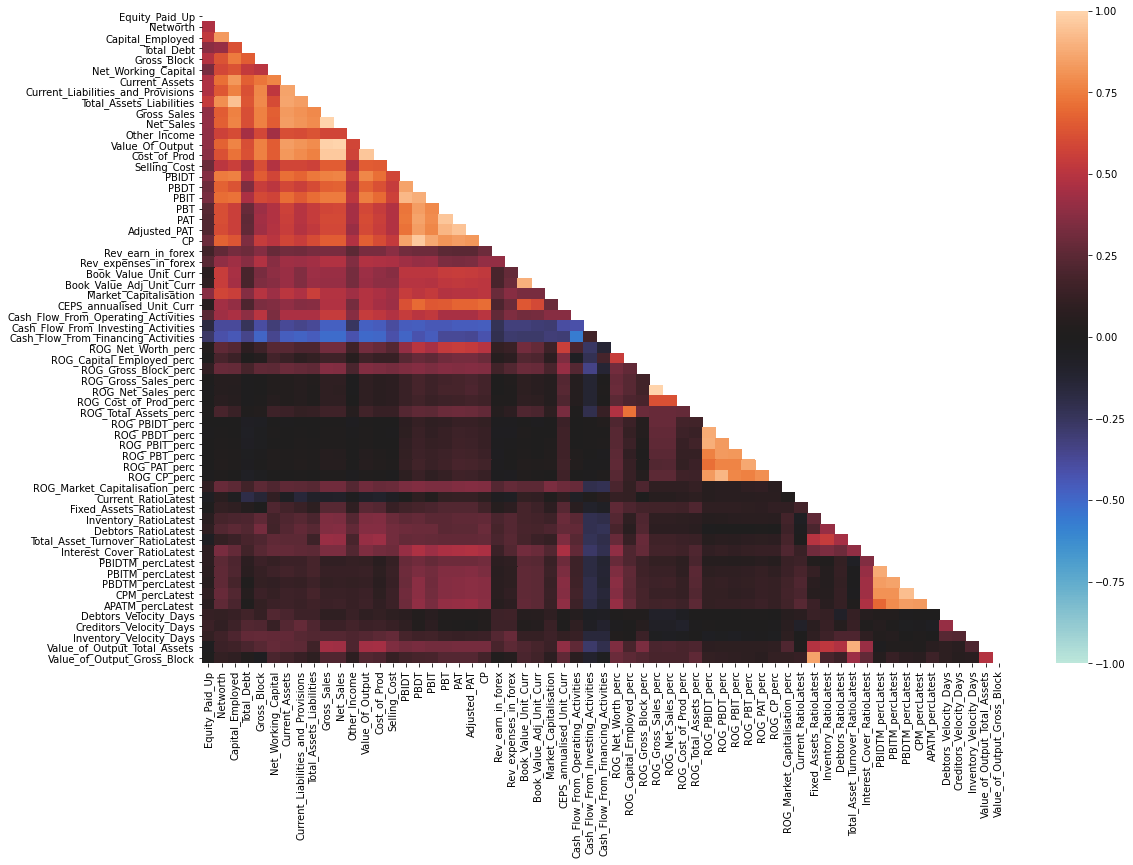

In [63]:
plt.figure(figsize= (18,12))

mask=np.triu(correlation)
sns.heatmap(correlation, vmin=-1,vmax=1, fmt='.1g', center=0, mask=mask)

In [64]:
LoGR= LogisticRegression()

In [65]:
x.shape

(3586, 61)

In [66]:
selector = RFE (estimator= LoGR, n_features_to_select= 20, step=1 )

In [67]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=.33, random_state=42)

In [68]:
selector= selector.fit(x_train,y_train)

In [69]:
selector.ranking_

array([32,  1,  1,  1,  1,  6,  5,  1,  1, 20, 31, 16,  1,  1, 17,  1,  1,
        1,  8, 15, 14,  1, 42, 11,  1,  1, 10, 40, 38,  9, 19,  1,  1, 36,
       35, 41,  4, 18, 37, 34, 27, 33, 26, 39, 30,  1,  7, 21, 29,  2,  1,
       25,  1, 23, 24,  1, 22, 13, 12,  3, 28])

In [70]:
ranked_col = pd.DataFrame({'Feature':x.columns, 'Rank':selector.ranking_ })
ranked_col[ranked_col['Rank']==1]

Feature  Rank
1                             Networth     1
2                     Capital_Employed     1
3                           Total_Debt     1
4                          Gross_Block     1
7   Current_Liabilities_and_Provisions     1
8             Total_Assets_Liabilities     1
12                     Value_Of_Output     1
13                        Cost_of_Prod     1
15                               PBIDT     1
16                                PBDT     1
17                                PBIT     1
21                                  CP     1
24                Book_Value_Unit_Curr     1
25            Book_Value_Adj_Unit_Curr     1
31                  ROG_Net_Worth_perc     1
32           ROG_Capital_Employed_perc     1
45                 Current_RatioLatest     1
50          Interest_Cover_RatioLatest     1
52                    PBITM_percLatest     1
55                    APATM_percLatest     1

In [71]:
pred_train= selector.predict(x_train)
pred_test = selector.predict(x_test)

In [72]:
print (confusion_matrix(y_train, pred_train))

[[2137   20]
 [  99  146]]


In [73]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.88      0.60      0.71       245

    accuracy                           0.95      2402
   macro avg       0.92      0.79      0.84      2402
weighted avg       0.95      0.95      0.95      2402



In [74]:
print(confusion_matrix(y_test, pred_test))

[[1026   16]
 [  45   97]]


In [75]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1042
         1.0       0.86      0.68      0.76       142

    accuracy                           0.95      1184
   macro avg       0.91      0.83      0.87      1184
weighted avg       0.95      0.95      0.95      1184



In [76]:
d_dict

#                           Field Name  \
0    1                              Co_Code   
1    2                              Co_Name   
2    3                   Networth Next Year   
3    4                       Equity Paid Up   
4    5                             Networth   
5    6                     Capital Employed   
6    7                           Total Debt   
7    8                         Gross Block    
8    9                 Net Working Capital    
9   10                      Current Assets    
10  11  Current Liabilities and Provisions    
11  12            Total Assets/Liabilities    
12  13                          Gross Sales   
13  14                            Net Sales   
14  15                         Other Income   
15  16                      Value Of Output   
16  17                   Cost of Production   
17  18                         Selling Cost   
18  19                                PBIDT   
19  20                                 PBDT   
20  21                                 PBIT   
21  22                                  PBT   
22  23                                  PAT   
23  24                         Adjusted PAT   
24  26                                   CP   
25  27            Revenue earnings in forex   
26  28            Revenue expenses in forex   
27  29            Capital expenses in forex   
28  30               Book Value (Unit Curr)   
29  31        Book Value (Adj.) (Unit Curr)   
30  32                Market Capitalisation   
31  33        CEPS (annualised) (Unit Curr)   
32  34  Cash Flow From Operating Activities   
33  35  Cash Flow From Investing Activities   
34  36  Cash Flow From Financing Activities   
35  37                    ROG-Net Worth (%)   
36  38             ROG-Capital Employed (%)   
37  39                  ROG-Gross Block (%)   
38  40                  ROG-Gross Sales (%)   
39  41                    ROG-Net Sales (%)   
40  42           ROG-Cost of Production (%)   
41  43                 ROG-Total Assets (%)   
42  44                        ROG-PBIDT (%)   
43  45                         ROG-PBDT (%)   
44  46                         ROG-PBIT (%)   
45  47                          ROG-PBT (%)   
46  48                          ROG-PAT (%)   
47  49                           ROG-CP (%)   
48  50    ROG-Revenue earnings in forex (%)   
49  51    ROG-Revenue expenses in forex (%)   
50  52        ROG-Market Capitalisation (%)   
51  53                Current Ratio[Latest]   
52  54           Fixed Assets Ratio[Latest]   
53  55              Inventory Ratio[Latest]   
54  56                Debtors Ratio[Latest]   
55  57   Total Asset Turnover Ratio[Latest]   
56  58         Interest Cover Ratio[Latest]   
57  59                   PBIDTM (%)[Latest]   
58  60                    PBITM (%)[Latest]   
59  61                    PBDTM (%)[Latest]   
60  62                      CPM (%)[Latest]   
61  63                    APATM (%)[Latest]   
62  64              Debtors Velocity (Days)   
63  65            Creditors Velocity (Days)   
64  66            Inventory Velocity (Days)   
65  67         Value of Output/Total Assets   
66  68          Value of Output/Gross Block   

                                          Description  \
0                                        Company Code   
1                                        Company Name   
2   Value of a company as on 2016 - Next Year(diff...   
3   Amount that has been received by the company t...   
4        Value of a company as on 2015 - Current Year   
5   Total amount of capital used for the acquisiti...   
6   The sum of money borrowed by the company and i...   
7   Total value of all of the assets that a compan...   
8   The difference between a company's current ass...   
9   All the assets of a company that are expected ...   
10  Short-term financial obligations that are due ...   
11  Ratio of total assets to liabailities of the c...   
12  The grand total of sale transactions within th...   
13  Gross 

In [77]:
selector1 = RFE (estimator= LoGR, n_features_to_select= 30, step=1 )

In [78]:
selector1= selector1.fit(x_train,y_train)

In [79]:
selector1.ranking_

array([22,  1,  1,  1,  1,  1,  1,  1,  1, 10, 21,  6,  1,  1,  7,  1,  1,
        1,  1,  5,  4,  1, 32,  1,  1,  1,  1, 30, 28,  1,  9,  1,  1, 26,
       25, 31,  1,  8, 27, 24, 17, 23, 16, 29, 20,  1,  1, 11, 19,  1,  1,
       15,  1, 13, 14,  1, 12,  3,  2,  1, 18])

In [80]:
ranked_col1 = pd.DataFrame({'Feature':x.columns, 'Rank':selector1.ranking_ })
ranked_col1[ranked_col1['Rank']==1]

Feature  Rank
1                              Networth     1
2                      Capital_Employed     1
3                            Total_Debt     1
4                           Gross_Block     1
5                   Net_Working_Capital     1
6                        Current_Assets     1
7    Current_Liabilities_and_Provisions     1
8              Total_Assets_Liabilities     1
12                      Value_Of_Output     1
13                         Cost_of_Prod     1
15                                PBIDT     1
16                                 PBDT     1
17                                 PBIT     1
18                                  PBT     1
21                                   CP     1
23                Rev_expenses_in_forex     1
24                 Book_Value_Unit_Curr     1
25             Book_Value_Adj_Unit_Curr     1
26                Market_Capitalisation     1
29  Cash_Flow_From_Investing_Activities     1
31                   ROG_Net_Worth_perc     1
32            ROG_Capital_Employed_perc     1
36                ROG_Cost_of_Prod_perc     1
45                  Current_RatioLatest     1
46             Fixed_Assets_RatioLatest     1
49     Total_Asset_Turnover_RatioLatest     1
50           Interest_Cover_RatioLatest     1
52                     PBITM_percLatest     1
55                     APATM_percLatest     1
59         Value_of_Output_Total_Assets     1

In [81]:
pred_train1= selector1.predict(x_train)
pred_test1 = selector1.predict(x_test)

In [82]:
print (confusion_matrix(y_train, pred_train1))

[[2139   18]
 [  88  157]]


In [83]:
print(classification_report(y_train, pred_train1))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2157
         1.0       0.90      0.64      0.75       245

    accuracy                           0.96      2402
   macro avg       0.93      0.82      0.86      2402
weighted avg       0.95      0.96      0.95      2402



In [84]:
print(confusion_matrix(y_test, pred_test1))

[[1024   18]
 [  44   98]]


In [85]:
print(classification_report(y_test, pred_test1))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1042
         1.0       0.84      0.69      0.76       142

    accuracy                           0.95      1184
   macro avg       0.90      0.84      0.87      1184
weighted avg       0.95      0.95      0.95      1184



In [86]:
import statsmodels.formula.api as sm

In [87]:
d_train =pd.concat([x_train, y_train], axis=1)
d_test = pd.concat([x_test,y_test], axis=1)

In [88]:
d_train['Default'].value_counts()

0.0    2157
1.0     245
Name: Default, dtype: int64

No of Missing Values in the column 448
Description of Equity_Paid_Up
--------------------------------------------------------------------------------------
count    3138.000000
mean        9.829579
std         9.226749
min         0.000000
25%         3.282500
50%         6.600000
75%        13.395000
max        43.110000
Name: Equity_Paid_Up, dtype: float64Description of Equity_Paid_Up
--------------------------------------------------------------------------------------


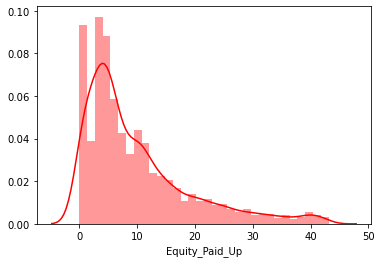

Boxplot of Equity_Paid_Up
--------------------------------------------------------------------------------------


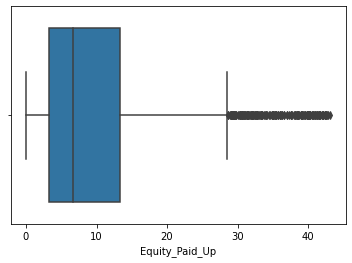

No of Missing Values in the column 650
Description of Networth
--------------------------------------------------------------------------------------
count    2936.000000
mean       36.574261
std        61.799587
min      -162.010000
25%         3.190000
50%        12.315000
75%        45.722500
max       287.160000
Name: Networth, dtype: float64Description of Networth
--------------------------------------------------------------------------------------


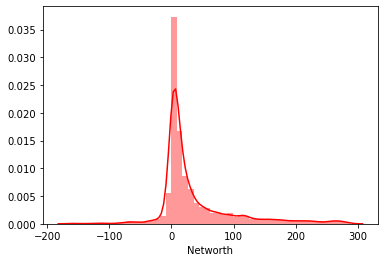

Boxplot of Networth
--------------------------------------------------------------------------------------


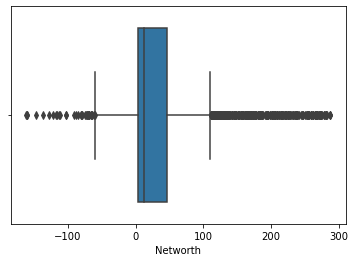

No of Missing Values in the column 596
Description of Capital_Employed
--------------------------------------------------------------------------------------
count    2990.000000
mean       73.699936
std       114.841448
min      -286.870000
25%         5.640000
50%        23.175000
75%        91.127500
max       551.450000
Name: Capital_Employed, dtype: float64Description of Capital_Employed
--------------------------------------------------------------------------------------


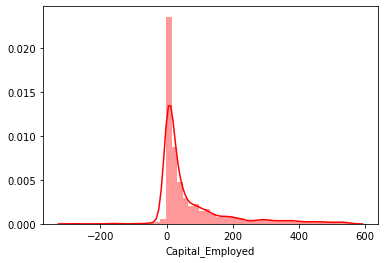

Boxplot of Capital_Employed
--------------------------------------------------------------------------------------


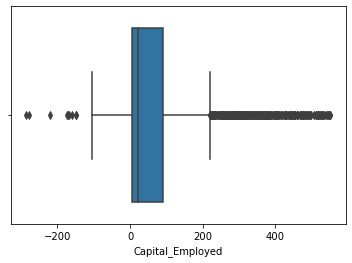

No of Missing Values in the column 583
Description of Total_Debt
--------------------------------------------------------------------------------------
count    3003.000000
mean       21.542761
std        37.828753
min        -0.720000
25%         0.000000
50%         2.970000
75%        24.480000
max       180.570000
Name: Total_Debt, dtype: float64Description of Total_Debt
--------------------------------------------------------------------------------------


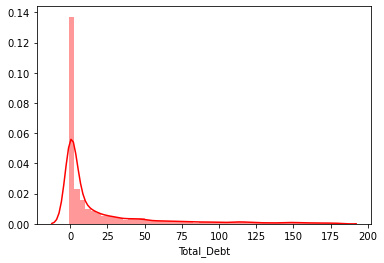

Boxplot of Total_Debt
--------------------------------------------------------------------------------------


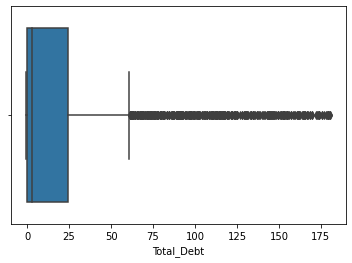

No of Missing Values in the column 540
Description of Gross_Block
--------------------------------------------------------------------------------------
count    3046.000000
mean       41.881668
std        69.966608
min       -41.190000
25%         0.250000
50%         7.905000
75%        48.692500
max       328.090000
Name: Gross_Block, dtype: float64Description of Gross_Block
--------------------------------------------------------------------------------------


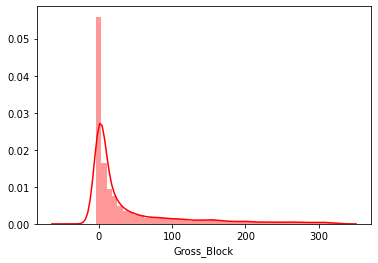

Boxplot of Gross_Block
--------------------------------------------------------------------------------------


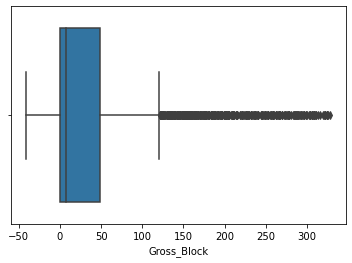

No of Missing Values in the column 625
Description of Net_Working_Capital
--------------------------------------------------------------------------------------
count    2961.000000
mean       19.907791
std        33.424293
min       -89.250000
25%         0.570000
50%         6.470000
75%        27.420000
max       148.750000
Name: Net_Working_Capital, dtype: float64Description of Net_Working_Capital
--------------------------------------------------------------------------------------


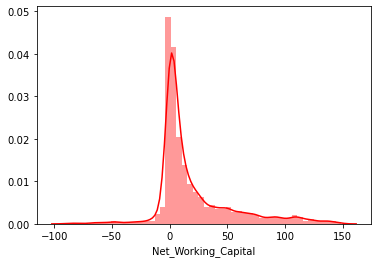

Boxplot of Net_Working_Capital
--------------------------------------------------------------------------------------


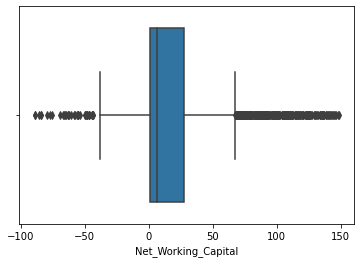

No of Missing Values in the column 577
Description of Current_Assets
--------------------------------------------------------------------------------------
count    3009.000000
mean       45.185364
std        67.122258
min        -0.910000
25%         2.760000
50%        14.710000
75%        57.670000
max       332.190000
Name: Current_Assets, dtype: float64Description of Current_Assets
--------------------------------------------------------------------------------------


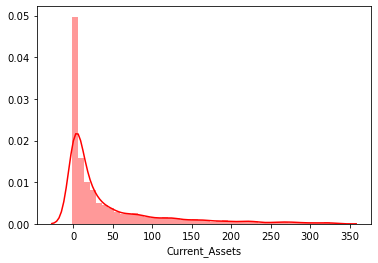

Boxplot of Current_Assets
--------------------------------------------------------------------------------------


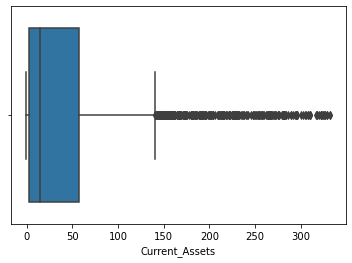

No of Missing Values in the column 581
Description of Current_Liabilities_and_Provisions
--------------------------------------------------------------------------------------
count    3005.000000
mean       20.412323
std        33.566136
min        -0.230000
25%         0.360000
50%         4.670000
75%        23.500000
max       162.470000
Name: Current_Liabilities_and_Provisions, dtype: float64Description of Current_Liabilities_and_Provisions
--------------------------------------------------------------------------------------


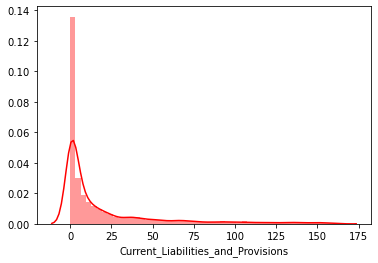

Boxplot of Current_Liabilities_and_Provisions
--------------------------------------------------------------------------------------


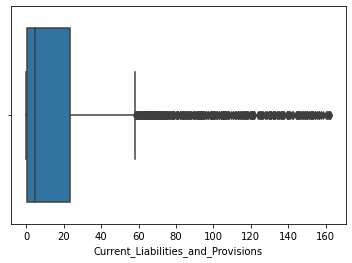

No of Missing Values in the column 574
Description of Total_Assets_Liabilities
--------------------------------------------------------------------------------------
count    3012.000000
mean      103.351959
std       156.445012
min        -4.510000
25%         7.920000
50%        31.540000
75%       126.977500
max       758.510000
Name: Total_Assets_Liabilities, dtype: float64Description of Total_Assets_Liabilities
--------------------------------------------------------------------------------------


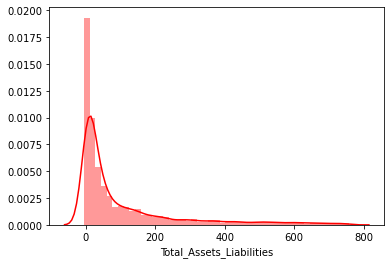

Boxplot of Total_Assets_Liabilities
--------------------------------------------------------------------------------------


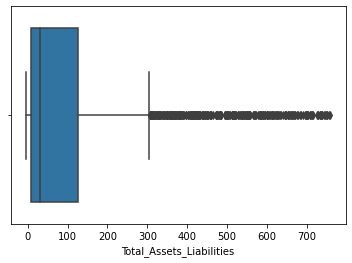

No of Missing Values in the column 554
Description of Gross_Sales
--------------------------------------------------------------------------------------
count    3032.000000
mean       78.393654
std       129.887081
min       -62.590000
25%         0.740000
50%        15.070000
75%        97.277500
max       602.560000
Name: Gross_Sales, dtype: float64Description of Gross_Sales
--------------------------------------------------------------------------------------


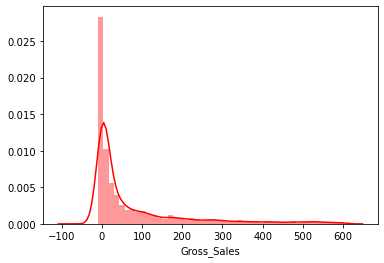

Boxplot of Gross_Sales
--------------------------------------------------------------------------------------


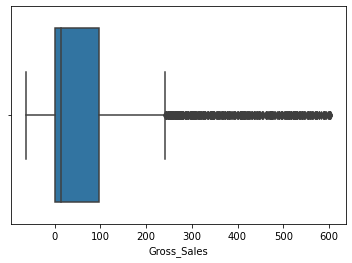

No of Missing Values in the column 556
Description of Net_Sales
--------------------------------------------------------------------------------------
count    3030.000000
mean       75.250442
std       124.277811
min       -62.590000
25%         0.732500
50%        14.785000
75%        92.572500
max       581.830000
Name: Net_Sales, dtype: float64Description of Net_Sales
--------------------------------------------------------------------------------------


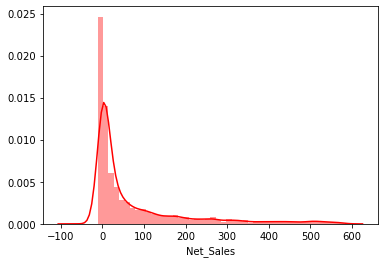

Boxplot of Net_Sales
--------------------------------------------------------------------------------------


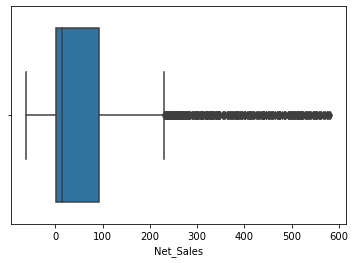

No of Missing Values in the column 603
Description of Other_Income
--------------------------------------------------------------------------------------
count    2983.000000
mean        1.100872
std         1.892025
min        -5.220000
25%         0.010000
50%         0.210000
75%         1.290000
max         9.050000
Name: Other_Income, dtype: float64Description of Other_Income
--------------------------------------------------------------------------------------


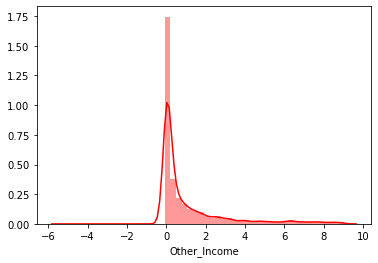

Boxplot of Other_Income
--------------------------------------------------------------------------------------


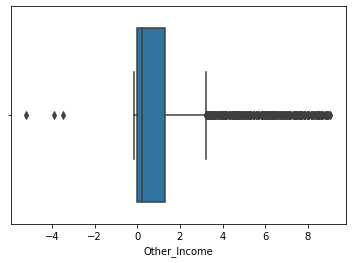

No of Missing Values in the column 559
Description of Value_Of_Output
--------------------------------------------------------------------------------------
count    3027.000000
mean       75.003314
std       123.579308
min      -119.100000
25%         0.760000
50%        14.640000
75%        93.295000
max       586.250000
Name: Value_Of_Output, dtype: float64Description of Value_Of_Output
--------------------------------------------------------------------------------------


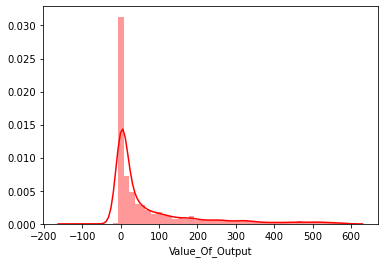

Boxplot of Value_Of_Output
--------------------------------------------------------------------------------------


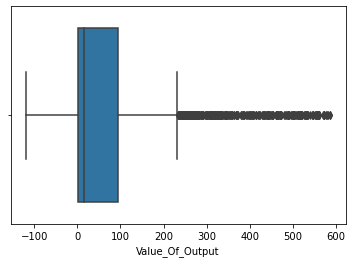

No of Missing Values in the column 560
Description of Cost_of_Prod
--------------------------------------------------------------------------------------
count    3026.000000
mean       60.218146
std        98.581559
min       -22.650000
25%         0.500000
50%        11.310000
75%        73.807500
max       471.550000
Name: Cost_of_Prod, dtype: float64Description of Cost_of_Prod
--------------------------------------------------------------------------------------


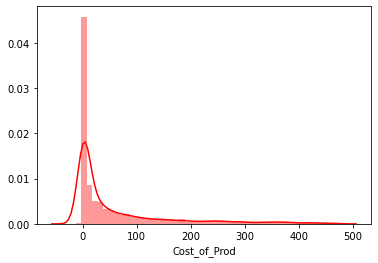

Boxplot of Cost_of_Prod
--------------------------------------------------------------------------------------


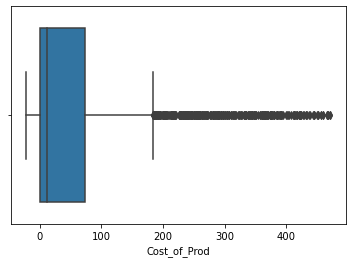

No of Missing Values in the column 605
Description of Selling_Cost
--------------------------------------------------------------------------------------
count    2981.000000
mean        1.011198
std         1.973407
min         0.000000
25%         0.000000
50%         0.050000
75%         0.920000
max         9.700000
Name: Selling_Cost, dtype: float64Description of Selling_Cost
--------------------------------------------------------------------------------------


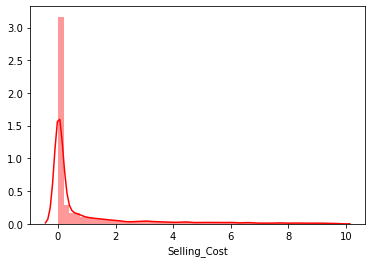

Boxplot of Selling_Cost
--------------------------------------------------------------------------------------


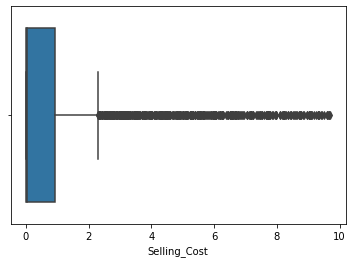

No of Missing Values in the column 671
Description of PBIDT
--------------------------------------------------------------------------------------
count    2915.000000
mean        6.056412
std        12.657863
min       -33.410000
25%         0.010000
50%         0.840000
75%         7.365000
max        58.590000
Name: PBIDT, dtype: float64Description of PBIDT
--------------------------------------------------------------------------------------


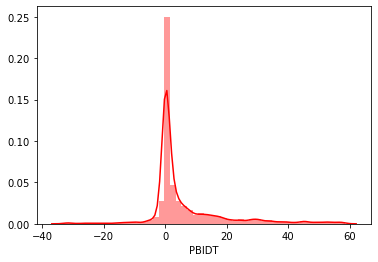

Boxplot of PBIDT
--------------------------------------------------------------------------------------


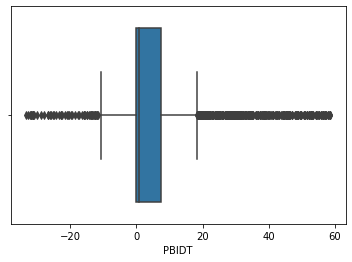

No of Missing Values in the column 815
Description of PBDT
--------------------------------------------------------------------------------------
count    2771.000000
mean        2.883930
std         7.204333
min       -18.800000
25%         0.000000
50%         0.380000
75%         3.365000
max        32.170000
Name: PBDT, dtype: float64Description of PBDT
--------------------------------------------------------------------------------------


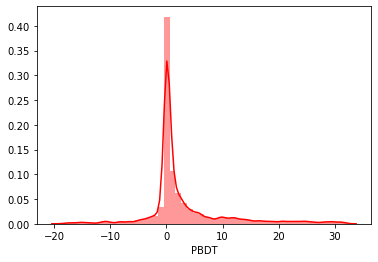

Boxplot of PBDT
--------------------------------------------------------------------------------------


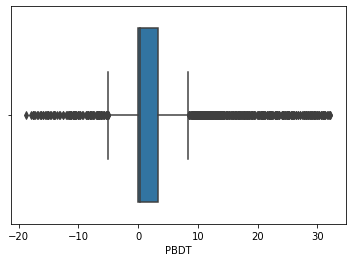

No of Missing Values in the column 720
Description of PBIT
--------------------------------------------------------------------------------------
count    2866.000000
mean        4.006410
std         9.203616
min       -24.840000
25%         0.000000
50%         0.490000
75%         5.042500
max        41.500000
Name: PBIT, dtype: float64Description of PBIT
--------------------------------------------------------------------------------------


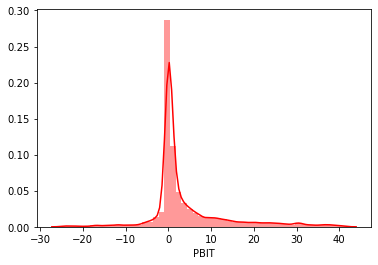

Boxplot of PBIT
--------------------------------------------------------------------------------------


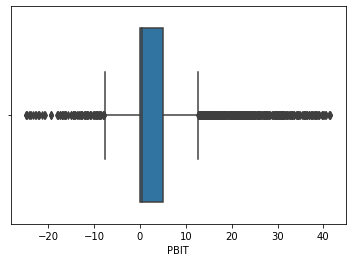

No of Missing Values in the column 941
Description of PBT
--------------------------------------------------------------------------------------
count    2645.000000
mean        1.419992
std         4.265092
min       -11.240000
25%        -0.030000
50%         0.150000
75%         1.650000
max        18.580000
Name: PBT, dtype: float64Description of PBT
--------------------------------------------------------------------------------------


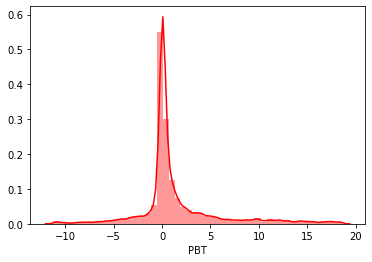

Boxplot of PBT
--------------------------------------------------------------------------------------


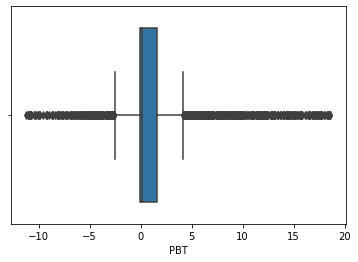

No of Missing Values in the column 959
Description of PAT
--------------------------------------------------------------------------------------
count    2627.000000
mean        1.054819
std         3.191573
min        -8.380000
25%        -0.030000
50%         0.120000
75%         1.300000
max        13.930000
Name: PAT, dtype: float64Description of PAT
--------------------------------------------------------------------------------------


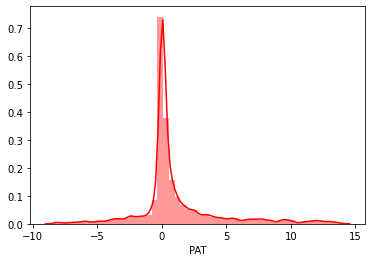

Boxplot of PAT
--------------------------------------------------------------------------------------


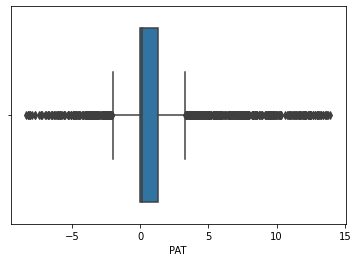

No of Missing Values in the column 954
Description of Adjusted_PAT
--------------------------------------------------------------------------------------
count    2632.000000
mean        0.999616
std         3.123099
min        -8.080000
25%        -0.040000
50%         0.100000
75%         1.200000
max        13.470000
Name: Adjusted_PAT, dtype: float64Description of Adjusted_PAT
--------------------------------------------------------------------------------------


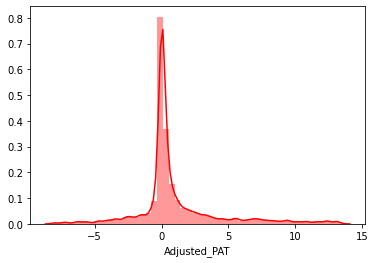

Boxplot of Adjusted_PAT
--------------------------------------------------------------------------------------


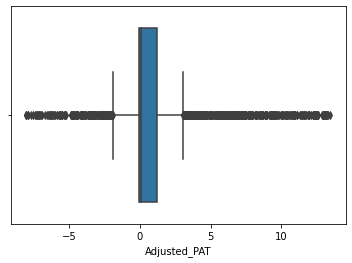

No of Missing Values in the column 816
Description of CP
--------------------------------------------------------------------------------------
count    2770.000000
mean        2.422285
std         6.008720
min       -15.930000
25%         0.000000
50%         0.355000
75%         2.927500
max        27.250000
Name: CP, dtype: float64Description of CP
--------------------------------------------------------------------------------------


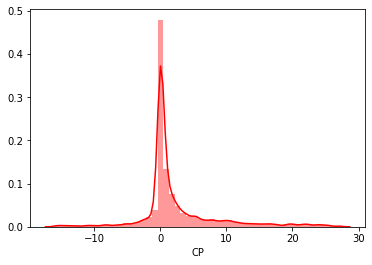

Boxplot of CP
--------------------------------------------------------------------------------------


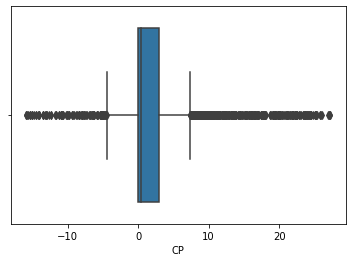

No of Missing Values in the column 738
Description of Rev_earn_in_forex
--------------------------------------------------------------------------------------
count    2848.000000
mean        0.992683
std         3.007959
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        17.880000
Name: Rev_earn_in_forex, dtype: float64Description of Rev_earn_in_forex
--------------------------------------------------------------------------------------


C:\Users\sanjay singh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


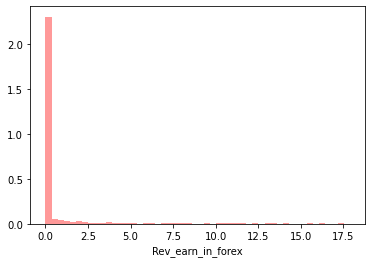

Boxplot of Rev_earn_in_forex
--------------------------------------------------------------------------------------


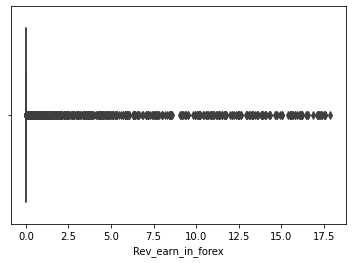

No of Missing Values in the column 693
Description of Rev_expenses_in_forex
--------------------------------------------------------------------------------------
count    2893.000000
mean        1.232389
std         3.194438
min         0.000000
25%         0.000000
50%         0.000000
75%         0.220000
max        17.420000
Name: Rev_expenses_in_forex, dtype: float64Description of Rev_expenses_in_forex
--------------------------------------------------------------------------------------


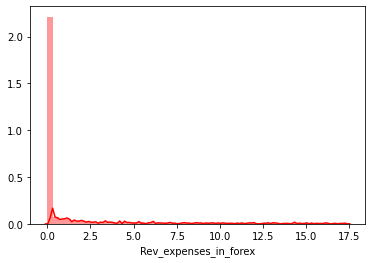

Boxplot of Rev_expenses_in_forex
--------------------------------------------------------------------------------------


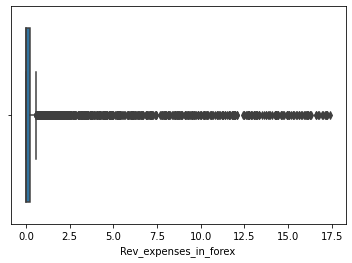

No of Missing Values in the column 485
Description of Book_Value_Unit_Curr
--------------------------------------------------------------------------------------
count    3101.000000
mean       30.853796
std        39.900465
min       -87.250000
25%         6.620000
50%        17.030000
75%        46.650000
max       167.060000
Name: Book_Value_Unit_Curr, dtype: float64Description of Book_Value_Unit_Curr
--------------------------------------------------------------------------------------


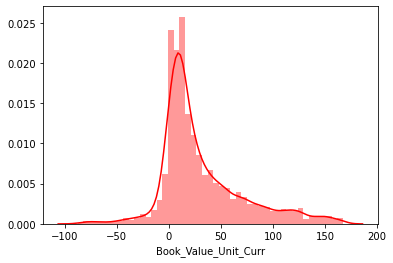

Boxplot of Book_Value_Unit_Curr
--------------------------------------------------------------------------------------


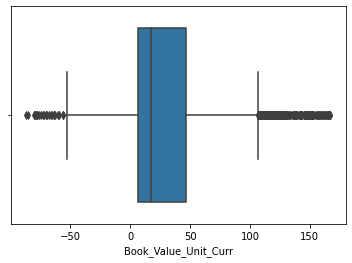

No of Missing Values in the column 490
Description of Book_Value_Adj_Unit_Curr
--------------------------------------------------------------------------------------
count    3096.000000
mean       26.777487
std        33.591131
min       -70.640000
25%         6.200000
50%        15.220000
75%        40.485000
max       138.790000
Name: Book_Value_Adj_Unit_Curr, dtype: float64Description of Book_Value_Adj_Unit_Curr
--------------------------------------------------------------------------------------


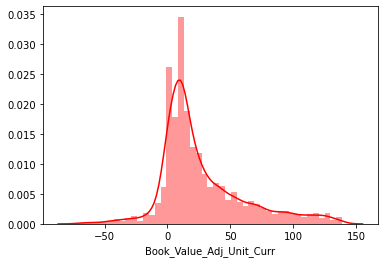

Boxplot of Book_Value_Adj_Unit_Curr
--------------------------------------------------------------------------------------


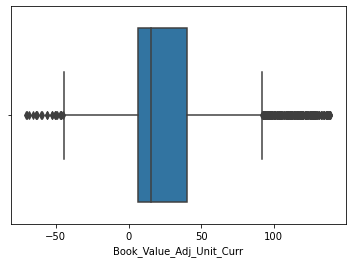

No of Missing Values in the column 639
Description of Market_Capitalisation
--------------------------------------------------------------------------------------
count    2947.000000
mean       27.643984
std        52.876803
min         0.000000
25%         0.000000
50%         3.020000
75%        26.625000
max       277.030000
Name: Market_Capitalisation, dtype: float64Description of Market_Capitalisation
--------------------------------------------------------------------------------------


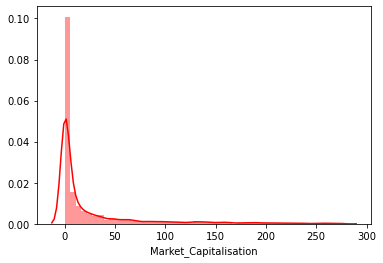

Boxplot of Market_Capitalisation
--------------------------------------------------------------------------------------


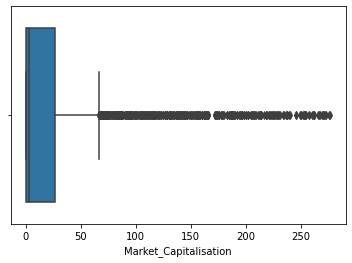

No of Missing Values in the column 602
Description of CEPS_annualised_Unit_Curr
--------------------------------------------------------------------------------------
count    2984.000000
mean        2.715647
std         5.697754
min       -13.130000
25%         0.000000
50%         0.640000
75%         4.320000
max        21.920000
Name: CEPS_annualised_Unit_Curr, dtype: float64Description of CEPS_annualised_Unit_Curr
--------------------------------------------------------------------------------------


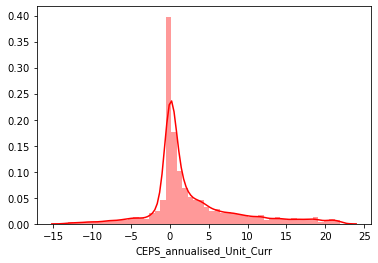

Boxplot of CEPS_annualised_Unit_Curr
--------------------------------------------------------------------------------------


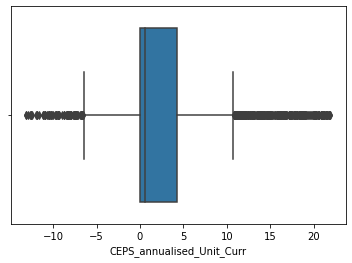

No of Missing Values in the column 801
Description of Cash_Flow_From_Operating_Activities
--------------------------------------------------------------------------------------
count    2785.000000
mean        2.527077
std         7.723537
min       -19.690000
25%        -0.330000
50%         0.120000
75%         3.820000
max        32.070000
Name: Cash_Flow_From_Operating_Activities, dtype: float64Description of Cash_Flow_From_Operating_Activities
--------------------------------------------------------------------------------------


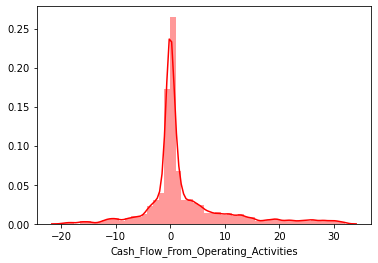

Boxplot of Cash_Flow_From_Operating_Activities
--------------------------------------------------------------------------------------


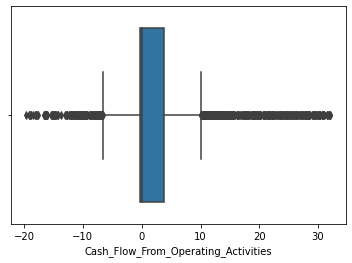

No of Missing Values in the column 876
Description of Cash_Flow_From_Investing_Activities
--------------------------------------------------------------------------------------
count    2710.000000
mean       -0.892218
std         3.091784
min       -12.960000
25%        -1.257500
50%         0.000000
75%         0.100000
max         7.960000
Name: Cash_Flow_From_Investing_Activities, dtype: float64Description of Cash_Flow_From_Investing_Activities
--------------------------------------------------------------------------------------


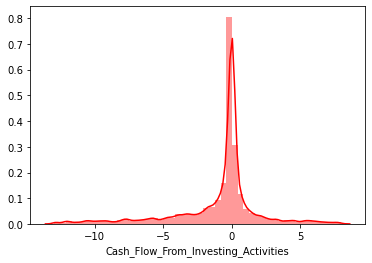

Boxplot of Cash_Flow_From_Investing_Activities
--------------------------------------------------------------------------------------


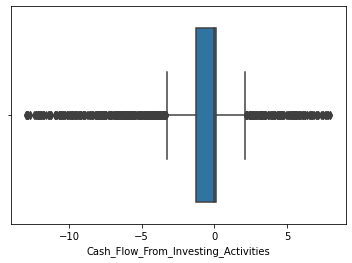

No of Missing Values in the column 1005
Description of Cash_Flow_From_Financing_Activities
--------------------------------------------------------------------------------------
count    2581.000000
mean       -0.911271
std         3.888463
min       -15.290000
25%        -1.220000
50%         0.000000
75%         0.110000
max         9.830000
Name: Cash_Flow_From_Financing_Activities, dtype: float64Description of Cash_Flow_From_Financing_Activities
--------------------------------------------------------------------------------------


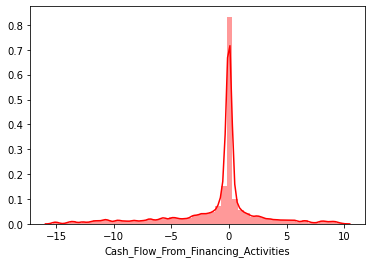

Boxplot of Cash_Flow_From_Financing_Activities
--------------------------------------------------------------------------------------


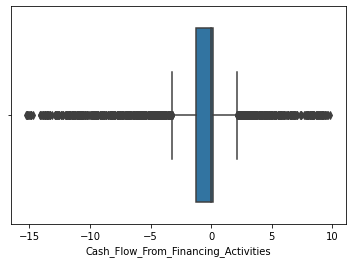

No of Missing Values in the column 747
Description of ROG_Net_Worth_perc
--------------------------------------------------------------------------------------
count    2839.000000
mean        3.701243
std         9.152914
min       -20.630000
25%        -0.205000
50%         1.760000
75%         8.240000
max        30.590000
Name: ROG_Net_Worth_perc, dtype: float64Description of ROG_Net_Worth_perc
--------------------------------------------------------------------------------------


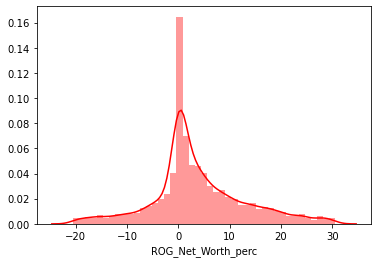

Boxplot of ROG_Net_Worth_perc
--------------------------------------------------------------------------------------


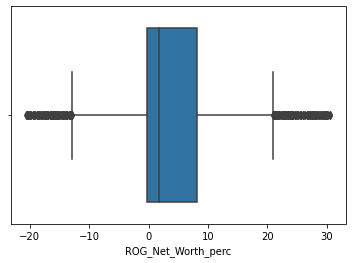

No of Missing Values in the column 572
Description of ROG_Capital_Employed_perc
--------------------------------------------------------------------------------------
count    3014.000000
mean        2.843457
std        11.548244
min       -28.440000
25%        -3.037500
50%         0.925000
75%         8.787500
max        37.140000
Name: ROG_Capital_Employed_perc, dtype: float64Description of ROG_Capital_Employed_perc
--------------------------------------------------------------------------------------


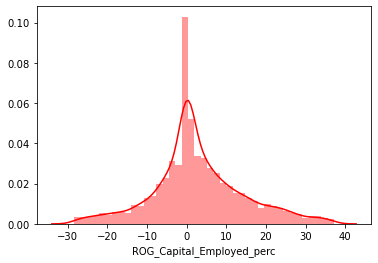

Boxplot of ROG_Capital_Employed_perc
--------------------------------------------------------------------------------------


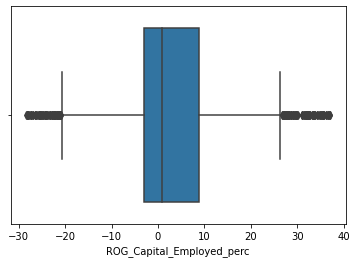

No of Missing Values in the column 830
Description of ROG_Gross_Block_perc
--------------------------------------------------------------------------------------
count    2756.000000
mean        2.080134
std         4.513705
min       -10.000000
25%         0.000000
50%         0.065000
75%         3.502500
max        16.750000
Name: ROG_Gross_Block_perc, dtype: float64Description of ROG_Gross_Block_perc
--------------------------------------------------------------------------------------


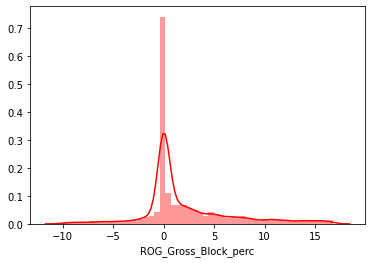

Boxplot of ROG_Gross_Block_perc
--------------------------------------------------------------------------------------


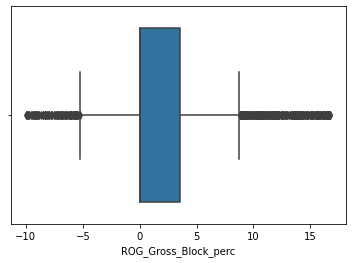

No of Missing Values in the column 671
Description of ROG_Gross_Sales_perc
--------------------------------------------------------------------------------------
count    2915.000000
mean        4.279245
std        21.148595
min       -52.210000
25%        -4.680000
50%         2.020000
75%        15.010000
max        65.920000
Name: ROG_Gross_Sales_perc, dtype: float64Description of ROG_Gross_Sales_perc
--------------------------------------------------------------------------------------


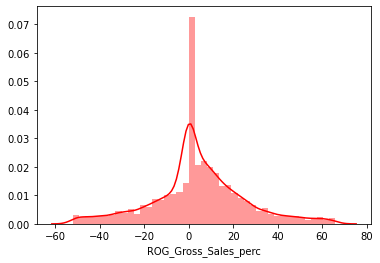

Boxplot of ROG_Gross_Sales_perc
--------------------------------------------------------------------------------------


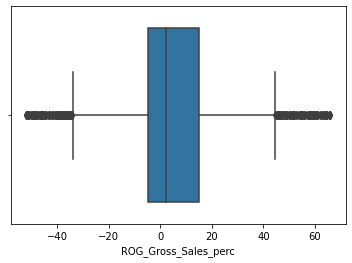

No of Missing Values in the column 667
Description of ROG_Net_Sales_perc
--------------------------------------------------------------------------------------
count    2919.000000
mean        4.274488
std        21.232257
min       -52.560000
25%        -4.815000
50%         2.020000
75%        15.230000
max        66.070000
Name: ROG_Net_Sales_perc, dtype: float64Description of ROG_Net_Sales_perc
--------------------------------------------------------------------------------------


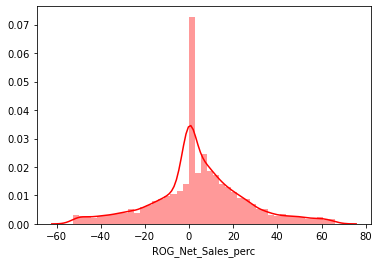

Boxplot of ROG_Net_Sales_perc
--------------------------------------------------------------------------------------


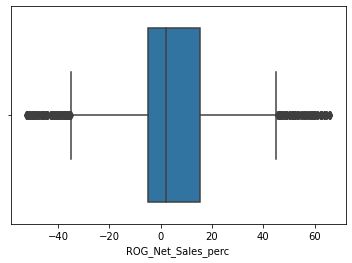

No of Missing Values in the column 675
Description of ROG_Cost_of_Prod_perc
--------------------------------------------------------------------------------------
count    2911.000000
mean        4.352061
std        21.935646
min       -52.600000
25%        -4.925000
50%         2.860000
75%        16.325000
max        68.400000
Name: ROG_Cost_of_Prod_perc, dtype: float64Description of ROG_Cost_of_Prod_perc
--------------------------------------------------------------------------------------


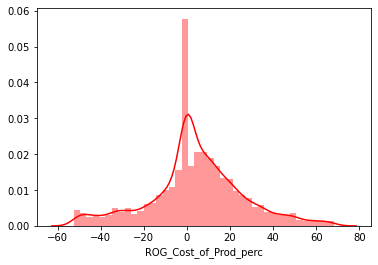

Boxplot of ROG_Cost_of_Prod_perc
--------------------------------------------------------------------------------------


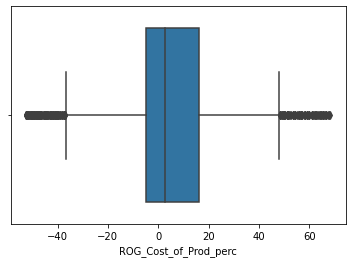

No of Missing Values in the column 483
Description of ROG_Total_Assets_perc
--------------------------------------------------------------------------------------
count    3103.000000
mean        2.587838
std        11.748880
min       -28.610000
25%        -3.535000
50%         0.820000
75%         8.510000
max        36.880000
Name: ROG_Total_Assets_perc, dtype: float64Description of ROG_Total_Assets_perc
--------------------------------------------------------------------------------------


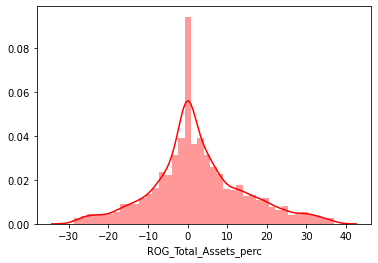

Boxplot of ROG_Total_Assets_perc
--------------------------------------------------------------------------------------


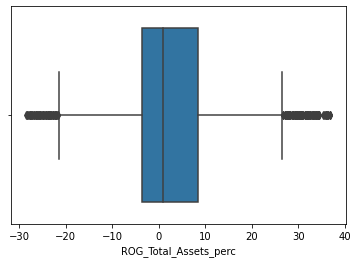

No of Missing Values in the column 611
Description of ROG_PBIDT_perc
--------------------------------------------------------------------------------------
count    2975.000000
mean        9.181318
std        51.055322
min      -127.770000
25%       -16.585000
50%         3.430000
75%        32.545000
max       154.580000
Name: ROG_PBIDT_perc, dtype: float64Description of ROG_PBIDT_perc
--------------------------------------------------------------------------------------


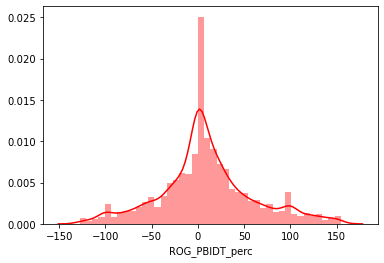

Boxplot of ROG_PBIDT_perc
--------------------------------------------------------------------------------------


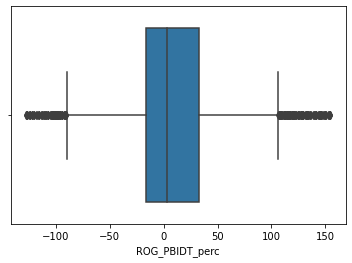

No of Missing Values in the column 628
Description of ROG_PBDT_perc
--------------------------------------------------------------------------------------
count    2958.000000
mean        9.955943
std        57.572085
min      -151.520000
25%       -20.112500
50%         2.930000
75%        39.705000
max       176.520000
Name: ROG_PBDT_perc, dtype: float64Description of ROG_PBDT_perc
--------------------------------------------------------------------------------------


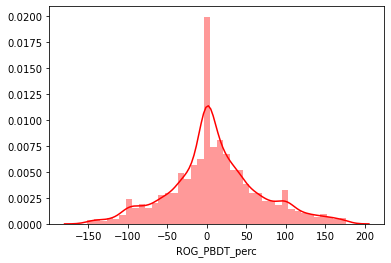

Boxplot of ROG_PBDT_perc
--------------------------------------------------------------------------------------


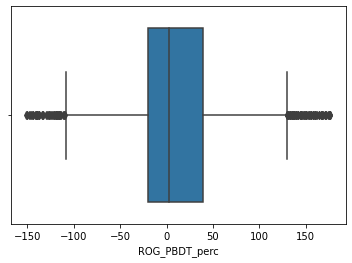

No of Missing Values in the column 616
Description of ROG_PBIT_perc
--------------------------------------------------------------------------------------
count    2970.000000
mean        7.876195
std        57.411470
min      -151.480000
25%       -21.205000
50%         1.060000
75%        37.210000
max       171.430000
Name: ROG_PBIT_perc, dtype: float64Description of ROG_PBIT_perc
--------------------------------------------------------------------------------------


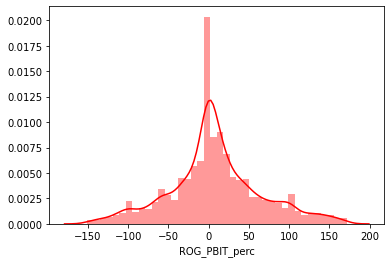

Boxplot of ROG_PBIT_perc
--------------------------------------------------------------------------------------


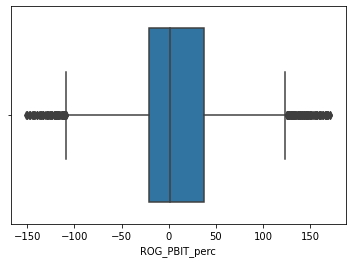

No of Missing Values in the column 611
Description of ROG_PBT_perc
--------------------------------------------------------------------------------------
count    2975.000000
mean       10.565550
std        70.498226
min      -195.830000
25%       -28.320000
50%         1.230000
75%        47.220000
max       216.380000
Name: ROG_PBT_perc, dtype: float64Description of ROG_PBT_perc
--------------------------------------------------------------------------------------


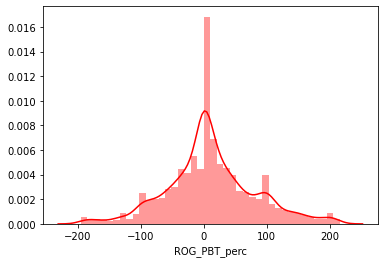

Boxplot of ROG_PBT_perc
--------------------------------------------------------------------------------------


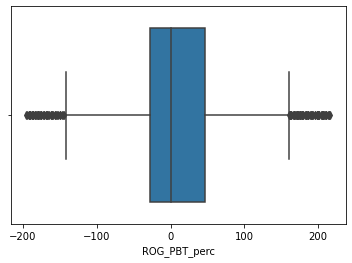

No of Missing Values in the column 598
Description of ROG_PAT_perc
--------------------------------------------------------------------------------------
count    2988.000000
mean        9.792855
std        74.152986
min      -207.190000
25%       -30.590000
50%         0.375000
75%        49.887500
max       228.570000
Name: ROG_PAT_perc, dtype: float64Description of ROG_PAT_perc
--------------------------------------------------------------------------------------


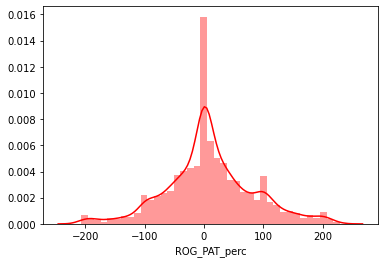

Boxplot of ROG_PAT_perc
--------------------------------------------------------------------------------------


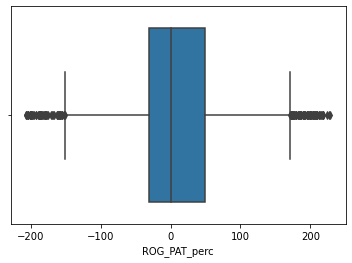

No of Missing Values in the column 637
Description of ROG_CP_perc
--------------------------------------------------------------------------------------
count    2949.000000
mean       10.404303
std        57.906595
min      -152.050000
25%       -19.670000
50%         4.060000
75%        40.370000
max       176.440000
Name: ROG_CP_perc, dtype: float64Description of ROG_CP_perc
--------------------------------------------------------------------------------------


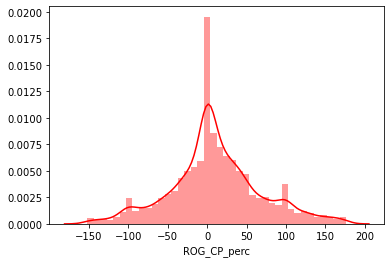

Boxplot of ROG_CP_perc
--------------------------------------------------------------------------------------


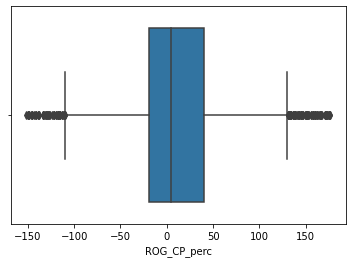

No of Missing Values in the column 497
Description of ROG_Market_Capitalisation_perc
--------------------------------------------------------------------------------------
count    3089.000000
mean       10.896611
std        34.120469
min       -70.850000
25%         0.000000
50%         0.000000
75%        21.150000
max       118.760000
Name: ROG_Market_Capitalisation_perc, dtype: float64Description of ROG_Market_Capitalisation_perc
--------------------------------------------------------------------------------------


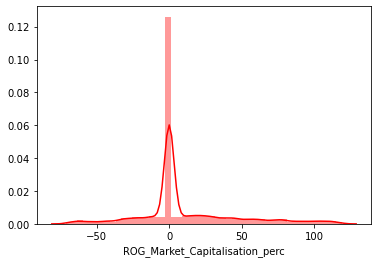

Boxplot of ROG_Market_Capitalisation_perc
--------------------------------------------------------------------------------------


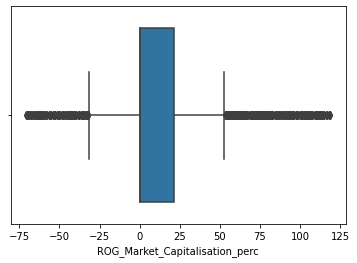

No of Missing Values in the column 566
Description of Current_RatioLatest
--------------------------------------------------------------------------------------
count    3020.000000
mean        1.425609
std         1.058620
min         0.000000
25%         0.790000
50%         1.200000
75%         1.780000
max         5.570000
Name: Current_RatioLatest, dtype: float64Description of Current_RatioLatest
--------------------------------------------------------------------------------------


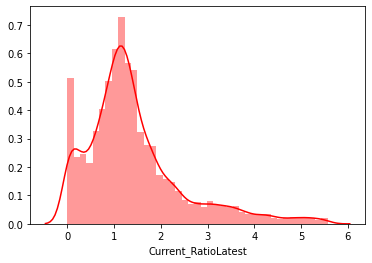

Boxplot of Current_RatioLatest
--------------------------------------------------------------------------------------


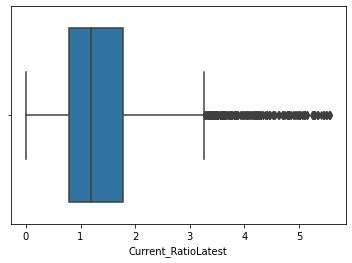

No of Missing Values in the column 496
Description of Fixed_Assets_RatioLatest
--------------------------------------------------------------------------------------
count    3090.000000
mean        2.007528
std         2.447800
min         0.000000
25%         0.140000
50%         1.150000
75%         2.817500
max        11.430000
Name: Fixed_Assets_RatioLatest, dtype: float64Description of Fixed_Assets_RatioLatest
--------------------------------------------------------------------------------------


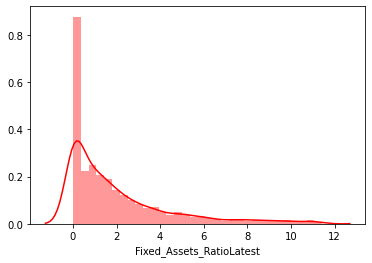

Boxplot of Fixed_Assets_RatioLatest
--------------------------------------------------------------------------------------


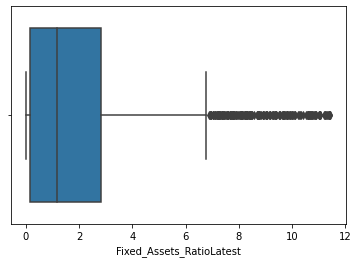

No of Missing Values in the column 376
Description of Inventory_RatioLatest
--------------------------------------------------------------------------------------
count    3210.000000
mean        4.170280
std         5.013648
min         0.000000
25%         0.000000
50%         2.540000
75%         6.587500
max        22.310000
Name: Inventory_RatioLatest, dtype: float64Description of Inventory_RatioLatest
--------------------------------------------------------------------------------------


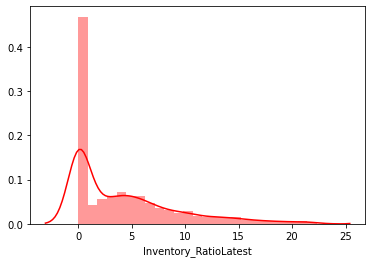

Boxplot of Inventory_RatioLatest
--------------------------------------------------------------------------------------


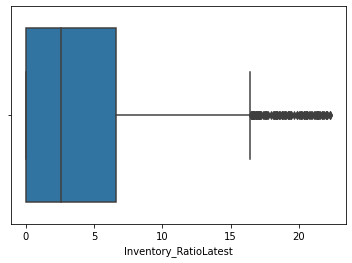

No of Missing Values in the column 372
Description of Debtors_RatioLatest
--------------------------------------------------------------------------------------
count    3214.000000
mean        4.296456
std         4.607972
min         0.000000
25%         0.100000
50%         3.195000
75%         6.337500
max        20.650000
Name: Debtors_RatioLatest, dtype: float64Description of Debtors_RatioLatest
--------------------------------------------------------------------------------------


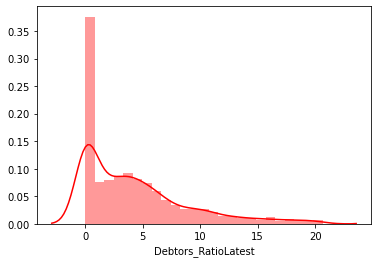

Boxplot of Debtors_RatioLatest
--------------------------------------------------------------------------------------


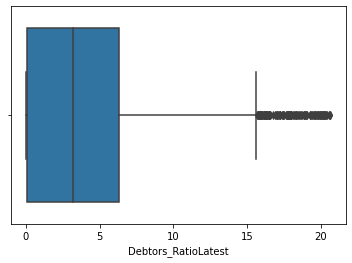

No of Missing Values in the column 202
Description of Total_Asset_Turnover_RatioLatest
--------------------------------------------------------------------------------------
count    3384.000000
mean        0.825349
std         0.905669
min         0.000000
25%         0.060000
50%         0.480000
75%         1.370000
max         3.760000
Name: Total_Asset_Turnover_RatioLatest, dtype: float64Description of Total_Asset_Turnover_RatioLatest
--------------------------------------------------------------------------------------


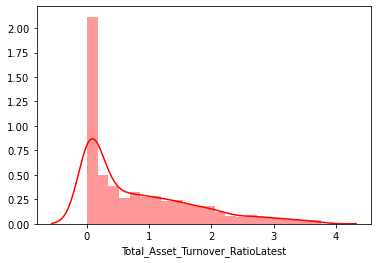

Boxplot of Total_Asset_Turnover_RatioLatest
--------------------------------------------------------------------------------------


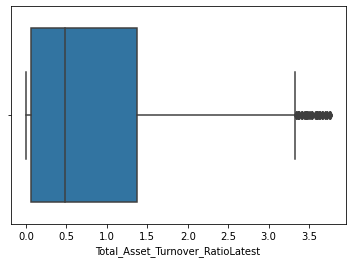

No of Missing Values in the column 726
Description of Interest_Cover_RatioLatest
--------------------------------------------------------------------------------------
count    2860.000000
mean        1.245580
std         2.218447
min        -5.500000
25%         0.000000
50%         0.535000
75%         2.100000
max         9.250000
Name: Interest_Cover_RatioLatest, dtype: float64Description of Interest_Cover_RatioLatest
--------------------------------------------------------------------------------------


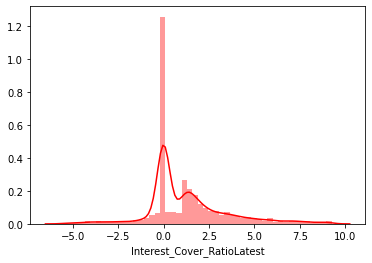

Boxplot of Interest_Cover_RatioLatest
--------------------------------------------------------------------------------------


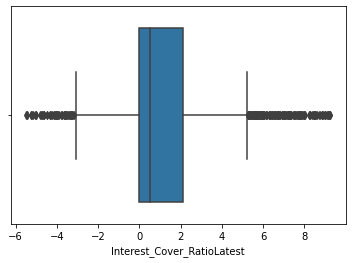

No of Missing Values in the column 596
Description of PBIDTM_percLatest
--------------------------------------------------------------------------------------
count    2990.000000
mean        9.679080
std        12.008003
min       -28.260000
25%         1.140000
50%         7.815000
75%        15.785000
max        46.980000
Name: PBIDTM_percLatest, dtype: float64Description of PBIDTM_percLatest
--------------------------------------------------------------------------------------


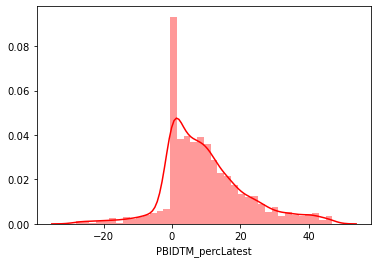

Boxplot of PBIDTM_percLatest
--------------------------------------------------------------------------------------


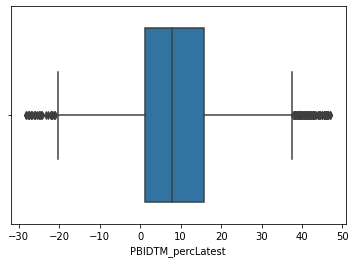

No of Missing Values in the column 718
Description of PBITM_percLatest
--------------------------------------------------------------------------------------
count    2868.000000
mean        6.743640
std         9.359168
min       -21.430000
25%         0.197500
50%         5.005000
75%        11.432500
max        35.560000
Name: PBITM_percLatest, dtype: float64Description of PBITM_percLatest
--------------------------------------------------------------------------------------


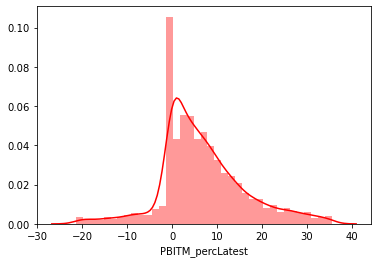

Boxplot of PBITM_percLatest
--------------------------------------------------------------------------------------


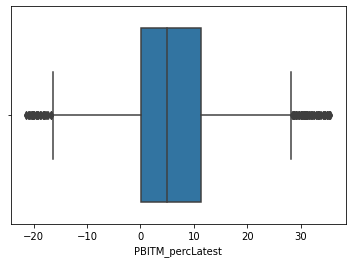

No of Missing Values in the column 696
Description of PBDTM_percLatest
--------------------------------------------------------------------------------------
count    2890.000000
mean        6.760945
std         9.586718
min       -21.010000
25%         0.040000
50%         4.765000
75%        11.827500
max        35.260000
Name: PBDTM_percLatest, dtype: float64Description of PBDTM_percLatest
--------------------------------------------------------------------------------------


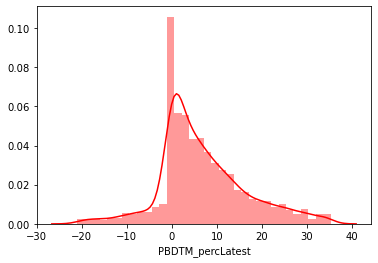

Boxplot of PBDTM_percLatest
--------------------------------------------------------------------------------------


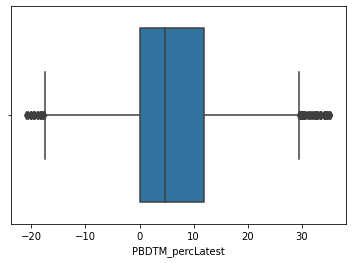

No of Missing Values in the column 721
Description of CPM_percLatest
--------------------------------------------------------------------------------------
count    2865.000000
mean        5.513714
std         7.667066
min       -17.070000
25%         0.070000
50%         4.010000
75%         9.550000
max        28.010000
Name: CPM_percLatest, dtype: float64Description of CPM_percLatest
--------------------------------------------------------------------------------------


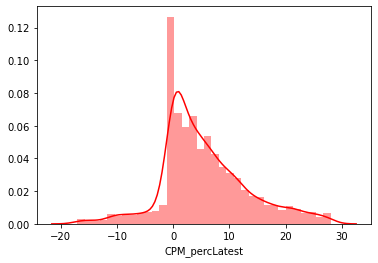

Boxplot of CPM_percLatest
--------------------------------------------------------------------------------------


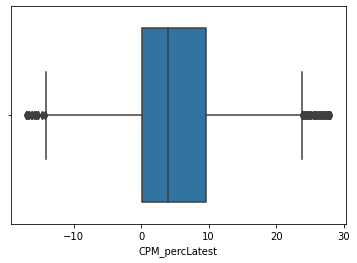

No of Missing Values in the column 934
Description of APATM_percLatest
--------------------------------------------------------------------------------------
count    2652.000000
mean        3.119811
std         5.143355
min       -11.110000
25%         0.000000
50%         1.815000
75%         5.682500
max        18.520000
Name: APATM_percLatest, dtype: float64Description of APATM_percLatest
--------------------------------------------------------------------------------------


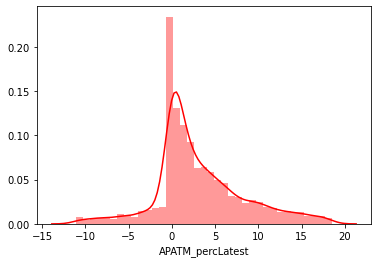

Boxplot of APATM_percLatest
--------------------------------------------------------------------------------------


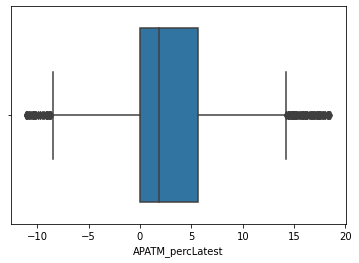

No of Missing Values in the column 398
Description of Debtors_Velocity_Days
--------------------------------------------------------------------------------------
count    3188.000000
mean       53.100376
std        55.694164
min         0.000000
25%         3.000000
50%        40.000000
75%        80.000000
max       253.000000
Name: Debtors_Velocity_Days, dtype: float64Description of Debtors_Velocity_Days
--------------------------------------------------------------------------------------


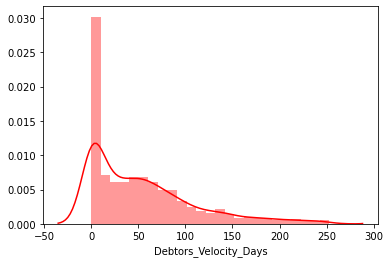

Boxplot of Debtors_Velocity_Days
--------------------------------------------------------------------------------------


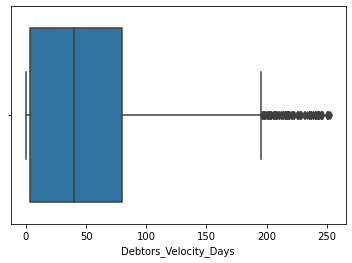

No of Missing Values in the column 391
Description of Creditors_Velocity_Days
--------------------------------------------------------------------------------------
count    3195.000000
mean       44.321440
std        46.905883
min         0.000000
25%         4.000000
50%        32.000000
75%        67.000000
max       210.000000
Name: Creditors_Velocity_Days, dtype: float64Description of Creditors_Velocity_Days
--------------------------------------------------------------------------------------


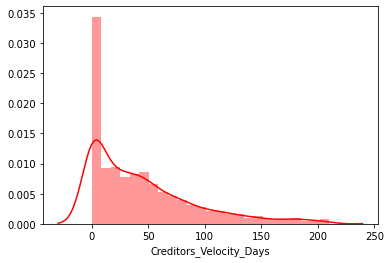

Boxplot of Creditors_Velocity_Days
--------------------------------------------------------------------------------------


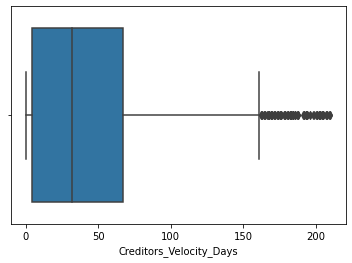

No of Missing Values in the column 365
Description of Inventory_Velocity_Days
--------------------------------------------------------------------------------------
count    3221.000000
mean       47.639863
std        56.177310
min         0.000000
25%         0.000000
50%        28.000000
75%        79.000000
max       240.000000
Name: Inventory_Velocity_Days, dtype: float64Description of Inventory_Velocity_Days
--------------------------------------------------------------------------------------


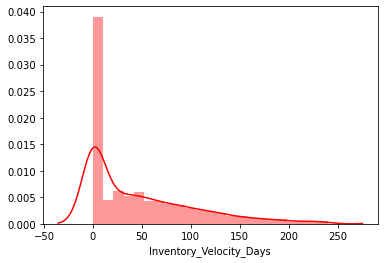

Boxplot of Inventory_Velocity_Days
--------------------------------------------------------------------------------------


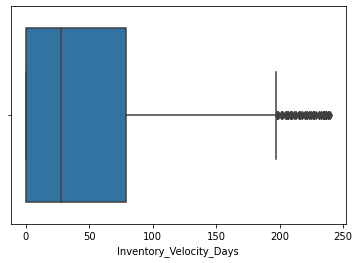

No of Missing Values in the column 150
Description of Value_of_Output_Total_Assets
--------------------------------------------------------------------------------------
count    3436.000000
mean        0.640774
std         0.657779
min        -0.330000
25%         0.060000
50%         0.420000
75%         1.080000
max         2.790000
Name: Value_of_Output_Total_Assets, dtype: float64Description of Value_of_Output_Total_Assets
--------------------------------------------------------------------------------------


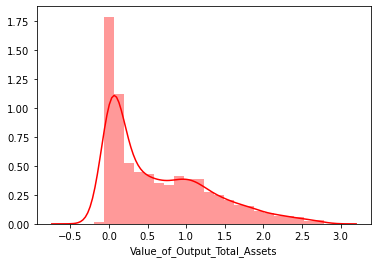

Boxplot of Value_of_Output_Total_Assets
--------------------------------------------------------------------------------------


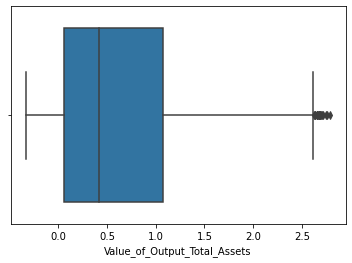

No of Missing Values in the column 481
Description of Value_of_Output_Gross_Block
--------------------------------------------------------------------------------------
count    3105.000000
mean        2.055662
std         2.545028
min        -5.500000
25%         0.130000
50%         1.150000
75%         2.900000
max        11.850000
Name: Value_of_Output_Gross_Block, dtype: float64Description of Value_of_Output_Gross_Block
--------------------------------------------------------------------------------------


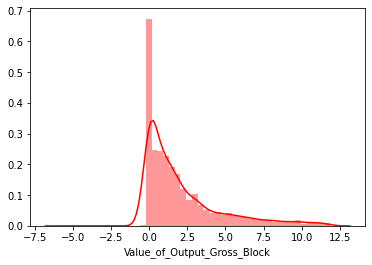

Boxplot of Value_of_Output_Gross_Block
--------------------------------------------------------------------------------------


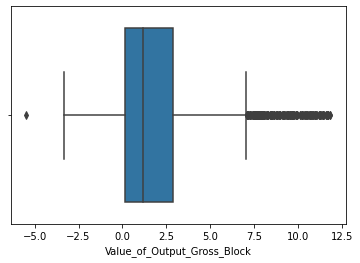

KeyError: 'Default'

In [89]:
for x in df_imputed.columns:
    univariateanalysis (x,20)

### Model creation in Statsmodel & Feature Selection

In [90]:
mod1= sm.logit(formula='Default ~ Networth + Capital_Employed + Total_Debt + Gross_Block + +Current_Assets + Current_Liabilities_and_Provisions + Total_Assets_Liabilities + Gross_Sales + Other_Income + Value_Of_Output + Cost_of_Prod + PBIDT + PBDT + PBIT + PAT + Adjusted_PAT + CP + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_RatioLatest + Fixed_Assets_RatioLatest + Total_Asset_Turnover_RatioLatest + Interest_Cover_RatioLatest + ROG_Cost_of_Prod_perc +  PBIDTM_percLatest + APATM_percLatest + Value_of_Output_Total_Assets', data = d_train).fit()

Optimization terminated successfully.
         Current function value: 0.131385
         Iterations 10


In [91]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2371
Method:                           MLE   Df Model:                           30
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.6012
Time:                        11:50:47   Log-Likelihood:                -315.59
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                8.660e-181
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1946      0.297    -17.517      0.000      -5.776      -4.613
Networth                               -1.6794      0.364     -4.614      0.000      -2.393      -0.966
Capital_Employed                       -0.8200      0.377     -2.178      0.029      -1.558      -0.082
Total_Debt                              0.3566      0.198      1.797      0.072      -0.032       0.746
Gross_Block                             0.7862      0.272      2.886      0.004       0.252       1.320
Current_Assets                          0.2292      0.335      0.684      0.494      -0.427       0.886
Current_Liabilities_and_Provisions      0.6099      0.276      2.213      0.027       0.070       1.150
Total_Assets_Liabilities                0.6679      0.366      1.823      0.068      -0.050       1.386
Gross_Sales                             0.3011      1.069      0.282      0.778      -1.793       2.395
Other_Income                            0.2210      0.154      1.440      0.150      -0.080       0.522
Value_Of_Output                        -2.0182      1.032     -1.956      0.051      -4.041       0.005
Cost_of_Prod                            1.3408      0.562      2.386      0.017       0.239       2.442
PBIDT                                  -1.1616      0.260     -4.462      0.000      -1.672      -0.651
PBDT                                    0.8705      0.514      1.692      0.091      -0.138       1.879
PBIT                                    0.7351      0.305      2.408      0.016       0.137       1.334
PAT                                    -0.2634      0.365     -0.721      0.471      -0.979       0.453
Adjusted_PAT                            0.4587      0.357      1.285      0.199      -0.241       1.158
CP                                     -0.6643      0.452     -1.470      0.142      -1.550       0.222
Book_Value_Unit_Curr                   -2.2620      0.630     -3.588      0.000      -3.498      -1.026
Book_Value_Adj_Unit_Curr               -1.1740      0.604     -1.944      0.052      -2.358       0.010
Cash_Flow_From_Investing_Activities     0.1889      0.171      1.103      0.270      -0.147       0.524
ROG_Net_Worth_perc                     -0.6012      0.161     -3.746      0.000      -0.916      -0.287
ROG_Capital_Employed_perc               0.5144      0.136      3.770      0.000       0.247       0.782
Current_RatioLatest                    -1.0447      0.170     -6.151      0.000      -1.378      -0.712
Fixed_Assets_RatioLatest               -0.2861      0.204     -1.403      0.161      -0.686       0.114
Total_Asset_Turnover_RatioLatest       -0.3938      0.251     -1.569      0.117      -0.886       0.098
Interest_Cover_RatioLatest             -0.7177      0.195     -3.677      0.000      -1.100      -0.335
ROG_Cost_of_Prod_perc                  -0.2603      0.124     -2.097      0.036      -0.504      -0.017
PBIDTM_percLatest

removing variables with pvalue > 5% simulataneaoustly
 omitting -> Current_Assets

In [92]:
mod2= sm.logit(formula='Default ~ Networth + Capital_Employed + Total_Debt + Gross_Block + Current_Liabilities_and_Provisions + Total_Assets_Liabilities + Gross_Sales + Other_Income + Value_Of_Output + Cost_of_Prod + PBIDT + PBDT + PBIT + PAT + Adjusted_PAT + CP + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_RatioLatest + Fixed_Assets_RatioLatest + Total_Asset_Turnover_RatioLatest + Interest_Cover_RatioLatest + ROG_Cost_of_Prod_perc + PBIDTM_percLatest + APATM_percLatest + Value_of_Output_Total_Assets', data = d_train).fit()

Optimization terminated successfully.
         Current function value: 0.131480
         Iterations 10


In [93]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           29
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.6009
Time:                        11:50:47   Log-Likelihood:                -315.82
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.871e-181
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1929      0.297    -17.513      0.000      -5.774      -4.612
Networth                               -1.6622      0.365     -4.551      0.000      -2.378      -0.946
Capital_Employed                       -0.7890      0.374     -2.109      0.035      -1.522      -0.056
Total_Debt                              0.3872      0.194      2.000      0.045       0.008       0.767
Gross_Block                             0.7521      0.269      2.796      0.005       0.225       1.279
Current_Liabilities_and_Provisions      0.6904      0.252      2.738      0.006       0.196       1.185
Total_Assets_Liabilities                0.7001      0.359      1.951      0.051      -0.003       1.403
Gross_Sales                             0.3357      1.063      0.316      0.752      -1.749       2.420
Other_Income                            0.2259      0.154      1.464      0.143      -0.077       0.528
Value_Of_Output                        -2.0025      1.029     -1.946      0.052      -4.019       0.014
Cost_of_Prod                            1.3712      0.561      2.444      0.015       0.272       2.471
PBIDT                                  -1.1787      0.260     -4.539      0.000      -1.688      -0.670
PBDT                                    0.8960      0.518      1.730      0.084      -0.119       1.911
PBIT                                    0.7603      0.303      2.512      0.012       0.167       1.354
PAT                                    -0.2449      0.366     -0.670      0.503      -0.962       0.472
Adjusted_PAT                            0.4526      0.358      1.265      0.206      -0.249       1.154
CP                                     -0.7170      0.446     -1.606      0.108      -1.592       0.158
Book_Value_Unit_Curr                   -2.2642      0.632     -3.583      0.000      -3.503      -1.026
Book_Value_Adj_Unit_Curr               -1.1682      0.605     -1.931      0.054      -2.354       0.018
Cash_Flow_From_Investing_Activities     0.1840      0.171      1.073      0.283      -0.152       0.520
ROG_Net_Worth_perc                     -0.6010      0.161     -3.744      0.000      -0.916      -0.286
ROG_Capital_Employed_perc               0.5209      0.136      3.831      0.000       0.254       0.787
Current_RatioLatest                    -1.0282      0.167     -6.150      0.000      -1.356      -0.700
Fixed_Assets_RatioLatest               -0.2934      0.204     -1.438      0.150      -0.693       0.106
Total_Asset_Turnover_RatioLatest       -0.3911      0.251     -1.561      0.118      -0.882       0.100
Interest_Cover_RatioLatest             -0.7140      0.195     -3.668      0.000      -1.096      -0.332
ROG_Cost_of_Prod_perc                  -0.2649      0.124     -2.140      0.032      -0.508      -0.022
PBIDTM_percLatest                      -0.3017      0.160     -1.884      0.060      -0.616       0.012
APATM_percLatest 

Omitting Gross Sales

In [94]:
mod3= sm.logit(formula='Default ~ Networth + Capital_Employed + Total_Debt + Gross_Block + Current_Liabilities_and_Provisions + Total_Assets_Liabilities + Other_Income + Value_Of_Output + Cost_of_Prod + PBIDT + PBDT + PBIT + PAT + Adjusted_PAT + CP + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_RatioLatest + Fixed_Assets_RatioLatest + Total_Asset_Turnover_RatioLatest + Interest_Cover_RatioLatest + ROG_Cost_of_Prod_perc + PBIDTM_percLatest + APATM_percLatest + Value_of_Output_Total_Assets', data = d_train).fit()

Optimization terminated successfully.
         Current function value: 0.131501
         Iterations 10


In [95]:
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           28
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.6008
Time:                        11:50:48   Log-Likelihood:                -315.87
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.335e-182
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1946      0.297    -17.518      0.000      -5.776      -4.613
Networth                               -1.6663      0.365     -4.559      0.000      -2.383      -0.950
Capital_Employed                       -0.7878      0.375     -2.102      0.036      -1.522      -0.053
Total_Debt                              0.3891      0.193      2.015      0.044       0.011       0.768
Gross_Block                             0.7502      0.269      2.791      0.005       0.223       1.277
Current_Liabilities_and_Provisions      0.7029      0.249      2.823      0.005       0.215       1.191
Total_Assets_Liabilities                0.7021      0.360      1.953      0.051      -0.003       1.407
Other_Income                            0.2202      0.153      1.436      0.151      -0.080       0.521
Value_Of_Output                        -1.7395      0.584     -2.978      0.003      -2.884      -0.595
Cost_of_Prod                            1.4309      0.527      2.714      0.007       0.398       2.464
PBIDT                                  -1.1719      0.259     -4.529      0.000      -1.679      -0.665
PBDT                                    0.9047      0.518      1.746      0.081      -0.111       1.920
PBIT                                    0.7473      0.299      2.498      0.012       0.161       1.334
PAT                                    -0.2473      0.365     -0.677      0.499      -0.964       0.469
Adjusted_PAT                            0.4514      0.358      1.261      0.207      -0.250       1.153
CP                                     -0.7160      0.447     -1.603      0.109      -1.592       0.160
Book_Value_Unit_Curr                   -2.2187      0.616     -3.601      0.000      -3.426      -1.011
Book_Value_Adj_Unit_Curr               -1.2137      0.589     -2.060      0.039      -2.369      -0.059
Cash_Flow_From_Investing_Activities     0.1807      0.171      1.059      0.290      -0.154       0.515
ROG_Net_Worth_perc                     -0.6013      0.160     -3.749      0.000      -0.916      -0.287
ROG_Capital_Employed_perc               0.5209      0.136      3.835      0.000       0.255       0.787
Current_RatioLatest                    -1.0275      0.167     -6.146      0.000      -1.355      -0.700
Fixed_Assets_RatioLatest               -0.2918      0.204     -1.432      0.152      -0.691       0.108
Total_Asset_Turnover_RatioLatest       -0.3844      0.249     -1.542      0.123      -0.873       0.104
Interest_Cover_RatioLatest             -0.7127      0.195     -3.661      0.000      -1.094      -0.331
ROG_Cost_of_Prod_perc                  -0.2658      0.124     -2.146      0.032      -0.509      -0.023
PBIDTM_percLatest                      -0.3024      0.160     -1.890      0.059      -0.616       0.011
APATM_percLatest                        0.3482      0.174      1.997      0.046       0.007       0.690
Value_of_Output_T

Removing PBDT since p>0.05

In [96]:
mod4= sm.logit(formula='Default ~ Networth + Capital_Employed + Total_Debt + Gross_Block + Current_Liabilities_and_Provisions + Total_Assets_Liabilities + Other_Income + Value_Of_Output + Cost_of_Prod + PBIDT + PBIT + PAT + Adjusted_PAT + CP + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_RatioLatest + Fixed_Assets_RatioLatest + Total_Asset_Turnover_RatioLatest + Interest_Cover_RatioLatest + ROG_Cost_of_Prod_perc +  PBIDTM_percLatest + APATM_percLatest + Value_of_Output_Total_Assets', data = d_train).fit()

Optimization terminated successfully.
         Current function value: 0.132164
         Iterations 10


In [97]:
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                           27
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.5988
Time:                        11:50:48   Log-Likelihood:                -317.46
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.623e-182
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1973      0.297    -17.471      0.000      -5.780      -4.614
Networth                               -1.5796      0.344     -4.586      0.000      -2.255      -0.905
Capital_Employed                       -0.8102      0.369     -2.195      0.028      -1.534      -0.087
Total_Debt                              0.3670      0.192      1.915      0.056      -0.009       0.743
Gross_Block                             0.6894      0.264      2.609      0.009       0.171       1.207
Current_Liabilities_and_Provisions      0.6733      0.246      2.742      0.006       0.192       1.155
Total_Assets_Liabilities                0.7251      0.347      2.089      0.037       0.045       1.406
Other_Income                            0.2531      0.151      1.671      0.095      -0.044       0.550
Value_Of_Output                        -1.7104      0.579     -2.957      0.003      -2.844      -0.577
Cost_of_Prod                            1.4315      0.521      2.745      0.006       0.410       2.453
PBIDT                                  -1.1597      0.260     -4.462      0.000      -1.669      -0.650
PBIT                                    0.8865      0.290      3.058      0.002       0.318       1.455
PAT                                    -0.2720      0.358     -0.759      0.448      -0.974       0.430
Adjusted_PAT                            0.4907      0.349      1.408      0.159      -0.192       1.174
CP                                     -0.0472      0.242     -0.196      0.845      -0.521       0.426
Book_Value_Unit_Curr                   -2.1804      0.606     -3.596      0.000      -3.369      -0.992
Book_Value_Adj_Unit_Curr               -1.2656      0.579     -2.185      0.029      -2.401      -0.131
Cash_Flow_From_Investing_Activities     0.1634      0.169      0.968      0.333      -0.168       0.494
ROG_Net_Worth_perc                     -0.5910      0.160     -3.686      0.000      -0.905      -0.277
ROG_Capital_Employed_perc               0.5045      0.136      3.702      0.000       0.237       0.772
Current_RatioLatest                    -1.0431      0.167     -6.236      0.000      -1.371      -0.715
Fixed_Assets_RatioLatest               -0.2895      0.204     -1.419      0.156      -0.690       0.111
Total_Asset_Turnover_RatioLatest       -0.3483      0.247     -1.411      0.158      -0.832       0.136
Interest_Cover_RatioLatest             -0.7183      0.194     -3.695      0.000      -1.099      -0.337
ROG_Cost_of_Prod_perc                  -0.2666      0.123     -2.160      0.031      -0.508      -0.025
PBIDTM_percLatest                      -0.3056      0.159     -1.920      0.055      -0.618       0.006
APATM_percLatest                        0.3673      0.172      2.137      0.033       0.030       0.704
Value_of_Output_Total_Assets            0.4569      0.243      1.882      0.060      -0.019       0.933
=================

Removing Adjusted_PAT since P>0.05

In [98]:
mod5= sm.logit(formula='Default ~ Networth + Capital_Employed + Total_Debt + Gross_Block + Current_Liabilities_and_Provisions + Total_Assets_Liabilities + Other_Income + Value_Of_Output + Cost_of_Prod + PBIDT + PBIT + PAT + CP + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_RatioLatest + Fixed_Assets_RatioLatest + Total_Asset_Turnover_RatioLatest + Interest_Cover_RatioLatest + ROG_Cost_of_Prod_perc +  PBIDTM_percLatest + APATM_percLatest + Value_of_Output_Total_Assets', data = d_train).fit()

Optimization terminated successfully.
         Current function value: 0.132572
         Iterations 10


In [99]:
mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2375
Method:                           MLE   Df Model:                           26
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.5976
Time:                        11:50:49   Log-Likelihood:                -318.44
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.116e-182
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1596      0.294    -17.576      0.000      -5.735      -4.584
Networth                               -1.5416      0.336     -4.590      0.000      -2.200      -0.883
Capital_Employed                       -0.7905      0.362     -2.181      0.029      -1.501      -0.080
Total_Debt                              0.3420      0.191      1.791      0.073      -0.032       0.716
Gross_Block                             0.6525      0.262      2.492      0.013       0.139       1.166
Current_Liabilities_and_Provisions      0.7134      0.244      2.921      0.003       0.235       1.192
Total_Assets_Liabilities                0.7328      0.338      2.169      0.030       0.071       1.395
Other_Income                            0.2195      0.148      1.483      0.138      -0.071       0.510
Value_Of_Output                        -1.6859      0.584     -2.888      0.004      -2.830      -0.542
Cost_of_Prod                            1.4205      0.525      2.707      0.007       0.392       2.449
PBIDT                                  -1.1395      0.259     -4.399      0.000      -1.647      -0.632
PBIT                                    0.8395      0.286      2.934      0.003       0.279       1.400
PAT                                     0.1293      0.221      0.585      0.558      -0.304       0.563
CP                                     -0.0021      0.242     -0.009      0.993      -0.477       0.473
Book_Value_Unit_Curr                   -2.0741      0.599     -3.465      0.001      -3.247      -0.901
Book_Value_Adj_Unit_Curr               -1.3302      0.574     -2.317      0.021      -2.455      -0.205
Cash_Flow_From_Investing_Activities     0.1609      0.169      0.950      0.342      -0.171       0.493
ROG_Net_Worth_perc                     -0.5852      0.160     -3.653      0.000      -0.899      -0.271
ROG_Capital_Employed_perc               0.4984      0.136      3.668      0.000       0.232       0.765
Current_RatioLatest                    -1.0487      0.167     -6.293      0.000      -1.375      -0.722
Fixed_Assets_RatioLatest               -0.2855      0.203     -1.410      0.159      -0.682       0.111
Total_Asset_Turnover_RatioLatest       -0.3361      0.246     -1.365      0.172      -0.819       0.146
Interest_Cover_RatioLatest             -0.7031      0.193     -3.637      0.000      -1.082      -0.324
ROG_Cost_of_Prod_perc                  -0.2533      0.122     -2.068      0.039      -0.493      -0.013
PBIDTM_percLatest                      -0.3035      0.159     -1.910      0.056      -0.615       0.008
APATM_percLatest                        0.3807      0.171      2.222      0.026       0.045       0.717
Value_of_Output_Total_Assets            0.4476      0.241      1.855      0.064      -0.025       0.920
=======================================================================================================

Possibly complet

Removing Total_Asset_Turnover_RatioLatest since p>0.05

In [100]:
mod6= sm.logit(formula='Default ~ Networth + Capital_Employed + Total_Debt + Gross_Block + Current_Liabilities_and_Provisions + Total_Assets_Liabilities + Other_Income + Value_Of_Output + Cost_of_Prod + PBIDT + PBIT + PAT + CP + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_RatioLatest + Fixed_Assets_RatioLatest + Interest_Cover_RatioLatest + ROG_Cost_of_Prod_perc +  PBIDTM_percLatest + APATM_percLatest + Value_of_Output_Total_Assets', data = d_train).fit()

Optimization terminated successfully.
         Current function value: 0.132980
         Iterations 10


In [101]:
mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           25
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.5964
Time:                        11:50:49   Log-Likelihood:                -319.42
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.668e-183
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1893      0.294    -17.669      0.000      -5.765      -4.614
Networth                               -1.4963      0.334     -4.477      0.000      -2.151      -0.841
Capital_Employed                       -0.7829      0.355     -2.205      0.027      -1.479      -0.087
Total_Debt                              0.3305      0.191      1.732      0.083      -0.043       0.705
Gross_Block                             0.6311      0.262      2.410      0.016       0.118       1.144
Current_Liabilities_and_Provisions      0.6983      0.243      2.879      0.004       0.223       1.174
Total_Assets_Liabilities                0.7458      0.335      2.228      0.026       0.090       1.402
Other_Income                            0.2234      0.148      1.514      0.130      -0.066       0.513
Value_Of_Output                        -1.6692      0.578     -2.886      0.004      -2.803      -0.536
Cost_of_Prod                            1.3755      0.523      2.631      0.009       0.351       2.400
PBIDT                                  -1.1086      0.256     -4.332      0.000      -1.610      -0.607
PBIT                                    0.8235      0.286      2.878      0.004       0.263       1.384
PAT                                     0.1323      0.221      0.600      0.549      -0.300       0.565
CP                                     -0.0285      0.239     -0.119      0.905      -0.498       0.441
Book_Value_Unit_Curr                   -2.0613      0.576     -3.578      0.000      -3.190      -0.932
Book_Value_Adj_Unit_Curr               -1.3787      0.557     -2.477      0.013      -2.469      -0.288
Cash_Flow_From_Investing_Activities     0.1454      0.169      0.858      0.391      -0.187       0.477
ROG_Net_Worth_perc                     -0.5899      0.160     -3.694      0.000      -0.903      -0.277
ROG_Capital_Employed_perc               0.5151      0.136      3.800      0.000       0.249       0.781
Current_RatioLatest                    -1.0602      0.167     -6.348      0.000      -1.387      -0.733
Fixed_Assets_RatioLatest               -0.3155      0.202     -1.562      0.118      -0.711       0.080
Interest_Cover_RatioLatest             -0.7146      0.192     -3.730      0.000      -1.090      -0.339
ROG_Cost_of_Prod_perc                  -0.2587      0.122     -2.115      0.034      -0.498      -0.019
PBIDTM_percLatest                      -0.3005      0.159     -1.889      0.059      -0.612       0.011
APATM_percLatest                        0.3754      0.171      2.190      0.028       0.040       0.711
Value_of_Output_Total_Assets            0.1870      0.152      1.231      0.218      -0.111       0.485
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that

Removing CP since P> 0.05

In [102]:
mod7= sm.logit(formula='Default ~ Networth + Capital_Employed + Total_Debt + Gross_Block + Current_Liabilities_and_Provisions + Total_Assets_Liabilities + Other_Income + Value_Of_Output + Cost_of_Prod + PBIDT + PBIT + PAT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_RatioLatest + Fixed_Assets_RatioLatest + Interest_Cover_RatioLatest + ROG_Cost_of_Prod_perc +  PBIDTM_percLatest + APATM_percLatest + Value_of_Output_Total_Assets', data = d_train).fit()

Optimization terminated successfully.
         Current function value: 0.132983
         Iterations 10


In [103]:
mod7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                           24
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.5964
Time:                        11:50:55   Log-Likelihood:                -319.42
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                7.410e-184
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1889      0.294    -17.671      0.000      -5.764      -4.613
Networth                               -1.4952      0.335     -4.469      0.000      -2.151      -0.840
Capital_Employed                       -0.7803      0.355     -2.200      0.028      -1.476      -0.085
Total_Debt                              0.3325      0.190      1.752      0.080      -0.040       0.705
Gross_Block                             0.6295      0.261      2.409      0.016       0.117       1.142
Current_Liabilities_and_Provisions      0.6983      0.242      2.882      0.004       0.223       1.173
Total_Assets_Liabilities                0.7446      0.335      2.225      0.026       0.089       1.400
Other_Income                            0.2226      0.147      1.511      0.131      -0.066       0.511
Value_Of_Output                        -1.6696      0.579     -2.886      0.004      -2.804      -0.536
Cost_of_Prod                            1.3782      0.522      2.638      0.008       0.354       2.402
PBIDT                                  -1.1150      0.251     -4.449      0.000      -1.606      -0.624
PBIT                                    0.8117      0.269      3.021      0.003       0.285       1.338
PAT                                     0.1243      0.210      0.592      0.554      -0.287       0.536
Book_Value_Unit_Curr                   -2.0691      0.573     -3.613      0.000      -3.192      -0.947
Book_Value_Adj_Unit_Curr               -1.3715      0.553     -2.478      0.013      -2.456      -0.287
Cash_Flow_From_Investing_Activities     0.1458      0.169      0.861      0.389      -0.186       0.477
ROG_Net_Worth_perc                     -0.5893      0.160     -3.692      0.000      -0.902      -0.276
ROG_Capital_Employed_perc               0.5138      0.135      3.803      0.000       0.249       0.779
Current_RatioLatest                    -1.0603      0.167     -6.349      0.000      -1.388      -0.733
Fixed_Assets_RatioLatest               -0.3137      0.201     -1.559      0.119      -0.708       0.081
Interest_Cover_RatioLatest             -0.7183      0.189     -3.797      0.000      -1.089      -0.347
ROG_Cost_of_Prod_perc                  -0.2582      0.122     -2.113      0.035      -0.498      -0.019
PBIDTM_percLatest                      -0.3023      0.158     -1.907      0.056      -0.613       0.008
APATM_percLatest                        0.3756      0.171      2.191      0.028       0.040       0.712
Value_of_Output_Total_Assets            0.1867      0.152      1.230      0.219      -0.111       0.484
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Removing PAT since P> 0.05

In [104]:
mod8= sm.logit(formula='Default ~ Networth + Capital_Employed + Total_Debt + Gross_Block + Current_Liabilities_and_Provisions + Total_Assets_Liabilities + Other_Income + Value_Of_Output + Cost_of_Prod + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_RatioLatest + Fixed_Assets_RatioLatest + Interest_Cover_RatioLatest + ROG_Cost_of_Prod_perc +  PBIDTM_percLatest + APATM_percLatest + Value_of_Output_Total_Assets', data = d_train).fit()

Optimization terminated successfully.
         Current function value: 0.133056
         Iterations 10


In [105]:
mod8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           23
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.5961
Time:                        11:50:58   Log-Likelihood:                -319.60
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.357e-184
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1924      0.294    -17.667      0.000      -5.768      -4.616
Networth                               -1.4956      0.331     -4.514      0.000      -2.145      -0.846
Capital_Employed                       -0.7805      0.353     -2.212      0.027      -1.472      -0.089
Total_Debt                              0.3093      0.185      1.669      0.095      -0.054       0.672
Gross_Block                             0.6066      0.259      2.346      0.019       0.100       1.113
Current_Liabilities_and_Provisions      0.7112      0.242      2.943      0.003       0.238       1.185
Total_Assets_Liabilities                0.7502      0.334      2.249      0.024       0.096       1.404
Other_Income                            0.2322      0.146      1.587      0.112      -0.055       0.519
Value_Of_Output                        -1.6875      0.576     -2.931      0.003      -2.816      -0.559
Cost_of_Prod                            1.4127      0.518      2.728      0.006       0.398       2.428
PBIDT                                  -1.1161      0.250     -4.462      0.000      -1.606      -0.626
PBIT                                    0.8671      0.252      3.437      0.001       0.373       1.362
Book_Value_Unit_Curr                   -2.0645      0.570     -3.624      0.000      -3.181      -0.948
Book_Value_Adj_Unit_Curr               -1.3741      0.551     -2.495      0.013      -2.453      -0.295
Cash_Flow_From_Investing_Activities     0.1318      0.167      0.788      0.431      -0.196       0.460
ROG_Net_Worth_perc                     -0.5679      0.155     -3.657      0.000      -0.872      -0.264
ROG_Capital_Employed_perc               0.5237      0.134      3.901      0.000       0.261       0.787
Current_RatioLatest                    -1.0526      0.166     -6.334      0.000      -1.378      -0.727
Fixed_Assets_RatioLatest               -0.3212      0.201     -1.600      0.110      -0.715       0.072
Interest_Cover_RatioLatest             -0.7098      0.188     -3.769      0.000      -1.079      -0.341
ROG_Cost_of_Prod_perc                  -0.2605      0.122     -2.137      0.033      -0.500      -0.022
PBIDTM_percLatest                      -0.3100      0.158     -1.964      0.050      -0.619      -0.001
APATM_percLatest                        0.3885      0.170      2.289      0.022       0.056       0.721
Value_of_Output_Total_Assets            0.1857      0.152      1.223      0.221      -0.112       0.483
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Removing Cash_Flow_From_Investing_Activities

In [106]:
mod9= sm.logit(formula='Default ~ Networth + Capital_Employed + Total_Debt + Gross_Block + Current_Liabilities_and_Provisions + Total_Assets_Liabilities + Other_Income + Value_Of_Output + Cost_of_Prod + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_RatioLatest + Fixed_Assets_RatioLatest + Interest_Cover_RatioLatest + ROG_Cost_of_Prod_perc + PBIDTM_percLatest + APATM_percLatest + Value_of_Output_Total_Assets', data = d_train).fit()

Optimization terminated successfully.
         Current function value: 0.133187
         Iterations 10


In [107]:
mod9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           22
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.5957
Time:                        11:51:04   Log-Likelihood:                -319.91
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.786e-185
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -5.1882      0.293    -17.711      0.000      -5.762      -4.614
Networth                              -1.5171      0.334     -4.538      0.000      -2.172      -0.862
Capital_Employed                      -0.7884      0.354     -2.229      0.026      -1.482      -0.095
Total_Debt                             0.3156      0.186      1.696      0.090      -0.049       0.680
Gross_Block                            0.5877      0.259      2.268      0.023       0.080       1.096
Current_Liabilities_and_Provisions     0.7202      0.242      2.978      0.003       0.246       1.194
Total_Assets_Liabilities               0.7639      0.334      2.289      0.022       0.110       1.418
Other_Income                           0.2399      0.145      1.649      0.099      -0.045       0.525
Value_Of_Output                       -1.7419      0.573     -3.041      0.002      -2.865      -0.619
Cost_of_Prod                           1.4324      0.519      2.759      0.006       0.415       2.450
PBIDT                                 -1.1125      0.252     -4.423      0.000      -1.605      -0.619
PBIT                                   0.8598      0.253      3.399      0.001       0.364       1.356
Book_Value_Unit_Curr                  -2.0308      0.567     -3.581      0.000      -3.142      -0.919
Book_Value_Adj_Unit_Curr              -1.4162      0.550     -2.575      0.010      -2.494      -0.338
ROG_Net_Worth_perc                    -0.5678      0.155     -3.659      0.000      -0.872      -0.264
ROG_Capital_Employed_perc              0.5121      0.133      3.845      0.000       0.251       0.773
Current_RatioLatest                   -1.0498      0.166     -6.321      0.000      -1.375      -0.724
Fixed_Assets_RatioLatest              -0.3118      0.201     -1.551      0.121      -0.706       0.082
Interest_Cover_RatioLatest            -0.7021      0.188     -3.741      0.000      -1.070      -0.334
ROG_Cost_of_Prod_perc                 -0.2619      0.122     -2.148      0.032      -0.501      -0.023
PBIDTM_percLatest                     -0.3165      0.158     -2.008      0.045      -0.625      -0.008
APATM_percLatest                       0.3902      0.170      2.296      0.022       0.057       0.723
Value_of_Output_Total_Assets           0.1800      0.152      1.187      0.235      -0.117       0.477
======================================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Removing Current_Liabilities_and_Provisions

In [108]:
mod10= sm.logit(formula='Default ~ Networth + Capital_Employed + Total_Debt + Gross_Block + Total_Assets_Liabilities + Other_Income + Value_Of_Output + Cost_of_Prod + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_RatioLatest + Fixed_Assets_RatioLatest + Interest_Cover_RatioLatest + ROG_Cost_of_Prod_perc +  PBIDTM_percLatest + APATM_percLatest + Value_of_Output_Total_Assets', data = d_train).fit()

Optimization terminated successfully.
         Current function value: 0.135118
         Iterations 10


In [109]:
mod10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2380
Method:                           MLE   Df Model:                           21
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.5899
Time:                        11:51:11   Log-Likelihood:                -324.55
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.869e-184
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -5.1326      0.288    -17.850      0.000      -5.696      -4.569
Networth                        -1.6910      0.335     -5.048      0.000      -2.348      -1.034
Capital_Employed                -1.0087      0.340     -2.969      0.003      -1.675      -0.343
Total_Debt                       0.3574      0.185      1.929      0.054      -0.006       0.721
Gross_Block                      0.8302      0.247      3.366      0.001       0.347       1.314
Total_Assets_Liabilities         1.0889      0.284      3.828      0.000       0.531       1.646
Other_Income                     0.2771      0.146      1.904      0.057      -0.008       0.562
Value_Of_Output                 -1.4459      0.560     -2.581      0.010      -2.544      -0.348
Cost_of_Prod                     1.3941      0.519      2.687      0.007       0.377       2.411
PBIDT                           -1.1383      0.254     -4.477      0.000      -1.637      -0.640
PBIT                             0.9180      0.257      3.571      0.000       0.414       1.422
Book_Value_Unit_Curr            -1.9445      0.570     -3.413      0.001      -3.061      -0.828
Book_Value_Adj_Unit_Curr        -1.3425      0.551     -2.434      0.015      -2.423      -0.262
ROG_Net_Worth_perc              -0.5691      0.154     -3.701      0.000      -0.870      -0.268
ROG_Capital_Employed_perc        0.4900      0.132      3.713      0.000       0.231       0.749
Current_RatioLatest             -1.0919      0.166     -6.586      0.000      -1.417      -0.767
Fixed_Assets_RatioLatest        -0.2726      0.194     -1.405      0.160      -0.653       0.108
Interest_Cover_RatioLatest      -0.6812      0.189     -3.595      0.000      -1.053      -0.310
ROG_Cost_of_Prod_perc           -0.2379      0.119     -1.995      0.046      -0.472      -0.004
PBIDTM_percLatest               -0.3216      0.158     -2.036      0.042      -0.631      -0.012
APATM_percLatest                 0.4103      0.170      2.407      0.016       0.076       0.744
Value_of_Output_Total_Assets     0.1719      0.149      1.150      0.250      -0.121       0.465
================================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Removing Fixed_Assets_RatioLatest

In [110]:
mod11= sm.logit(formula='Default ~ Networth + Capital_Employed + Total_Debt + Gross_Block + Total_Assets_Liabilities + Other_Income + Value_Of_Output + Cost_of_Prod + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_RatioLatest + Interest_Cover_RatioLatest + ROG_Cost_of_Prod_perc +  PBIDTM_percLatest + APATM_percLatest + Value_of_Output_Total_Assets', data = d_train).fit()

Optimization terminated successfully.
         Current function value: 0.135579
         Iterations 10


In [111]:
mod11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           20
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.5885
Time:                        11:51:15   Log-Likelihood:                -325.66
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.651e-184
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -5.1338      0.287    -17.874      0.000      -5.697      -4.571
Networth                        -1.6806      0.334     -5.035      0.000      -2.335      -1.026
Capital_Employed                -1.0148      0.340     -2.983      0.003      -1.682      -0.348
Total_Debt                       0.3548      0.185      1.912      0.056      -0.009       0.718
Gross_Block                      0.9241      0.236      3.916      0.000       0.462       1.387
Total_Assets_Liabilities         1.0571      0.290      3.651      0.000       0.490       1.625
Other_Income                     0.2653      0.145      1.827      0.068      -0.019       0.550
Value_Of_Output                 -1.4812      0.561     -2.639      0.008      -2.581      -0.381
Cost_of_Prod                     1.3735      0.517      2.658      0.008       0.361       2.386
PBIDT                           -1.1434      0.251     -4.552      0.000      -1.636      -0.651
PBIT                             0.9330      0.256      3.641      0.000       0.431       1.435
Book_Value_Unit_Curr            -1.9456      0.557     -3.491      0.000      -3.038      -0.853
Book_Value_Adj_Unit_Curr        -1.4011      0.542     -2.584      0.010      -2.464      -0.339
ROG_Net_Worth_perc              -0.5624      0.153     -3.680      0.000      -0.862      -0.263
ROG_Capital_Employed_perc        0.4837      0.132      3.661      0.000       0.225       0.743
Current_RatioLatest             -1.1290      0.165     -6.824      0.000      -1.453      -0.805
Interest_Cover_RatioLatest      -0.7109      0.188     -3.784      0.000      -1.079      -0.343
ROG_Cost_of_Prod_perc           -0.2470      0.119     -2.076      0.038      -0.480      -0.014
PBIDTM_percLatest               -0.3176      0.159     -1.997      0.046      -0.629      -0.006
APATM_percLatest                 0.3917      0.169      2.319      0.020       0.061       0.723
Value_of_Output_Total_Assets     0.0923      0.138      0.667      0.505      -0.179       0.363
================================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [112]:
y_prob_pred_train= mod11.predict(d_train)
y_prob_pred_train

662     5.522951e-02
1373    8.128663e-04
3268    4.665198e-02
3246    7.855170e-08
1456    3.230269e-03
2092    6.902809e-02
3571    1.811914e-05
3393    7.601507e-06
1912    3.870641e-04
845     4.903464e-02
542     4.223643e-01
1891    2.692685e-03
2292    5.172352e-03
2611    8.710965e-04
1196    1.070078e-01
1102    5.559685e-02
2642    3.766257e-03
3007    2.173744e-06
3277    3.782531e-06
1487    6.427776e-03
2234    4.928534e-03
1442    8.164207e-03
1048    3.865870e-03
2817    2.190020e-03
3554    1.706864e-05
1866    1.125361e-02
1612    1.925557e-03
237     5.343879e-01
2084    6.529811e-03
3249    1.151438e-05
1133    1.115573e-02
2341    1.946655e-04
3440    9.818940e-02
163     9.095533e-01
1494    5.449356e-02
252     6.142286e-01
1775    1.401974e-01
2333    1.091281e-02
930     2.038705e-02
1644    1.311858e-03
1378    5.939603e-02
3156    7.453669e-04
2785    3.276865e-07
1739    1.094713e-02
2453    1.289298e-03
1952    7.685877e-04
1090    4.169265e-04
2860    2.915

In [113]:
from sklearn import metrics

In [114]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2157
         1.0       0.88      0.66      0.75       245

    accuracy                           0.96      2402
   macro avg       0.92      0.82      0.86      2402
weighted avg       0.95      0.96      0.95      2402



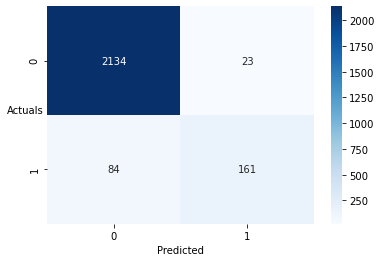

In [115]:
sns.heatmap((metrics.confusion_matrix(d_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);


print(metrics.classification_report(d_train['Default'],y_class_pred,digits=2))


In [116]:
y_prob_pred_test = mod11.predict(d_test)
y_prob_pred_test

3163    2.241525e-03
3133    1.669030e-04
937     1.654704e-01
196     8.728784e-01
2852    2.585245e-03
120     9.853511e-01
2916    4.538916e-06
33      2.159091e-02
1222    6.235574e-01
2529    7.733211e-07
2910    1.995843e-08
3287    6.456920e-07
1419    1.775192e-02
2002    3.871439e-03
2037    2.522798e-05
567     1.206495e-02
1864    6.486295e-04
511     3.507708e-02
149     9.955124e-01
2688    6.068160e-05
864     1.286421e-01
1506    1.437610e-02
2832    2.253434e-08
2752    3.395338e-05
486     3.470713e-01
794     6.739748e-02
1164    4.367713e-02
810     2.076677e-02
642     1.891479e-01
3222    3.647964e-04
1777    4.934480e-03
2323    1.213123e-02
2447    3.381743e-04
1034    1.532631e-01
457     3.993025e-01
298     5.166658e-01
325     2.833333e-01
3427    6.031834e-06
2534    1.505677e-03
1780    8.632097e-04
134     9.976584e-01
949     2.557843e-01
408     2.392686e-02
1234    1.130944e-02
1097    3.701328e-04
691     1.530009e-01
1514    7.371370e-03
1452    6.359

In [117]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1042
         1.0       0.87      0.69      0.77       142

    accuracy                           0.95      1184
   macro avg       0.91      0.84      0.87      1184
weighted avg       0.95      0.95      0.95      1184



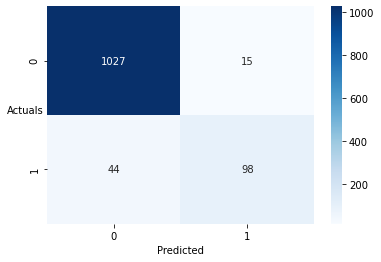

In [118]:
sns.heatmap((metrics.confusion_matrix(d_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);


print(metrics.classification_report(d_test['Default'],y_class_pred,digits=2))



In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score

## 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

   Using Random Forest so that it is easier to Hyper tune the model for better results.
   Decision trees are non-parametric supervised learning models that infer the value of a target variable by analyzing decision rules from the features of the dataset. Since the random forest consists of many decision trees, a random forest is used to produce what the most important features are to predict the target variable by analzying all the trees for which features use that tree to node. Also Random Forest is not deeply affected by Multicollinearity in the data so we can use all the predictors.

In [120]:
x_train.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT',
       'Adjusted_PAT', 'CP', 'Rev_earn_in_forex', 'Rev_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Prod_perc',
       'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc',
       'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc', 'ROG_CP_perc',
       'ROG_Ma

In [121]:
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=42)
rfcl = rfcl.fit(x_train, y_train)

In [122]:
rfcl

RandomForestClassifier(max_features=6, random_state=42)

In [123]:
ytrain_predict = rfcl.predict(x_train)
ytest_predict = rfcl.predict(x_test)

In [124]:
rfcl.score(x_train,y_train)

1.0

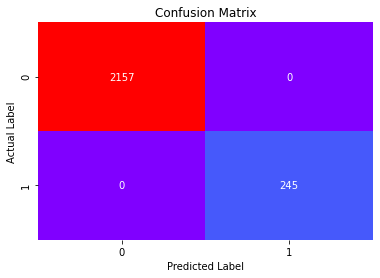

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2157
         1.0       1.00      1.00      1.00       245

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402



In [125]:
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_train,ytrain_predict))

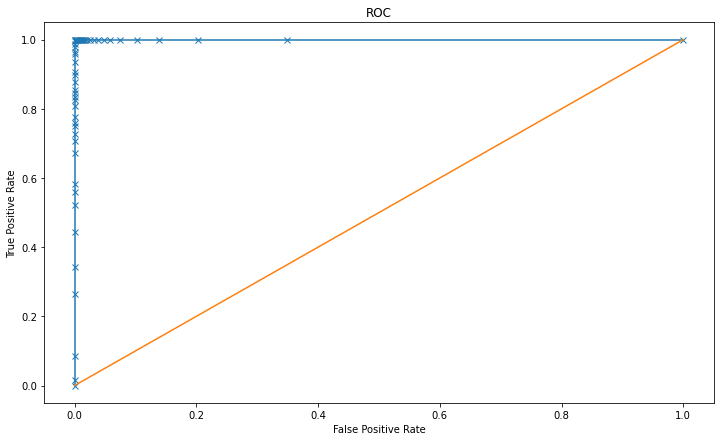

Area under Curve is 1.0


In [126]:
rf_fpr, rf_tpr,_=roc_curve(y_train,rfcl.predict_proba(x_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,rfcl.predict_proba(x_train)[:,1]))

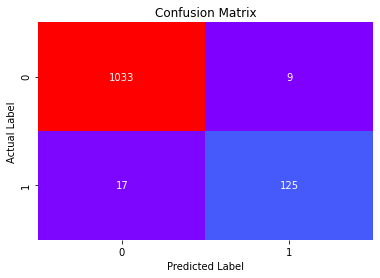

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1042
         1.0       0.93      0.88      0.91       142

    accuracy                           0.98      1184
   macro avg       0.96      0.94      0.95      1184
weighted avg       0.98      0.98      0.98      1184



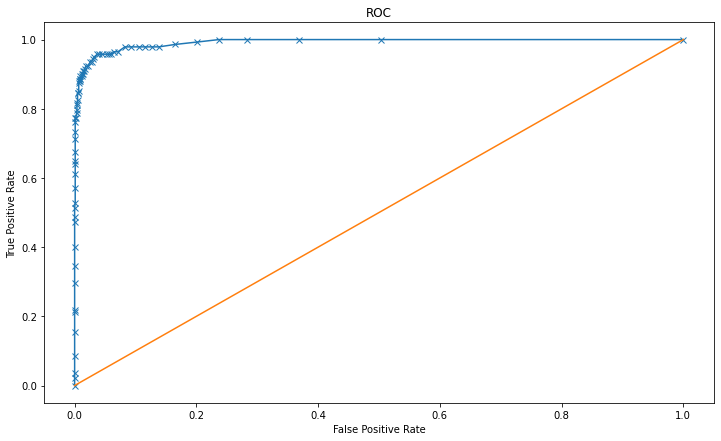

Area under Curve is 0.992261631207591


In [127]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test,ytest_predict))

rf_fpr, rf_tpr,_=roc_curve(y_test,rfcl.predict_proba(x_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,rfcl.predict_proba(x_test)[:,1]))


Although the Model has performed reasonably better than logistic_Regression Model. We will try and hypertune the Model to get the optimum results.

We will use Gridsearch

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [10,15,20],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [ ]:
grid_search.fit(x_train,y_train)
